In [1]:
from pandas_datareader.data import get_data_yahoo
from matplotlib import pyplot as plt, gridspec
from matplotlib.finance import candlestick_ochl
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY, date2num
from matplotlib import ticker, style
from datetime import datetime, timedelta
from IPython.display import display

import pandas as pd
import numpy as np
import talib
import csv
style.use('ggplot')

/usr/local/lib/python3.4/dist-packages/matplotlib-2.0.0b4_3022.gdfd38f7-py3.4-linux-x86_64.egg/matplotlib/cbook.py:128: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the matplotlib toolkit finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def get_symbols():
    with open("n11_symbols.csv", "r") as f:
        symbols = f.read().split()
    return symbols
get_symbols()

['AAPL', 'GOOG', 'AMD']

In [3]:
def get_trades_data(symbols):
    result = None
    for symbol in symbols:
        now = datetime.now().date()
        five_years_ago = now.replace(year=now.year - 5, day=1) # day is passed to evade 2/29 problem 
        df = get_data_yahoo(symbol, five_years_ago, now)
        df["Symbol"] = symbol
        del df['Adj Close']
        df.reset_index(inplace=True)
        
        if result is None:
            result = df
        else:
            result = result.append(df)        
        
    return result

initial_data = get_trades_data(get_symbols())
initial_data

Date        Open        High         Low       Close     Volume  \
0    2012-04-02  601.830009  618.769997  600.379990  618.630020  149587900   
1    2012-04-03  627.300018  632.209984  622.510002  629.319984  208639900   
2    2012-04-04  624.349991  625.859985  617.000023  624.309990  143245200   
3    2012-04-05  626.980011  634.660027  623.400009  633.679977  160324500   
4    2012-04-09  626.130005  639.840012  625.300026  636.229996  149384200   
5    2012-04-10  639.930000  644.000000  626.000015  628.440018  222431300   
6    2012-04-11  636.199982  636.870010  623.339981  626.200020  174153700   
7    2012-04-12  624.999992  631.330017  620.500023  622.769981  153584200   
8    2012-04-13  624.109985  624.700012  603.509995  605.229980  214911200   
9    2012-04-16  610.059998  610.279976  578.249977  580.130020  262696700   
10   2012-04-17  578.939980  610.000023  571.910019  609.699989  256382000   
11   2012-04-18  613.720001  620.249977  602.709976  608.340012  238632800   
12   2012-04-19  600.219986  604.729996  584.519974  587.439987  208679800   
13   2012-04-20  591.379997  594.620018  570.419998  572.980003  257746300   
14   2012-04-23  570.610016  576.670021  556.620003  571.699974  241632300   
15   2012-04-24  562.609993  567.690002  554.999992  560.280006  269037300   
16   2012-04-25  615.639992  617.999992  605.999985  610.000023  226444400   
17   2012-04-26  614.269974  614.690010  602.129990  607.699997  134017100   
18   2012-04-27  605.069977  606.180016  600.499992  603.000023  101680600   
19   2012-04-30  597.800011  598.400024  582.999992  583.979988  126536200   
20   2012-05-01  584.900009  596.759987  581.230019  582.130013  152749800   
21   2012-05-02  580.239983  587.399986  578.859978  585.979980  106847300   
22   2012-05-03  590.499977  591.400024  580.300011  581.819992   97637400   
23   2012-05-04  577.080017  578.359993  565.169998  565.250000  132498100   
24   2012-05-07  561.500008  572.770012  561.229988  569.480003  115029600   
25   2012-05-08  569.579979  571.500023  558.730011  568.180000  124313000   
26   2012-05-09  563.700005  573.980026  560.850006  569.180023  120176000   
27   2012-05-10  574.579987  575.879990  568.439980  570.519974   83300000   
28   2012-05-11  565.000008  574.470024  564.350006  566.710007   99886500   
29   2012-05-14  562.569992  567.510025  557.599998  558.219986   88156600   
...         ...         ...         ...         ...         ...        ...   
1237 2017-03-03   13.550000   13.580000   12.790000   13.030000  163395900   
1238 2017-03-06   13.000000   13.340000   12.380000   13.040000  116956700   
1239 2017-03-07   13.070000   13.370000   12.790000   13.050000   76377500   
1240 2017-03-08   13.250000   13.550000   13.100000   13.220000   71183200   
1241 2017-03-09   13.450000   13.450000   13.110000   13.330000   45041200   
1242 2017-03-10   13.500000   13.930000   13.450000   13.910000   62328200   
1243 2017-03-13   14.480000   14.680000   14.180000   14.280000   72841700   
1244 2017-03-14   14.000000   14.150000   13.640000   14.100000   52291400   
1245 2017-03-15   14.030000   14.060000   13.620000   13.980000   54885200   
1246 2017-03-16   13.790000   13.880000   13.650000   13.650000   44129100   
1247 2017-03-17   13.620000   13.740000   13.360000   13.490000  218636000   
1248 2017-03-20   13.680000   14.500000   13.540000   14.400000   90863900   
1249 2017-03-21   14.400000   14.490000   13.780000   13.820000   72191500   
1250 2017-03-22   13.700000   14.150000   13.550000   14.100000   61089400   
1251 2017-03-23   13.960000   14.120000   13.770000   13.790000   44144100   
1252 2017-03-24   14.160000   14.180000   13.540000   13.700000   49903700   
1253 2017-03-27   13.350000   13.780000   13.210000   13.700000   42537800   
1254 2017-03-28   13.750000   13.860000   13.550000   13.690000   37005800   
1255 2017-03-29   13.740000   13.870000   13.630000   13.710000   37777200   
1256 2017-03-30   13.730000   14.

In [4]:
def define_trades(input_df, moving_average_days=10, rsi_level=65):
    out_put_df = None
    
    for symbol in input_df.Symbol.unique():
        sub_df = input_df[input_df.Symbol == symbol].copy()
        sub_df['CloseDaysMean'] = sub_df.Close.rolling(window=moving_average_days).mean()        
        rsi_values = talib.RSI(sub_df['Close'].values, timeperiod=14)
        sub_df['RSI'] = pd.Series(rsi_values, index=sub_df.index.values)

        sub_df['IsTradeStart'] = False
        sub_df['IsTradePeriod'] = False
        sub_df['Return'] = None

        # loop
        trade_is_open = False  # indicates an open trade
        finish_trade = False  # signal to finish a trade
        entry_price = None
        prev_days_mean = None
        for index, row in sub_df.iterrows():

            if not trade_is_open:  # check open rule
                if prev_days_mean and row.Close > prev_days_mean and row.RSI > rsi_level:
                    trade_is_open = True
                    entry_price = row.Close 
                    sub_df.set_value(index, 'IsTradeStart', True)

            if trade_is_open:
                sub_df.set_value(index, 'IsTradePeriod', trade_is_open)

            if finish_trade:  # close trade
                trade_is_open = False
                finish_trade = False
                sub_df.set_value(index, 'Return', (row.Close / entry_price - 1) * 100)

            elif trade_is_open: # check close rule
                price_change = (row.Close / entry_price - 1) * 100
                if row.Close < prev_days_mean and row.RSI < rsi_level or price_change <= -5:
                    finish_trade = True

            prev_days_mean = row.CloseDaysMean
        
        if out_put_df is None:
            out_put_df = sub_df
        else:
            out_put_df = out_put_df.append(sub_df)
            
    if out_put_df is not None:
        out_put_df.reset_index(inplace=True, drop=True)
    return out_put_df

data = define_trades(initial_data)

data[data.IsTradeStart | ~data.Return.isnull()][
    ["Date", "Symbol", "Close", "CloseDaysMean", "RSI", "IsTradeStart", "Return"]
].iloc[100:]

Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2476 2017-01-23   GOOG  819.309998     807.077496  67.261092         True   
2482 2017-01-31   GOOG  796.789978     814.668500  45.696357        False   
2495 2017-02-17   GOOG  828.070007     815.081995  65.709199         True   
2502 2017-03-01   GOOG  835.239990     828.133002  65.246284        False   
2508 2017-03-09   GOOG  838.679993     830.982007  65.240809         True   
2517 2017-03-22   GOOG  829.590027     842.964007  47.026962        False   
2713 2012-12-18    AMD    2.520000       2.379000  65.175817         True   
2716 2012-12-21    AMD    2.590000       2.431000  64.509179        False   
2803 2013-04-30    AMD    2.820000       2.580000  65.681280         True   
2816 2013-05-17    AMD    4.070000       3.950000  67.768660        False   
2817 2013-05-20    AMD    4.100000       3.999000  68.264608         True   
2820 2013-05-23    AMD    4.010000       4.075000  64.274673        False   
2853 2013-07-11    AMD    4.450000       4.084000  67.120246         True   
2860 2013-07-22    AMD    3.900000       4.258000  43.773312        False   
2970 2013-12-26    AMD    3.800000       3.693000  65.625943         True   
2986 2014-01-21    AMD    4.170000       4.225000  58.927266        False   
3018 2014-03-07    AMD    3.950000       3.728000  68.191151         True   
3025 2014-03-18    AMD    3.890000       3.836000  58.590013        False   
3027 2014-03-20    AMD    4.050000       3.895000  66.325878         True   
3033 2014-03-28    AMD    3.880000       3.970000  50.898373        False   
3049 2014-04-22    AMD    4.300000       3.884000  65.050987         True   
3053 2014-04-28    AMD    3.960000       3.991000  49.885698        False   
3084 2014-06-11    AMD    4.290000       4.068000  65.832454         True   
3092 2014-06-23    AMD    4.010000       4.284000  42.441207        False   
3106 2014-07-14    AMD    4.640000       4.300000  70.370639         True   
3111 2014-07-21    AMD    3.780000       4.312000  36.320645        False   
3249 2015-02-05    AMD    3.310000       2.716000  76.052603         True   
3251 2015-02-09    AMD    3.040000       2.817000  62.262544        False   
3255 2015-02-13    AMD    3.150000       3.004000  65.603577         True   
3259 2015-02-20    AMD    3.060000       3.076000  60.241340        False   
...         ...    ...         ...            ...        ...          ...   
3463 2015-12-10    AMD    2.450000       2.336000  65.944480         True   
3479 2016-01-05    AMD    2.750000       2.842000  59.008205        False   
3518 2016-03-02    AMD    2.320000       2.056000  65.086810         True   
3542 2016-04-06    AMD    2.800000       2.804000  59.528464        False   
3554 2016-04-22    AMD    3.990000       2.848000  78.555638         True   
3556 2016-04-26    AMD    3.660000       3.002000  65.653038        False   
3557 2016-04-27    AMD    3.730000       3.095000  66.584672         True   
3567 2016-05-11    AMD    3.650000       3.638000  61.388815        False   
3572 2016-05-18    AMD    3.840000       3.696000  65.461802         True   
3584 2016-06-06    AMD    4.470000       4.324000  65.991168        False   
3585 2016-06-07    AMD    4.510000       4.371000  66.785421         True   
3589 2016-06-13    AMD    4.400000       4.408000  60.223745        False   
3592 2016-06-16    AMD    4.750000       4.440000  68.425340         True   
3600 2016-06-28    AMD    5.120000       4.993000  60.124697        False   
3613 2016-07-18    AMD    5.510000       5.118000  66.001609         True   
3617 2016-07-22    AMD    5.840000       5.294000  67.774667        False   
3618 2016-07-25    AMD    6.700000       5.463000  76.910907         True   
3625 2016-08-03    AMD    6.300000       6.447000  60.486768        False   
3628 2016-08-08    AMD    6.680000       6.647000  65.925899         True   
3630 2016-08-10    AMD    6.490000       6.573000  60.767512        False   
3633 20

In [5]:
def get_summary_report(df):
    number_of_trades = len(df[~df.Return.isnull()])
    winning_data = df[df.Return > 0]
    loosing_data = df[df.Return < 0]
    number_of_winners = len(winning_data)
    win_rate = number_of_winners / number_of_trades * 100
    report = {
        "1. Number of trades": number_of_trades,
        "2. Number of winners": number_of_winners,
        "3. Number of losers": len(loosing_data),
        "4. Win rate": win_rate,
        "5. Average return of the strategy": df.Return.mean(),
        "6. Average holding period": len(df[df.IsTradePeriod]),
        "7. Average winning return": winning_data.Return.mean(),
        "8. Average loosing return": loosing_data.Return.mean(),        
    }
    return report 

def print_summary_report(report):
    for key, value in sorted(report.items()):
        print("{}: {}".format(key, value))
        
print_summary_report(get_summary_report(data))

1. Number of trades: 84
2. Number of winners: 42
3. Number of losers: 42
4. Win rate: 50.0
5. Average return of the strategy: 0.17328521783152004
6. Average holding period: 993
7. Average winning return: 6.680331193834287
8. Average loosing return: -6.333760758171247


In [6]:
def iterate_trades(df):
    trades_borders = df[df.IsTradeStart | ~df.Return.isnull()]   
    start_index = None
    for index, row in trades_borders.iterrows():
        if row.IsTradeStart:
            start_index = df.index.get_loc(index)
        
        if row.Return is not None:
            # trade days
            end_index = df.index.get_loc(index)
            trade_df = df.iloc[start_index:end_index + 1]
            
            # days for chart
            len_trade_df = len(trade_df)
            diff = 30 - len_trade_df
            if diff > 0:
                additional_days = diff // 2
                additional_days_rem = diff % 2                    
                start_index -= additional_days + additional_days_rem
                end_index += additional_days                
                df_for_chart = df.iloc[max(start_index, 0):end_index + 1]
            else:
                df_for_chart = trade_df
            
            yield trade_df, df_for_chart  
            
def title_info(df):
    line = "{}, Return {:.2f}%, Entry {:.2f}, Exit {:.2f}, Holding period {} days".format(
        df.Symbol.unique()[0],
        df.Return.sum(),
        df[df.IsTradeStart].Close.values[0],
        df[~df.Return.isnull()].Close.values[0],
        len(df),
    )
    return line
        
iterator = iterate_trades(data)
for n, (trade, _) in enumerate(iterator):
    print(title_info(trade))
    display(trade[["Date", "Symbol", "Close", "CloseDaysMean", "RSI", "IsTradeStart", "Return"]])

AAPL, Return -1.00%, Entry 609.94, Exit 603.83, Holding period 13 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
65 2012-07-05   AAPL  609.939995     583.198998  66.402393         True   
66 2012-07-06   AAPL  605.879982     586.019998  63.538410        False   
67 2012-07-09   AAPL  613.889992     589.198997  66.599202        False   
68 2012-07-10   AAPL  608.210022     592.942997  62.587024        False   
69 2012-07-11   AAPL  604.430016     596.182997  59.996611        False   
70 2012-07-12   AAPL  598.900009     598.622999  56.323832        False   
71 2012-07-13   AAPL  604.970001     602.215001  59.271089        False   
72 2012-07-16   AAPL  606.910019     604.506001  60.195589        False   
73 2012-07-17   AAPL  606.939980     605.948000  60.210610        False   
74 2012-07-18   AAPL  606.260017     606.633003  59.660341        False   
75 2012-07-19   AAPL  614.320015     607.071005  63.874841        False   
76 2012-07-20   AAPL  604.300026     606.913010  56.036854        False   
77 2012-07-23   AAPL  603.830002     605.907011  55.691629        False   

     Return  
65     None  
66     None  
67     None  
68     None  
69     None  
70     None  
71     None  
72     None  
73     None  
74     None  
75     None  
76     None  
77 -1.00174

AAPL, Return 4.86%, Entry 630.00, Exit 660.59, Holding period 21 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
92  2012-08-13   AAPL  630.000000     617.681000  66.225716         True   
93  2012-08-14   AAPL  631.690025     619.774004  66.996043        False   
94  2012-08-15   AAPL  630.829979     622.176003  66.168946        False   
95  2012-08-16   AAPL  636.340012     625.031005  68.824401        False   
96  2012-08-17   AAPL  648.110001     628.272003  73.592612        False   
97  2012-08-20   AAPL  665.150017     632.532005  78.677273        False   
98  2012-08-21   AAPL  656.059982     636.047001  70.841131        False   
99  2012-08-22   AAPL  668.869995     640.948000  74.669896        False   
100 2012-08-23   AAPL  662.630013     645.138002  69.857934        False   
101 2012-08-24   AAPL  663.219986     649.290001  70.054425        False   
102 2012-08-27   AAPL  675.679977     653.857999  73.921035        False   
103 2012-08-28   AAPL  674.800011     658.168997  73.202158        False   
104 2012-08-29   AAPL  673.469994     662.432999  72.061474        False   
105 2012-08-30   AAPL  663.869987     665.185996  64.275928        False   
106 2012-08-31   AAPL  665.240005     666.898997  64.859419        False   
107 2012-09-04   AAPL  674.970001     667.880995  68.761806        False   
108 2012-09-05   AAPL  670.230026     669.298000  64.976296        False   
109 2012-09-06   AAPL  676.270004     670.038000  67.436400        False   
110 2012-09-07   AAPL  680.439980     671.818997  69.052612        False   
111 2012-09-10   AAPL  662.739975     671.770996  56.283241        False   
112 2012-09-11   AAPL  660.590019     670.262000  54.953923        False   

      Return  
92      None  
93      None  
94      None  
95      None  
96      None  
97      None  
98      None  
99      None  
100     None  
101     None  
102     None  
103     None  
104     None  
105     None  
106     None  
107     None  
108     None  
109     None  
110     None  
111     None  
112  4.85556

AAPL, Return -3.78%, Entry 691.28, Exit 665.18, Holding period 9 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
115 2012-09-14   AAPL  691.280014     673.453005  67.610710         True   
116 2012-09-17   AAPL  699.780022     676.907007  70.293430        False   
117 2012-09-18   AAPL  701.910004     679.601007  70.942912        False   
118 2012-09-19   AAPL  702.100021     682.788007  71.003818        False   
119 2012-09-20   AAPL  698.699997     685.031006  68.247278        False   
120 2012-09-21   AAPL  700.089989     686.996007  68.780881        False   
121 2012-09-24   AAPL  690.790016     689.801011  61.352051        False   
122 2012-09-25   AAPL  673.540009     691.096010  50.464486        False   
123 2012-09-26   AAPL  665.179977     690.635006  46.186674        False   

      Return  
115     None  
116     None  
117     None  
118     None  
119     None  
120     None  
121     None  
122     None  
123 -3.77561

AAPL, Return -6.92%, Entry 460.71, Exit 428.85, Holding period 8 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
273 2013-05-06   AAPL  460.709984     430.556995  66.407112         True   
274 2013-05-07   AAPL  458.660004     435.809996  64.947906        False   
275 2013-05-08   AAPL  463.839989     441.647996  66.925593        False   
276 2013-05-09   AAPL  456.769974     446.486994  61.800387        False   
277 2013-05-10   AAPL  452.969994     450.063994  59.177258        False   
278 2013-05-13   AAPL  454.740021     452.525997  60.028326        False   
279 2013-05-14   AAPL  443.860012     452.634000  52.748720        False   
280 2013-05-15   AAPL  428.850002     451.590000  44.695779        False   

      Return  
273     None  
274     None  
275     None  
276     None  
277     None  
278     None  
279     None  
280 -6.91541

AAPL, Return 3.10%, Entry 453.32, Exit 467.36, Holding period 10 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
332 2013-07-30   AAPL  453.320015     435.343003  67.583171         True   
333 2013-07-31   AAPL  452.529984     437.565000  66.774793        False   
334 2013-08-01   AAPL  456.679985     440.056999  68.880497        False   
335 2013-08-02   AAPL  462.539986     443.815998  71.616002        False   
336 2013-08-05   AAPL  469.449997     448.129998  74.466265        False   
337 2013-08-06   AAPL  465.250008     452.756000  69.873463        False   
338 2013-08-07   AAPL  464.979988     455.202998  69.576356        False   
339 2013-08-08   AAPL  461.010017     457.454000  65.187604        False   
340 2013-08-09   AAPL  454.449974     458.799996  58.608809        False   
341 2013-08-12   AAPL  467.360016     460.756997  65.901977        False   

      Return  
332     None  
333     None  
334     None  
335     None  
336     None  
337     None  
338     None  
339     None  
340     None  
341  3.09715

AAPL, Return 0.27%, Entry 489.57, Exit 490.90, Holding period 12 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
342 2013-08-13   AAPL  489.569977     464.381993  74.293722         True   
343 2013-08-14   AAPL  498.500008     468.978996  76.769293        False   
344 2013-08-15   AAPL  497.909981     473.101995  76.246822        False   
345 2013-08-16   AAPL  502.330002     477.080997  77.483110        False   
346 2013-08-19   AAPL  507.740005     480.909998  78.928706        False   
347 2013-08-20   AAPL  501.070000     484.491997  72.729153        False   
348 2013-08-21   AAPL  502.360016     488.230000  73.168119        False   
349 2013-08-22   AAPL  502.959976     492.424996  73.382708        False   
350 2013-08-23   AAPL  501.020012     497.081999  71.394432        False   
351 2013-08-26   AAPL  502.970016     500.642999  72.209522        False   
352 2013-08-27   AAPL  488.589981     500.545000  58.884577        False   
353 2013-08-28   AAPL  490.899994     499.784998  60.156519        False   

      Return  
342     None  
343     None  
344     None  
345     None  
346     None  
347     None  
348     None  
349     None  
350     None  
351     None  
352     None  
353  0.27167

AAPL, Return -7.60%, Entry 506.17, Exit 467.71, Holding period 3 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
360 2013-09-09   AAPL  506.169983     494.831000  66.451688         True   
361 2013-09-10   AAPL  494.639999     493.997998  56.536144        False   
362 2013-09-11   AAPL  467.709984     491.909998  41.107592        False   

      Return  
360     None  
361     None  
362 -7.59824

AAPL, Return 0.68%, Entry 521.36, Exit 524.90, Holding period 8 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
390 2013-10-21   AAPL  521.360023     498.055992  70.497028         True   
391 2013-10-22   AAPL  519.870003     501.948995  69.097658        False   
392 2013-10-23   AAPL  524.959999     505.785996  71.200726        False   
393 2013-10-24   AAPL  531.910011     510.012998  73.820567        False   
394 2013-10-25   AAPL  525.960022     513.328000  68.108297        False   
395 2013-10-28   AAPL  529.880005     516.712003  69.768075        False   
396 2013-10-29   AAPL  516.680023     518.512006  58.691164        False   
397 2013-10-30   AAPL  524.900024     520.891009  62.666252        False   

       Return  
390      None  
391      None  
392      None  
393      None  
394      None  
395      None  
396      None  
397  0.678994

AAPL, Return 1.55%, Entry 545.96, Exit 554.43, Holding period 12 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
417 2013-11-27   AAPL  545.959999     525.036994  68.584563         True   
418 2013-11-29   AAPL  556.069977     527.827990  72.541865        False   
419 2013-12-02   AAPL  551.230026     530.451991  68.118081        False   
420 2013-12-03   AAPL  566.319984     535.220992  73.536621        False   
421 2013-12-04   AAPL  565.000008     539.765994  72.377827        False   
422 2013-12-05   AAPL  567.899994     545.055995  73.370663        False   
423 2013-12-06   AAPL  560.019974     548.943993  66.387940        False   
424 2013-12-09   AAPL  566.430000     553.606994  68.974587        False   
425 2013-12-10   AAPL  565.549980     557.787992  68.198634        False   
426 2013-12-11   AAPL  561.359978     560.583992  64.479240        False   
427 2013-12-12   AAPL  560.539986     562.041991  63.746528        False   
428 2013-12-13   AAPL  554.429993     561.877992  58.419479        False   

      Return  
417     None  
418     None  
419     None  
420     None  
421     None  
422     None  
423     None  
424     None  
425     None  
426     None  
427     None  
428  1.55139

AAPL, Return 4.41%, Entry 567.77, Exit 592.83, Holding period 13 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
517 2014-04-24   AAPL  567.770004     528.207011  70.350676         True   
518 2014-04-25   AAPL  571.939980     533.053007  71.678950        False   
519 2014-04-28   AAPL  594.090019     540.501006  77.456247        False   
520 2014-04-29   AAPL  592.329979     547.566006  76.127358        False   
521 2014-04-30   AAPL  590.089981     554.779005  74.378362        False   
522 2014-05-01   AAPL  591.480026     562.026006  74.765801        False   
523 2014-05-02   AAPL  592.580025     568.790006  75.086852        False   
524 2014-05-05   AAPL  600.959976     575.769002  77.441509        False   
525 2014-05-06   AAPL  594.410027     582.040003  71.734503        False   
526 2014-05-07   AAPL  592.329979     588.798000  69.971014        False   
527 2014-05-08   AAPL  587.990013     590.820001  66.308242        False   
528 2014-05-09   AAPL  585.540024     592.180005  64.263135        False   
529 2014-05-12   AAPL  592.830017     592.054005  67.477399        False   

      Return  
517     None  
518     None  
519     None  
520     None  
521     None  
522     None  
523     None  
524     None  
525     None  
526     None  
527     None  
528     None  
529  4.41376

AAPL, Return 0.63%, Entry 593.76, Exit 597.51, Holding period 4 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
530 2014-05-13   AAPL  593.760025     592.197009  67.874372         True   
531 2014-05-14   AAPL  593.869987     592.575010  67.924225        False   
532 2014-05-15   AAPL  588.819992     592.309006  63.082670        False   
533 2014-05-16   AAPL  597.510017     592.802006  67.390154        False   

       Return  
530      None  
531      None  
532      None  
533  0.631567

AAPL, Return -84.41%, Entry 604.59, Exit 94.25, Holding period 16 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
534 2014-05-19   AAPL  604.590019     593.165010  70.418533         True   
535 2014-05-20   AAPL  604.710022     594.195009  70.468593        False   
536 2014-05-21   AAPL  606.310005     595.593012  71.169136        False   
537 2014-05-22   AAPL  607.269974     597.521008  71.604376        False   
538 2014-05-23   AAPL  614.129997     600.380005  74.559951        False   
539 2014-05-27   AAPL  625.630020     603.660006  78.584183        False   
540 2014-05-28   AAPL  624.010010     606.685004  76.742542        False   
541 2014-05-29   AAPL  635.379990     610.836005  80.242265        False   
542 2014-05-30   AAPL  633.000015     615.254007  77.609667        False   
543 2014-06-02   AAPL  628.650009     618.368006  72.901824        False   
544 2014-06-03   AAPL  637.539986     621.663003  76.093492        False   
545 2014-06-04   AAPL  644.819992     625.674000  78.343020        False   
546 2014-06-05   AAPL  647.349983     629.777998  79.079759        False   
547 2014-06-06   AAPL  645.570023     633.608003  77.092725        False   
548 2014-06-09   AAPL   93.699997     581.565003   8.210270        False   
549 2014-06-10   AAPL   94.250000     528.427001   8.298210        False   

      Return  
534     None  
535     None  
536     None  
537     None  
538     None  
539     None  
540     None  
541     None  
542     None  
543     None  
544     None  
545     None  
546     None  
547     None  
548     None  
549 -84.4109

AAPL, Return 7.39%, Entry 106.74, Exit 114.63, Holding period 25 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
647 2014-10-28   AAPL  106.739998     101.859000  67.111083         True   
648 2014-10-29   AAPL  107.339996     102.839000  68.393057        False   
649 2014-10-30   AAPL  106.980003     103.911000  66.712830        False   
650 2014-10-31   AAPL  108.000000     104.944000  69.034117        False   
651 2014-11-03   AAPL  109.400002     105.908000  71.927751        False   
652 2014-11-04   AAPL  108.599998     106.521000  68.016441        False   
653 2014-11-05   AAPL  108.860001     107.108000  68.613800        False   
654 2014-11-06   AAPL  108.699997     107.495000  67.774892        False   
655 2014-11-07   AAPL  109.010002     107.874000  68.576532        False   
656 2014-11-10   AAPL  108.830002     108.246000  67.526154        False   
657 2014-11-11   AAPL  109.699997     108.542000  69.923990        False   
658 2014-11-12   AAPL  111.250000     108.933000  73.656189        False   
659 2014-11-13   AAPL  112.820000     109.517000  76.796992        False   
660 2014-11-14   AAPL  114.180000     110.135000  79.119354        False   
661 2014-11-17   AAPL  113.989998     110.593999  77.945589        False   
662 2014-11-18   AAPL  115.470001     111.281000  80.386453        False   
663 2014-11-19   AAPL  114.669998     111.861999  75.520934        False   
664 2014-11-20   AAPL  116.309998     112.623000  78.406355        False   
665 2014-11-21   AAPL  116.470001     113.368999  78.670513        False   
666 2014-11-24   AAPL  118.629997     114.348999  81.891127        False   
667 2014-11-25   AAPL  117.599998     115.138999  75.998212        False   
668 2014-11-26   AAPL  119.000000     115.913999  78.285494        False   
669 2014-11-28   AAPL  118.930000     116.524999  77.885836        False   
670 2014-12-01   AAPL  115.070000     116.613999  59.766596        False   
671 2014-12-02   AAPL  114.629997     116.677999  58.107146        False   

      Return  
647     None  
648     None  
649     None  
650     None  
651     None  
652     None  
653     None  
654     None  
655     None  
656     None  
657     None  
658     None  
659     None  
660     None  
661     None  
662     None  
663     None  
664     None  
665     None  
666     None  
667     None  
668     None  
669     None  
670     None  
671  7.39179

AAPL, Return 5.79%, Entry 122.02, Exit 129.09, Holding period 14 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
718 2015-02-10   AAPL  122.019997     118.882000  66.475145         True   
719 2015-02-11   AAPL  124.879997     119.839000  70.458769        False   
720 2015-02-12   AAPL  126.459999     120.595000  72.409289        False   
721 2015-02-13   AAPL  127.080002     121.586999  73.158241        False   
722 2015-02-17   AAPL  127.830002     122.507000  74.075013        False   
723 2015-02-18   AAPL  128.720001     123.514000  75.159260        False   
724 2015-02-19   AAPL  128.449997     124.403000  74.146134        False   
725 2015-02-20   AAPL  129.500000     125.359000  75.527667        False   
726 2015-02-23   AAPL  133.000000     126.766000  79.466450        False   
727 2015-02-24   AAPL  132.169998     128.010999  76.329033        False   
728 2015-02-25   AAPL  128.789993     128.687999  65.063568        False   
729 2015-02-26   AAPL  130.419998     129.241999  67.550817        False   
730 2015-02-27   AAPL  128.460007     129.442000  61.848879        False   
731 2015-03-02   AAPL  129.089996     129.642999  62.931946        False   

      Return  
718     None  
719     None  
720     None  
721     None  
722     None  
723     None  
724     None  
725     None  
726     None  
727     None  
728     None  
729     None  
730     None  
731  5.79413

AAPL, Return -2.79%, Entry 132.65, Exit 128.95, Holding period 5 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
770 2015-04-27   AAPL  132.649994     127.972999  66.779810         True   
771 2015-04-28   AAPL  130.559998     128.398998  59.304418        False   
772 2015-04-29   AAPL  128.639999     128.584998  53.391508        False   
773 2015-04-30   AAPL  125.150002     128.482999  44.672565        False   
774 2015-05-01   AAPL  128.949997     128.902998  53.564296        False   

      Return  
770     None  
771     None  
772     None  
773     None  
774 -2.78929

AAPL, Return -2.49%, Entry 119.08, Exit 116.11, Holding period 14 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
896 2015-10-23   AAPL  119.080002     113.034000  66.450914         True   
897 2015-10-26   AAPL  115.279999     113.402001  55.232469        False   
898 2015-10-27   AAPL  114.550003     113.678001  53.368504        False   
899 2015-10-28   AAPL  119.269997     114.584001  62.241393        False   
900 2015-10-29   AAPL  120.529999     115.451000  64.199726        False   
901 2015-10-30   AAPL  119.500000     116.297000  61.396461        False   
902 2015-11-02   AAPL  121.180000     117.242000  64.146388        False   
903 2015-11-03   AAPL  122.570000     118.122000  66.286275        False   
904 2015-11-04   AAPL  122.000000     118.946000  64.584008        False   
905 2015-11-05   AAPL  120.919998     119.488000  61.368258        False   
906 2015-11-06   AAPL  121.059998     119.685999  61.634932        False   
907 2015-11-09   AAPL  120.570000     120.215000  60.071930        False   
908 2015-11-10   AAPL  116.769997     120.436999  49.572856        False   
909 2015-11-11   AAPL  116.110001     120.120999  48.003595        False   

      Return  
896     None  
897     None  
898     None  
899     None  
900     None  
901     None  
902     None  
903     None  
904     None  
905     None  
906     None  
907     None  
908     None  
909 -2.49412

AAPL, Return 4.25%, Entry 104.58, Exit 109.02, Holding period 19 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
993  2016-03-15   AAPL  104.580002     101.981001  66.307214         True   
994  2016-03-16   AAPL  105.970001     102.503001  69.260198        False   
995  2016-03-17   AAPL  105.800003     102.933001  68.469815        False   
996  2016-03-18   AAPL  105.919998     103.224001  68.740980        False   
997  2016-03-21   AAPL  105.910004     103.628001  68.687996        False   
998  2016-03-22   AAPL  106.720001     104.197001  70.661760        False   
999  2016-03-23   AAPL  106.129997     104.698000  67.332371        False   
1000 2016-03-24   AAPL  105.669998     105.148000  64.770008        False   
1001 2016-03-28   AAPL  105.190002     105.441000  62.113752        False   
1002 2016-03-29   AAPL  107.680000     105.957001  69.175842        False   
1003 2016-03-30   AAPL  109.559998     106.455000  73.232777        False   
1004 2016-03-31   AAPL  108.989998     106.757000  70.215322        False   
1005 2016-04-01   AAPL  109.989998     107.175999  72.366521        False   
1006 2016-04-04   AAPL  111.120003     107.696000  74.599078        False   
1007 2016-04-05   AAPL  109.809998     108.085999  67.764005        False   
1008 2016-04-06   AAPL  110.959999     108.509999  70.333707        False   
1009 2016-04-07   AAPL  108.540001     108.750999  59.571910        False   
1010 2016-04-08   AAPL  108.660004     109.050000  59.899576        False   
1011 2016-04-11   AAPL  109.019997     109.433000  60.922773        False   

       Return  
993      None  
994      None  
995      None  
996      None  
997      None  
998      None  
999      None  
1000     None  
1001     None  
1002     None  
1003     None  
1004     None  
1005     None  
1006     None  
1007     None  
1008     None  
1009     None  
1010     None  
1011  4.24555

AAPL, Return -4.07%, Entry 112.04, Exit 107.48, Holding period 4 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1013 2016-04-13   AAPL  112.040001        109.957  68.483933         True   
1014 2016-04-14   AAPL  112.099998        110.268  68.618359        False   
1015 2016-04-15   AAPL  109.849998        110.254  58.535005        False   
1016 2016-04-18   AAPL  107.480003        109.890  50.171780        False   

       Return  
1013     None  
1014     None  
1015     None  
1016 -4.06997

AAPL, Return 4.49%, Entry 102.95, Exit 107.57, Holding period 22 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1086 2016-07-27   AAPL  102.949997      99.228000  67.187727         True   
1087 2016-07-28   AAPL  104.339996      99.782999  69.999232        False   
1088 2016-07-29   AAPL  104.209999     100.325999  69.400314        False   
1089 2016-08-01   AAPL  106.050003     100.947999  72.930694        False   
1090 2016-08-02   AAPL  104.480003     101.408999  65.940019        False   
1091 2016-08-03   AAPL  105.790001     101.992000  68.641029        False   
1092 2016-08-04   AAPL  105.870003     102.636000  68.803734        False   
1093 2016-08-05   AAPL  107.480003     103.518000  71.957072        False   
1094 2016-08-08   AAPL  108.370003     104.621001  73.548777        False   
1095 2016-08-09   AAPL  108.809998     105.835001  74.324663        False   
1096 2016-08-10   AAPL  108.000000     106.340001  70.239989        False   
1097 2016-08-11   AAPL  107.930000     106.699001  69.882559        False   
1098 2016-08-12   AAPL  108.180000     107.096001  70.460700        False   
1099 2016-08-15   AAPL  109.480003     107.439001  73.327928        False   
1100 2016-08-16   AAPL  109.379997     107.929001  72.742977        False   
1101 2016-08-17   AAPL  109.220001     108.272001  71.756742        False   
1102 2016-08-18   AAPL  109.080002     108.593001  70.851553        False   
1103 2016-08-19   AAPL  109.360001     108.781000  71.622573        False   
1104 2016-08-22   AAPL  108.510002     108.795000  65.921893        False   
1105 2016-08-23   AAPL  108.849998     108.799000  67.051563        False   
1106 2016-08-24   AAPL  108.029999     108.802000  61.736118        False   
1107 2016-08-25   AAPL  107.570000     108.766000  58.914606        False   

       Return  
1086     None  
1087     None  
1088     None  
1089     None  
1090     None  
1091     None  
1092     None  
1093     None  
1094     None  
1095     None  
1096     None  
1097     None  
1098     None  
1099     None  
1100     None  
1101     None  
1102     None  
1103     None  
1104     None  
1105     None  
1106     None  
1107  4.48762

AAPL, Return 1.95%, Entry 111.77, Exit 113.95, Holding period 11 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1120 2016-09-14   AAPL  111.769997     107.042999  65.210224         True   
1121 2016-09-15   AAPL  115.570000     107.989999  71.602277        False   
1122 2016-09-16   AAPL  114.919998     108.808999  69.258182        False   
1123 2016-09-19   AAPL  113.580002     109.393999  64.565486        False   
1124 2016-09-20   AAPL  113.570000     109.980999  64.530340        False   
1125 2016-09-21   AAPL  113.550003     110.499999  64.454795        False   
1126 2016-09-22   AAPL  114.620003     111.410000  66.701108        False   
1127 2016-09-23   AAPL  112.709999     112.368000  59.475677        False   
1128 2016-09-26   AAPL  112.879997     113.112000  59.892119        False   
1129 2016-09-27   AAPL  113.089996     113.625999  60.433035        False   
1130 2016-09-28   AAPL  113.949997     113.843999  62.654332        False   

       Return  
1120     None  
1121     None  
1122     None  
1123     None  
1124     None  
1125     None  
1126     None  
1127     None  
1128     None  
1129     None  
1130  1.95043

AAPL, Return 1.38%, Entry 116.05, Exit 117.65, Holding period 11 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1138 2016-10-10   AAPL  116.050003     113.484000  66.590183         True   
1139 2016-10-11   AAPL  116.300003     113.805000  67.233467        False   
1140 2016-10-12   AAPL  117.339996     114.144000  69.835431        False   
1141 2016-10-13   AAPL  116.980003     114.624000  67.827608        False   
1142 2016-10-14   AAPL  117.629997     115.082000  69.530975        False   
1143 2016-10-17   AAPL  117.550003     115.585000  69.046469        False   
1144 2016-10-18   AAPL  117.470001     116.032001  68.532137        False   
1145 2016-10-19   AAPL  117.120003     116.439001  66.208517        False   
1146 2016-10-20   AAPL  117.059998     116.756000  65.796628        False   
1147 2016-10-21   AAPL  116.599998     117.010000  62.582416        False   
1148 2016-10-24   AAPL  117.650002     117.170000  66.593977        False   

       Return  
1138     None  
1139     None  
1140     None  
1141     None  
1142     None  
1143     None  
1144     None  
1145     None  
1146     None  
1147     None  
1148  1.37872

AAPL, Return -3.19%, Entry 118.25, Exit 114.48, Holding period 3 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1149 2016-10-25   AAPL  118.250000        117.365  68.661541         True   
1150 2016-10-26   AAPL  115.589996        117.190  53.000204        False   
1151 2016-10-27   AAPL  114.480003        116.940  48.072603        False   

       Return  
1149     None  
1150     None  
1151 -3.18816

AAPL, Return 0.28%, Entry 115.82, Exit 116.15, Holding period 12 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1185 2016-12-15   AAPL  115.820000     112.556001  65.521845         True   
1186 2016-12-16   AAPL  115.970001     113.163000  65.953743        False   
1187 2016-12-19   AAPL  116.639999     113.916000  67.888648        False   
1188 2016-12-20   AAPL  116.949997     114.616000  68.772931        False   
1189 2016-12-21   AAPL  117.059998     115.219000  69.098123        False   
1190 2016-12-22   AAPL  116.290001     115.636000  64.068552        False   
1191 2016-12-23   AAPL  116.519997     115.893000  64.890613        False   
1192 2016-12-27   AAPL  117.260002     116.289000  67.469426        False   
1193 2016-12-28   AAPL  116.760002     116.446000  64.046391        False   
1194 2016-12-29   AAPL  116.730003     116.600000  63.837125        False   
1195 2016-12-30   AAPL  115.820000     116.600000  57.680352        False   
1196 2017-01-03   AAPL  116.150002     116.618000  59.216465        False   

        Return  
1185      None  
1186      None  
1187      None  
1188      None  
1189      None  
1190      None  
1191      None  
1192      None  
1193      None  
1194      None  
1195      None  
1196  0.284927

AAPL, Return 20.12%, Entry 117.91, Exit 141.63, Holding period 66 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1199 2017-01-06   AAPL  117.910004     116.607001  66.654885         True   
1200 2017-01-09   AAPL  118.989998     116.877001  70.383206        False   
1201 2017-01-10   AAPL  119.110001     117.136001  70.774229        False   
1202 2017-01-11   AAPL  119.750000     117.385001  72.834190        False   
1203 2017-01-12   AAPL  119.250000     117.634001  68.756784        False   
1204 2017-01-13   AAPL  119.040001     117.865000  67.058790        False   
1205 2017-01-17   AAPL  120.000000     118.283000  70.629615        False   
1206 2017-01-18   AAPL  119.989998     118.667000  70.543815        False   
1207 2017-01-19   AAPL  119.779999     119.043000  68.657962        False   
1208 2017-01-20   AAPL  120.000000     119.382000  69.575583        False   
1209 2017-01-23   AAPL  120.080002     119.599000  69.920463        False   
1210 2017-01-24   AAPL  119.970001     119.697000  68.766209        False   
1211 2017-01-25   AAPL  121.879997     119.974000  76.133480        False   
1212 2017-01-26   AAPL  121.940002     120.193000  76.322436        False   
1213 2017-01-27   AAPL  121.949997     120.463000  76.356015        False   
1214 2017-01-30   AAPL  121.629997     120.721999  72.796462        False   
1215 2017-01-31   AAPL  121.349998     120.856999  69.733208        False   
1216 2017-02-01   AAPL  128.750000     121.732999  86.227705        False   
1217 2017-02-02   AAPL  128.529999     122.607999  84.748989        False   
1218 2017-02-03   AAPL  129.080002     123.515999  85.422058        False   
1219 2017-02-06   AAPL  130.289993     124.536999  86.802028        False   
1220 2017-02-07   AAPL  131.529999     125.692998  88.050423        False   
1221 2017-02-08   AAPL  132.039993     126.708998  88.530929        False   
1222 2017-02-09   AAPL  132.419998     127.756998  88.889432        False   
1223 2017-02-10   AAPL  132.119995     128.773997  86.588288        False   
1224 2017-02-13   AAPL  133.289993     129.939997  87.903505        False   
1225 2017-02-14   AAPL  135.020004     131.306998  89.537325        False   
1226 2017-02-15   AAPL  135.509995     131.982997  89.951304        False   
1227 2017-02-16   AAPL  135.350006     132.664998  88.716980        False   
1228 2017-02-17   AAPL  135.720001     133.328998  89.089838        False   
...         ...    ...         ...            ...        ...          ...   
1235 2017-03-01   AAPL  139.789993     136.728999  89.657467        False   
1236 2017-03-02   AAPL  138.960007     137.074001  83.030984        False   
1237 2017-03-03   AAPL  139.779999     137.517000  84.268076        False   
1238 2017-03-06   AAPL  139.339996     137.878999  80.861502        False   
1239 2017-03-07   AAPL  139.520004     138.161000  81.196403        False   
1240 2017-03-08   AAPL  139.000000     138.350000  77.004379        False   
1241 2017-03-09   AAPL  138.679993     138.564999  74.456794        False   
1242 2017-03-10   AAPL  139.139999     138.812999  75.701268        False   
1243 2017-03-13   AAPL  139.199997     139.039999  75.866422        False   
1244 2017-03-14   AAPL  138.990005     139.239999  73.971372        False   
1245 2017-03-15   AAPL  140.460007     139.307001  78.096076        False   
1246 2017-03-16   AAPL  140.690002     139.480000  78.665722        False   
1247 2017-03-17   AAPL  139.990005     139.501001  72.486913        False   
1248 2017-03-20   AAPL  141.460007     139.713002  76.636976        False   
1249 2017-03-21   AAPL  139.839996     139.745001  65.000606        False   
1250 2017-03-22   AAPL  141.419998     139.987001  69.814551        False   
1251 2017-03-23   AAPL  140.919998     140.211001  66.688551        False   
1252 2017-03-24   AAPL  140.639999     140.361001  64.935100        False   
1253 2017-03-27   AAPL  140.880005     140.529002  65.766003        False   
1254 2017-03-28   AAPL  143.800003     141.010002  73.876596        False   
1255 20

GOOG, Return 21.90%, Entry 610.82, Exit 744.56, Holding period 58 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1343 2012-07-20   GOOG  610.821064     582.219997  65.818520         True   
1344 2012-07-23   GOOG  615.511071     585.170002  67.506134        False   
1345 2012-07-24   GOOG  607.571068     587.757010  61.931390        False   
1346 2012-07-25   GOOG  607.991033     591.437019  62.109623        False   
1347 2012-07-26   GOOG  613.361071     595.725029  64.404526        False   
1348 2012-07-27   GOOG  634.961116     601.569043  71.802437        False   
1349 2012-07-30   GOOG  632.301092     607.307051  69.876418        False   
1350 2012-07-31   GOOG  632.971076     612.931058  70.094010        False   
1351 2012-08-01   GOOG  632.681113     618.123069  69.858820        False   
1352 2012-08-02   GOOG  628.751087     621.692079  66.597201        False   
1353 2012-08-03   GOOG  641.331105     624.743083  71.227968        False   
1354 2012-08-06   GOOG  642.821108     627.474087  71.727909        False   
1355 2012-08-07   GOOG  640.541105     630.771091  69.731230        False   
1356 2012-08-08   GOOG  642.231074     634.195095  70.389188        False   
1357 2012-08-09   GOOG  642.351090     637.094097  70.438333        False   
1358 2012-08-10   GOOG  642.001088     637.798094  70.073079        False   
1359 2012-08-13   GOOG  660.011122     640.569097  76.753118        False   
1360 2012-08-14   GOOG  668.661175     644.138107  79.159249        False   
1361 2012-08-15   GOOG  667.541146     647.624110  78.033017        False   
1362 2012-08-16   GOOG  672.871179     652.036119  79.525870        False   
1363 2012-08-17   GOOG  677.141159     655.617125  80.659805        False   
1364 2012-08-20   GOOG  675.541188     658.889133  78.896564        False   
1365 2012-08-21   GOOG  669.511153     661.786137  72.466920        False   
1366 2012-08-22   GOOG  677.181165     665.281146  75.231845        False   
1367 2012-08-23   GOOG  676.801144     668.726152  74.830881        False   
1368 2012-08-24   GOOG  678.631162     672.389159  75.507842        False   
1369 2012-08-27   GOOG  669.221129     673.310160  65.719480        False   
1370 2012-08-28   GOOG  677.251190     674.169161  69.368668        False   
1371 2012-08-29   GOOG  688.011176     676.216164  73.447467        False   
1372 2012-08-30   GOOG  681.681192     677.097166  67.733405        False   
1373 2012-08-31   GOOG  685.091148     677.892165  69.126820        False   
1374 2012-09-04   GOOG  681.041167     678.442163  65.508446        False   
1375 2012-09-05   GOOG  680.721185     679.563166  65.217983        False   
1376 2012-09-06   GOOG  699.401202     681.785169  72.800200        False   
1377 2012-09-07   GOOG  706.151212     684.720176  74.927149        False   
1378 2012-09-10   GOOG  700.771188     686.934179  70.214322        False   
1379 2012-09-11   GOOG  692.191160     689.231182  63.368794        False   
1380 2012-09-12   GOOG  690.881212     690.594184  62.369024        False   
1381 2012-09-13   GOOG  706.041182     692.397185  68.552585        False   
1382 2012-09-14   GOOG  709.681246     695.197190  69.834330        False   
1383 2012-09-17   GOOG  709.981194     697.686195  69.943044        False   
1384 2012-09-18   GOOG  718.281246     701.410203  72.857997        False   
1385 2012-09-19   GOOG  727.501238     706.088208  75.679576        False   
1386 2012-09-20   GOOG  728.121231     708.960211  75.861297        False   
1387 2012-09-21   GOOG  733.991244     711.744214  77.570123        False   
1388 2012-09-24   GOOG  749.381260     716.605221  81.306562        False   
1389 2012-09-25   GOOG  749.161261     722.302231  81.098587        False   
1390 2012-09-26   GOOG  753.461322     728.560242  82.064287        False   
1391 2012-09-27   GOOG  756.501305     733.606255  82.735831        False   
1392 2012-09-28   GOOG  754.501279     738.088258  80.597731        False   
1393 2012-10-01   GOOG  761.781285     743.268267  82.382416        False   
1394 20

GOOG, Return -2.01%, Entry 720.78, Exit 706.29, Holding period 8 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1445 2012-12-17   GOOG  720.781248     695.950187  68.275914         True   
1446 2012-12-18   GOOG  721.071210     698.954189  68.384276        False   
1447 2012-12-19   GOOG  720.111264     702.183196  67.561509        False   
1448 2012-12-20   GOOG  722.361247     705.306203  68.517613        False   
1449 2012-12-21   GOOG  715.631209     708.448209  62.576362        False   
1450 2012-12-24   GOOG  709.501191     710.856210  57.671093        False   
1451 2012-12-26   GOOG  708.871213     712.055215  57.175064        False   
1452 2012-12-27   GOOG  706.291200     712.928215  55.085444        False   

       Return  
1445     None  
1446     None  
1447     None  
1448     None  
1449     None  
1450     None  
1451     None  
1452 -2.01033

GOOG, Return -1.77%, Entry 737.97, Exit 724.93, Holding period 8 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1457 2013-01-04   GOOG  737.971262     715.494223  69.709830         True   
1458 2013-01-07   GOOG  734.751286     716.733227  67.057706        False   
1459 2013-01-08   GOOG  733.301227     718.500228  65.842846        False   
1460 2013-01-09   GOOG  738.121237     721.362233  67.923102        False   
1461 2013-01-10   GOOG  741.481263     724.623238  69.325564        False   
1462 2013-01-11   GOOG  739.991260     727.993244  67.907660        False   
1463 2013-01-14   GOOG  723.251230     730.317246  54.436695        False   
1464 2013-01-15   GOOG  724.931273     732.072252  55.393076        False   

     Return  
1457   None  
1458   None  
1459   None  
1460   None  
1461   None  
1462   None  
1463   None  
1464 -1.767

GOOG, Return 6.04%, Entry 754.21, Exit 799.78, Holding period 24 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1470 2013-01-24   GOOG  754.211317     725.926251  66.177295         True   
1471 2013-01-25   GOOG  753.671274     727.145252  65.848171        False   
1472 2013-01-28   GOOG  750.731274     728.219253  63.982579        False   
1473 2013-01-29   GOOG  753.681322     731.262262  65.052509        False   
1474 2013-01-30   GOOG  753.831296     734.152265  65.109254        False   
1475 2013-01-31   GOOG  755.691272     738.202271  65.849842        False   
1476 2013-02-01   GOOG  775.601349     744.630283  72.563335        False   
1477 2013-02-04   GOOG  759.021279     750.081288  61.687745        False   
1478 2013-02-05   GOOG  765.741331     756.368301  64.040213        False   
1479 2013-02-06   GOOG  770.171333     759.235305  65.542277        False   
1480 2013-02-07   GOOG  773.951324     761.209305  66.815991        False   
1481 2013-02-08   GOOG  785.371369     764.379315  70.378485        False   
1482 2013-02-11   GOOG  782.421322     767.548320  68.337544        False   
1483 2013-02-12   GOOG  780.701335     770.250321  67.115479        False   
1484 2013-02-13   GOOG  782.861321     773.153324  67.892009        False   
1485 2013-02-14   GOOG  787.821380     776.366334  69.663554        False   
1486 2013-02-15   GOOG  792.891346     778.095334  71.400553        False   
1487 2013-02-19   GOOG  806.851398     782.878346  75.551554        False   
1488 2013-02-20   GOOG  792.461334     785.550346  65.067699        False   
1489 2013-02-21   GOOG  795.531336     788.086346  66.146983        False   
1490 2013-02-22   GOOG  799.711381     790.662352  67.614186        False   
1491 2013-02-25   GOOG  790.771365     791.202352  61.477280        False   
1492 2013-02-26   GOOG  790.131340     791.973354  61.050070        False   
1493 2013-02-27   GOOG  799.781345     793.881355  64.999350        False   

       Return  
1470     None  
1471     None  
1472     None  
1473     None  
1474     None  
1475     None  
1476     None  
1477     None  
1478     None  
1479     None  
1480     None  
1481     None  
1482     None  
1483     None  
1484     None  
1485     None  
1486     None  
1487     None  
1488     None  
1489     None  
1490     None  
1491     None  
1492     None  
1493  6.04208

GOOG, Return 1.64%, Entry 801.20, Exit 814.30, Holding period 12 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1494 2013-02-28   GOOG  801.201384     795.715361  65.552855         True   
1495 2013-03-01   GOOG  806.191401     797.552363  67.497959        False   
1496 2013-03-04   GOOG  821.501406     800.413369  72.608466        False   
1497 2013-03-05   GOOG  838.601424     803.588372  76.965053        False   
1498 2013-03-06   GOOG  831.381396     807.480378  71.774348        False   
1499 2013-03-07   GOOG  832.601408     811.187385  72.116556        False   
1500 2013-03-08   GOOG  831.521445     814.368391  71.292571        False   
1501 2013-03-11   GOOG  834.821433     818.773398  72.332820        False   
1502 2013-03-12   GOOG  827.611391     822.521403  66.650132        False   
1503 2013-03-13   GOOG  825.311416     825.074410  64.898578        False   
1504 2013-03-14   GOOG  821.541411     827.108413  62.021394        False   
1505 2013-03-15   GOOG  814.301411     827.919414  56.812367        False   

       Return  
1494     None  
1495     None  
1496     None  
1497     None  
1498     None  
1499     None  
1500     None  
1501     None  
1502     None  
1503     None  
1504     None  
1505  1.63505

GOOG, Return 4.38%, Entry 845.72, Exit 882.79, Holding period 15 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1539 2013-05-03   GOOG  845.721469     817.138402  66.560391         True   
1540 2013-05-06   GOOG  861.551483     823.282413  70.576779        False   
1541 2013-05-07   GOOG  857.231449     828.215417  68.170417        False   
1542 2013-05-08   GOOG  873.631526     834.233433  72.064451        False   
1543 2013-05-09   GOOG  871.481464     840.471441  70.840843        False   
1544 2013-05-10   GOOG  880.231500     848.352453  72.860452        False   
1545 2013-05-13   GOOG  877.531533     854.199468  71.221240        False   
1546 2013-05-14   GOOG  887.101527     860.452480  73.497241        False   
1547 2013-05-15   GOOG  915.891580     869.998495  78.902800        False   
1548 2013-05-16   GOOG  903.871576     877.424511  72.274789        False   
1549 2013-05-17   GOOG  909.181575     883.770521  73.340212        False   
1550 2013-05-20   GOOG  908.531564     888.468529  72.970549        False   
1551 2013-05-21   GOOG  906.971536     893.442538  72.032153        False   
1552 2013-05-22   GOOG  889.421534     895.021539  62.322320        False   
1553 2013-05-23   GOOG  882.791540     896.152546  59.082189        False   

       Return  
1539     None  
1540     None  
1541     None  
1542     None  
1543     None  
1544     None  
1545     None  
1546     None  
1547     None  
1548     None  
1549     None  
1550     None  
1551     None  
1552     None  
1553  4.38325

GOOG, Return -1.04%, Entry 920.24, Exit 910.70, Holding period 8 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1586 2013-07-11   GOOG  920.241572     894.412538  68.934589         True   
1587 2013-07-12   GOOG  923.001578     899.005545  69.866190        False   
1588 2013-07-15   GOOG  924.691608     903.437557  70.450538        False   
1589 2013-07-16   GOOG  919.611594     906.610563  66.289357        False   
1590 2013-07-17   GOOG  918.551603     910.234569  65.421053        False   
1591 2013-07-18   GOOG  910.681564     912.659571  59.218833        False   
1592 2013-07-19   GOOG  896.601557     912.970572  50.072631        False   
1593 2013-07-22   GOOG  910.701536     913.531573  57.201347        False   

       Return  
1586     None  
1587     None  
1588     None  
1589     None  
1590     None  
1591     None  
1592     None  
1593 -1.03669

GOOG, Return 0.46%, Entry 1011.41, Exit 1016.03, Holding period 16 days


Date Symbol        Close  CloseDaysMean        RSI IsTradeStart  \
1656 2013-10-18   GOOG  1011.411708     887.186518  81.040974         True   
1657 2013-10-21   GOOG  1003.301698     900.942537  77.854306        False   
1658 2013-10-22   GOOG  1007.001739     916.275565  78.274047        False   
1659 2013-10-23   GOOG  1031.411782     933.830597  80.852453        False   
1660 2013-10-24   GOOG  1025.551754     949.561620  78.445560        False   
1661 2013-10-25   GOOG  1015.201747     963.882646  74.241802        False   
1662 2013-10-28   GOOG  1015.001719     977.771669  74.159090        False   
1663 2013-10-29   GOOG  1036.241716     993.194688  77.079194        False   
1664 2013-10-30   GOOG  1030.421755    1006.433711  74.591871        False   
1665 2013-10-31   GOOG  1030.581776    1020.612739  74.616125        False   
1666 2013-11-01   GOOG  1027.041757    1022.175744  72.956914        False   
1667 2013-11-04   GOOG  1026.111769    1024.456751  72.500805        False   
1668 2013-11-05   GOOG  1021.521745    1025.908752  70.169119        False   
1669 2013-11-06   GOOG  1022.751743    1025.042748  70.443438        False   
1670 2013-11-07   GOOG  1007.951699    1023.282743  62.943102        False   
1671 2013-11-08   GOOG  1016.031752    1023.365743  65.126210        False   

        Return  
1656      None  
1657      None  
1658      None  
1659      None  
1660      None  
1661      None  
1662      None  
1663      None  
1664      None  
1665      None  
1666      None  
1667      None  
1668      None  
1669      None  
1670      None  
1671  0.456792

GOOG, Return 0.15%, Entry 1032.47, Exit 1034.07, Holding period 7 days


Date Symbol        Close  CloseDaysMean        RSI IsTradeStart  \
1674 2013-11-13   GOOG  1032.471772    1020.683751  68.461481         True   
1675 2013-11-14   GOOG  1035.231717    1021.148745  69.134560        False   
1676 2013-11-15   GOOG  1033.561782    1021.800747  68.186347        False   
1677 2013-11-18   GOOG  1031.551709    1022.344741  66.995238        False   
1678 2013-11-19   GOOG  1025.201753    1022.712742  63.237126        False   
1679 2013-11-20   GOOG  1022.311744    1022.668742  61.545004        False   
1680 2013-11-21   GOOG  1034.071744    1025.280747  65.580999        False   

        Return  
1674      None  
1675      None  
1676      None  
1677      None  
1678      None  
1679      None  
1680  0.154965

GOOG, Return 2.59%, Entry 1045.93, Exit 1072.98, Holding period 15 days


Date Symbol        Close  CloseDaysMean        RSI IsTradeStart  \
1682 2013-11-25   GOOG  1045.931848    1030.400754  68.691543         True   
1683 2013-11-26   GOOG  1058.411823    1035.063762  72.027970        False   
1684 2013-11-27   GOOG  1063.111877    1038.127772  73.186858        False   
1685 2013-11-29   GOOG  1059.591768    1040.563777  70.820321        False   
1686 2013-12-02   GOOG  1054.481857    1042.655785  67.412606        False   
1687 2013-12-03   GOOG  1053.261845    1044.826798  66.588768        False   
1688 2013-12-04   GOOG  1058.181837    1048.124807  68.272679        False   
1689 2013-12-05   GOOG  1057.341785    1051.627811  67.645785        False   
1690 2013-12-06   GOOG  1069.871873    1055.207824  71.804501        False   
1691 2013-12-09   GOOG  1078.141905    1059.832842  74.164855        False   
1692 2013-12-10   GOOG  1084.661869    1063.705844  75.879249        False   
1693 2013-12-11   GOOG  1077.291806    1065.593842  70.207777        False   
1694 2013-12-12   GOOG  1069.961809    1066.278835  65.003873        False   
1695 2013-12-13   GOOG  1060.791808    1066.398839  59.101918        False   
1696 2013-12-16   GOOG  1072.981881    1068.248842  63.806383        False   

       Return  
1682     None  
1683     None  
1684     None  
1685     None  
1686     None  
1687     None  
1688     None  
1689     None  
1690     None  
1691     None  
1692     None  
1693     None  
1694     None  
1695     None  
1696  2.58621

GOOG, Return 3.00%, Entry 1084.75, Exit 1117.32, Holding period 12 days


Date Symbol        Close  CloseDaysMean        RSI IsTradeStart  \
1698 2013-12-18   GOOG  1084.751805    1072.565837  67.049826         True   
1699 2013-12-19   GOOG  1086.221897    1075.453848  67.520868        False   
1700 2013-12-20   GOOG  1100.621886    1078.528849  71.776934        False   
1701 2013-12-23   GOOG  1115.101886    1082.224847  75.284207        False   
1702 2013-12-24   GOOG  1111.841904    1084.942851  73.082251        False   
1703 2013-12-26   GOOG  1117.461899    1088.959860  74.468637        False   
1704 2013-12-27   GOOG  1118.401934    1093.803873  74.703331        False   
1705 2013-12-30   GOOG  1109.461919    1098.670884  68.275406        False   
1706 2013-12-31   GOOG  1120.711956    1103.443891  71.588443        False   
1707 2014-01-02   GOOG  1113.121955    1107.769904  66.539697        False   
1708 2014-01-03   GOOG  1105.001897    1109.794913  61.539399        False   
1709 2014-01-06   GOOG  1117.321972    1112.904921  65.745430        False   

       Return  
1698     None  
1699     None  
1700     None  
1701     None  
1702     None  
1703     None  
1704     None  
1705     None  
1706     None  
1707     None  
1708     None  
1709  3.00255

GOOG, Return -3.30%, Entry 1138.86, Exit 1101.23, Holding period 14 days


Date Symbol        Close  CloseDaysMean        RSI IsTradeStart  \
1710 2014-01-07   GOOG  1138.861917    1116.728924  71.594365         True   
1711 2014-01-08   GOOG  1141.231977    1119.341933  72.157695        False   
1712 2014-01-09   GOOG  1130.241944    1121.181937  65.655584        False   
1713 2014-01-10   GOOG  1130.181906    1122.453938  65.620796        False   
1714 2014-01-13   GOOG  1122.981911    1122.911935  61.417986        False   
1715 2014-01-14   GOOG  1149.402027    1126.905946  69.210650        False   
1716 2014-01-15   GOOG  1148.622013    1129.696952  68.769033        False   
1717 2014-01-16   GOOG  1156.221939    1134.006950  70.728805        False   
1718 2014-01-17   GOOG  1150.531980    1138.559959  67.322640        False   
1719 2014-01-21   GOOG  1163.702033    1143.197965  70.824874        False   
1720 2014-01-22   GOOG  1165.022028    1145.813976  71.158519        False   
1721 2014-01-23   GOOG  1160.102036    1147.700982  68.035430        False   
1722 2014-01-24   GOOG  1123.831888    1147.059976  50.454945        False   
1723 2014-01-27   GOOG  1101.231830    1144.164968  42.999055        False   

       Return  
1710     None  
1711     None  
1712     None  
1713     None  
1714     None  
1715     None  
1716     None  
1717     None  
1718     None  
1719     None  
1720     None  
1721     None  
1722     None  
1723 -3.30418

GOOG, Return 0.33%, Entry 1210.88, Exit 1214.91, Holding period 11 days


Date Symbol        Close  CloseDaysMean        RSI IsTradeStart  \
1738 2014-02-18   GOOG  1210.882080    1178.216010  65.919919         True   
1739 2014-02-19   GOOG  1202.342118    1184.634030  62.814011        False   
1740 2014-02-20   GOOG  1204.112036    1190.725035  63.200992        False   
1741 2014-02-21   GOOG  1203.792115    1195.108048  63.073222        False   
1742 2014-02-24   GOOG  1212.512071    1198.615059  65.141778        False   
1743 2014-02-25   GOOG  1220.002089    1203.322073  66.859069        False   
1744 2014-02-26   GOOG  1220.172036    1206.321070  66.898917        False   
1745 2014-02-27   GOOG  1219.212151    1209.573088  66.413207        False   
1746 2014-02-28   GOOG  1215.652097    1211.148088  64.541582        False   
1747 2014-03-03   GOOG  1202.692058    1211.137085  58.120233        False   
1748 2014-03-04   GOOG  1214.912028    1211.540080  61.962979        False   

        Return  
1738      None  
1739      None  
1740      None  
1741      None  
1742      None  
1743      None  
1744      None  
1745      None  
1746      None  
1747      None  
1748  0.332811

GOOG, Return -1.48%, Entry 584.73, Exit 576.08, Holding period 4 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1833 2014-07-03   GOOG  584.732656     574.286105  65.089741         True   
1834 2014-07-07   GOOG  582.252649     576.875120  62.538787        False   
1835 2014-07-08   GOOG  571.092587     577.489121  52.556795        False   
1836 2014-07-09   GOOG  576.082590     578.635123  55.942916        False   

       Return  
1833     None  
1834     None  
1835     None  
1836 -1.47932

GOOG, Return -5.42%, Entry 539.95, Exit 510.66, Holding period 5 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1973 2015-01-23   GOOG  539.952437     509.494305  65.128628         True   
1974 2015-01-26   GOOG  535.212448     513.398326  61.285179        False   
1975 2015-01-27   GOOG  518.632370     516.006339  50.139152        False   
1976 2015-01-28   GOOG  510.002318     517.388345  45.500494        False   
1977 2015-01-29   GOOG  510.662300     518.367349  45.912606        False   

       Return  
1973     None  
1974     None  
1975     None  
1976     None  
1977 -5.42458

GOOG, Return -3.53%, Entry 571.34, Exit 551.18, Holding period 8 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
1998 2015-03-02   GOOG  571.342601     546.147466  69.948777         True   
1999 2015-03-03   GOOG  573.642610     549.227483  70.752978        False   
2000 2015-03-04   GOOG  573.372583     552.594499  70.514393        False   
2001 2015-03-05   GOOG  575.332609     555.840517  71.271658        False   
2002 2015-03-06   GOOG  567.687558     558.714028  64.331569        False   
2003 2015-03-09   GOOG  568.852557     562.408046  64.892587        False   
2004 2015-03-10   GOOG  555.012538     564.300057  54.021869        False   
2005 2015-03-11   GOOG  551.182515     565.031060  51.453105        False   

       Return  
1998     None  
1999     None  
2000     None  
2001     None  
2002     None  
2003     None  
2004     None  
2005 -3.52855

GOOG, Return 12.50%, Entry 561.10, Exit 631.21, Holding period 15 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2091 2015-07-14   GOOG  561.099976     528.892005  69.837335         True   
2092 2015-07-15   GOOG  560.219971     532.863001  68.993593        False   
2093 2015-07-16   GOOG  579.849976     538.663996  75.968306        False   
2094 2015-07-17   GOOG  672.929993     553.616992  88.815554        False   
2095 2015-07-20   GOOG  663.020020     567.632996  83.686004        False   
2096 2015-07-21   GOOG  662.299988     581.360993  83.309518        False   
2097 2015-07-22   GOOG  662.099976     595.887989  83.197549        False   
2098 2015-07-23   GOOG  644.280029     608.247992  73.694345        False   
2099 2015-07-24   GOOG  623.559998     617.590991  64.472780        False   
2100 2015-07-27   GOOG  627.260010     625.661994  65.307618        False   
2101 2015-07-28   GOOG  628.000000     632.351996  65.482317        False   
2102 2015-07-29   GOOG  631.929993     639.522998  66.448627        False   
2103 2015-07-30   GOOG  632.590027     644.797003  66.617652        False   
2104 2015-07-31   GOOG  625.609985     640.065003  63.002906        False   
2105 2015-08-03   GOOG  631.210022     636.884003  64.659728        False   

       Return  
2091     None  
2092     None  
2093     None  
2094     None  
2095     None  
2096     None  
2097     None  
2098     None  
2099     None  
2100     None  
2101     None  
2102     None  
2103     None  
2104     None  
2105  12.4951

GOOG, Return -4.86%, Entry 643.78, Exit 612.48, Holding period 13 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2107 2015-08-05   GOOG  643.780029     631.747009  67.847309         True   
2108 2015-08-06   GOOG  642.679993     631.587006  67.206142        False   
2109 2015-08-07   GOOG  635.299988     632.761005  62.910792        False   
2110 2015-08-10   GOOG  633.729980     633.408002  62.002906        False   
2111 2015-08-11   GOOG  660.780029     636.686005  70.028332        False   
2112 2015-08-12   GOOG  659.559998     639.449005  69.317207        False   
2113 2015-08-13   GOOG  656.450012     641.835004  67.437264        False   
2114 2015-08-14   GOOG  657.119995     644.986005  67.640870        False   
2115 2015-08-17   GOOG  660.869995     647.952002  68.816176        False   
2116 2015-08-18   GOOG  656.130005     650.640002  65.574141        False   
2117 2015-08-19   GOOG  660.900024     652.352002  67.246437        False   
2118 2015-08-20   GOOG  646.830017     652.767004  58.256948        False   
2119 2015-08-21   GOOG  612.479980     650.485004  43.106485        False   

       Return  
2107     None  
2108     None  
2109     None  
2110     None  
2111     None  
2112     None  
2113     None  
2114     None  
2115     None  
2116     None  
2117     None  
2118     None  
2119 -4.86192

GOOG, Return -2.96%, Entry 662.20, Exit 642.61, Holding period 4 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2158 2015-10-16   GOOG  662.200012     648.610986  65.027739         True   
2159 2015-10-19   GOOG  666.099976     651.073987  66.483824        False   
2160 2015-10-20   GOOG  650.280029     651.557989  56.252457        False   
2161 2015-10-21   GOOG  642.609985     651.582989  52.068650        False   

       Return  
2158     None  
2159     None  
2160     None  
2161 -2.95832

GOOG, Return 3.84%, Entry 702.00, Exit 728.96, Holding period 17 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2163 2015-10-23   GOOG  702.000000     658.684991  71.134931         True   
2164 2015-10-26   GOOG  712.780029     665.295996  73.239006        False   
2165 2015-10-27   GOOG  708.489990     670.914996  71.020313        False   
2166 2015-10-28   GOOG  712.950012     677.094000  71.970969        False   
2167 2015-10-29   GOOG  716.919983     682.611999  72.825497        False   
2168 2015-10-30   GOOG  710.809998     687.472998  69.322575        False   
2169 2015-11-02   GOOG  721.109985     692.973999  71.786279        False   
2170 2015-11-03   GOOG  722.159973     700.161993  72.032855        False   
2171 2015-11-04   GOOG  728.109985     708.711993  73.448942        False   
2172 2015-11-05   GOOG  731.250000     716.657995  74.191620        False   
2173 2015-11-06   GOOG  733.760010     719.833996  74.798461        False   
2174 2015-11-09   GOOG  724.890015     721.044995  68.654928        False   
2175 2015-11-10   GOOG  728.320007     723.027997  69.691604        False   
2176 2015-11-11   GOOG  735.400024     725.272998  71.767247        False   
2177 2015-11-12   GOOG  731.229980     726.703998  68.779526        False   
2178 2015-11-13   GOOG  717.000000     727.322998  59.653204        False   
2179 2015-11-16   GOOG  728.960022     728.108002  63.979344        False   

       Return  
2163     None  
2164     None  
2165     None  
2166     None  
2167     None  
2168     None  
2169     None  
2170     None  
2171     None  
2172     None  
2173     None  
2174     None  
2175     None  
2176     None  
2177     None  
2178     None  
2179  3.84046

GOOG, Return 1.28%, Entry 740.00, Exit 749.46, Holding period 16 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2181 2015-11-18   GOOG  740.000000     729.611005  66.710144         True   
2182 2015-11-19   GOOG  738.409973     730.327002  65.725298        False   
2183 2015-11-20   GOOG  756.599976     732.610998  70.999892        False   
2184 2015-11-23   GOOG  755.979980     735.719995  70.601080        False   
2185 2015-11-24   GOOG  748.280029     737.715997  65.667692        False   
2186 2015-11-25   GOOG  748.150024     738.990997  65.584364        False   
2187 2015-11-27   GOOG  750.260010     740.894000  66.331109        False   
2188 2015-11-30   GOOG  742.599976     743.453998  61.144211        False   
2189 2015-12-01   GOOG  767.039978     747.261993  69.373212        False   
2190 2015-12-02   GOOG  762.380005     750.969995  66.482112        False   
2191 2015-12-03   GOOG  752.539978     752.223993  60.727039        False   
2192 2015-12-04   GOOG  766.809998     755.063995  65.404201        False   
2193 2015-12-07   GOOG  763.250000     755.728998  63.376396        False   
2194 2015-12-08   GOOG  762.369995     756.367999  62.857598        False   
2195 2015-12-09   GOOG  751.609985     756.700995  56.741380        False   
2196 2015-12-10   GOOG  749.460022     756.831995  55.577713        False   

       Return  
2181     None  
2182     None  
2183     None  
2184     None  
2185     None  
2186     None  
2187     None  
2188     None  
2189     None  
2190     None  
2191     None  
2192     None  
2193     None  
2194     None  
2195     None  
2196  1.27838

GOOG, Return -0.64%, Entry 750.53, Exit 745.69, Holding period 6 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2270 2016-03-30   GOOG  750.530029     739.650012  65.464193         True   
2271 2016-03-31   GOOG  744.950012     740.536011  61.101635        False   
2272 2016-04-01   GOOG  749.909973     741.749005  63.434231        False   
2273 2016-04-04   GOOG  745.289978     742.518005  59.834987        False   
2274 2016-04-05   GOOG  737.799988     742.089001  54.441811        False   
2275 2016-04-06   GOOG  745.690002     742.583002  58.668071        False   

        Return  
2270      None  
2271      None  
2272      None  
2273      None  
2274      None  
2275 -0.644881

GOOG, Return -5.67%, Entry 766.61, Exit 723.15, Holding period 6 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2283 2016-04-18   GOOG  766.609985     747.264001  67.924057         True   
2284 2016-04-19   GOOG  753.929993     748.877002  57.960944        False   
2285 2016-04-20   GOOG  752.669983     749.575000  57.065203        False   
2286 2016-04-21   GOOG  759.140015     751.460999  60.445537        False   
2287 2016-04-22   GOOG  718.770020     749.422998  39.531734        False   
2288 2016-04-25   GOOG  723.150024     748.128003  41.881287        False   

       Return  
2283     None  
2284     None  
2285     None  
2286     None  
2287     None  
2288 -5.66911

GOOG, Return 4.78%, Entry 736.96, Exit 772.15, Holding period 25 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2347 2016-07-19   GOOG  736.960022     716.301007  66.174897         True   
2348 2016-07-20   GOOG  741.190002     720.643005  67.857662        False   
2349 2016-07-21   GOOG  738.630005     724.970007  65.726527        False   
2350 2016-07-22   GOOG  742.739990     728.681006  67.491717        False   
2351 2016-07-25   GOOG  739.770020     731.149005  64.890878        False   
2352 2016-07-26   GOOG  738.419983     732.927002  63.689420        False   
2353 2016-07-27   GOOG  741.770020     735.406006  65.401300        False   
2354 2016-07-28   GOOG  745.909973     737.902002  67.443987        False   
2355 2016-07-29   GOOG  768.789978     742.796002  75.909212        False   
2356 2016-08-01   GOOG  772.880005     746.706000  77.057630        False   
2357 2016-08-02   GOOG  771.070007     750.116998  75.345861        False   
2358 2016-08-03   GOOG  773.179993     753.315997  76.014759        False   
2359 2016-08-04   GOOG  771.609985     756.613995  74.397297        False   
2360 2016-08-05   GOOG  782.219971     760.561994  77.830433        False   
2361 2016-08-08   GOOG  781.760010     764.760993  77.346222        False   
2362 2016-08-09   GOOG  784.260010     769.344995  78.142190        False   
2363 2016-08-10   GOOG  784.679993     773.635993  78.280256        False   
2364 2016-08-11   GOOG  784.849976     777.529993  78.339891        False   
2365 2016-08-12   GOOG  783.219971     778.972992  76.179896        False   
2366 2016-08-15   GOOG  782.440002     779.928992  75.112670        False   
2367 2016-08-16   GOOG  777.140015     780.535993  68.128326        False   
2368 2016-08-17   GOOG  779.909973     781.208991  69.713388        False   
2369 2016-08-18   GOOG  777.500000     781.797992  66.609533        False   
2370 2016-08-19   GOOG  775.419983     781.117993  63.962555        False   
2371 2016-08-22   GOOG  772.150024     780.156995  59.930539        False   

       Return  
2347     None  
2348     None  
2349     None  
2350     None  
2351     None  
2352     None  
2353     None  
2354     None  
2355     None  
2356     None  
2357     None  
2358     None  
2359     None  
2360     None  
2361     None  
2362     None  
2363     None  
2364     None  
2365     None  
2366     None  
2367     None  
2368     None  
2369     None  
2370     None  
2371  4.77502

GOOG, Return -1.42%, Entry 780.08, Exit 769.02, Holding period 5 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2381 2016-09-06   GOOG  780.080017     770.928009  65.643282         True   
2382 2016-09-07   GOOG  780.349976     771.755005  65.865596        False   
2383 2016-09-08   GOOG  775.320007     772.323004  58.296406        False   
2384 2016-09-09   GOOG  759.659973     771.348004  42.082048        False   
2385 2016-09-12   GOOG  769.020020     771.296008  50.876646        False   

      Return  
2381    None  
2382    None  
2383    None  
2384    None  
2385 -1.4178

GOOG, Return -2.12%, Entry 801.50, Exit 784.54, Holding period 9 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2412 2016-10-19   GOOG  801.500000     784.053009  66.545861         True   
2413 2016-10-20   GOOG  796.969971     786.064008  62.268206        False   
2414 2016-10-21   GOOG  799.369995     788.493005  63.603105        False   
2415 2016-10-24   GOOG  813.109985     791.210004  70.120447        False   
2416 2016-10-25   GOOG  807.669983     793.670001  65.146570        False   
2417 2016-10-26   GOOG  799.070007     794.963000  58.126991        False   
2418 2016-10-27   GOOG  795.349976     796.678998  55.348802        False   
2419 2016-10-28   GOOG  795.369995     798.362994  55.361167        False   
2420 2016-10-31   GOOG  784.539978     798.820990  47.670480        False   

       Return  
2412     None  
2413     None  
2414     None  
2415     None  
2416     None  
2417     None  
2418     None  
2419     None  
2420 -2.11604

GOOG, Return -2.75%, Entry 819.31, Exit 796.79, Holding period 7 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2476 2017-01-23   GOOG  819.309998     807.077496  67.261092         True   
2477 2017-01-24   GOOG  823.869995     808.799493  69.396121        False   
2478 2017-01-25   GOOG  835.669983     811.887494  74.102614        False   
2479 2017-01-26   GOOG  832.150024     814.311499  70.614004        False   
2480 2017-01-27   GOOG  823.309998     816.006500  62.638455        False   
2481 2017-01-30   GOOG  802.320007     815.450501  48.601754        False   
2482 2017-01-31   GOOG  796.789978     814.668500  45.696357        False   

       Return  
2476     None  
2477     None  
2478     None  
2479     None  
2480     None  
2481     None  
2482 -2.74866

GOOG, Return 0.87%, Entry 828.07, Exit 835.24, Holding period 8 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2495 2017-02-17   GOOG  828.070007     815.081995  65.709199         True   
2496 2017-02-21   GOOG  831.659973     818.113989  67.748746        False   
2497 2017-02-22   GOOG  830.760010     820.492993  66.678070        False   
2498 2017-02-23   GOOG  831.330017     822.787994  67.033432        False   
2499 2017-02-24   GOOG  828.640015     824.695996  63.587027        False   
2500 2017-02-27   GOOG  829.280029     826.257001  64.060471        False   
2501 2017-02-28   GOOG  823.210022     826.654004  56.550572        False   
2502 2017-03-01   GOOG  835.239990     828.133002  65.246284        False   

        Return  
2495      None  
2496      None  
2497      None  
2498      None  
2499      None  
2500      None  
2501      None  
2502  0.865867

GOOG, Return -1.08%, Entry 838.68, Exit 829.59, Holding period 10 days


Date Symbol       Close  CloseDaysMean        RSI IsTradeStart  \
2508 2017-03-09   GOOG  838.679993     830.982007  65.240809         True   
2509 2017-03-10   GOOG  843.250000     832.443005  68.144494        False   
2510 2017-03-13   GOOG  845.539978     834.069000  69.518581        False   
2511 2017-03-14   GOOG  845.619995     836.309998  69.567978        False   
2512 2017-03-15   GOOG  847.200012     837.506000  70.581753        False   
2513 2017-03-16   GOOG  848.780029     839.321002  71.600591        False   
2514 2017-03-17   GOOG  852.119995     841.625000  73.676007        False   
2515 2017-03-20   GOOG  848.400024     843.686999  67.738382        False   
2516 2017-03-21   GOOG  830.460022     843.542004  47.751621        False   
2517 2017-03-22   GOOG  829.590027     842.964007  47.026962        False   

       Return  
2508     None  
2509     None  
2510     None  
2511     None  
2512     None  
2513     None  
2514     None  
2515     None  
2516     None  
2517 -1.08384

AMD, Return 2.78%, Entry 2.52, Exit 2.59, Holding period 4 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
2713 2012-12-18    AMD   2.52          2.379  65.175817         True     None
2714 2012-12-19    AMD   2.52          2.402  65.175817        False     None
2715 2012-12-20    AMD   2.40          2.408  55.850891        False     None
2716 2012-12-21    AMD   2.59          2.431  64.509179        False  2.77778

AMD, Return 44.33%, Entry 2.82, Exit 4.07, Holding period 14 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
2803 2013-04-30    AMD   2.82          2.580  65.681280         True     None
2804 2013-05-01    AMD   3.22          2.662  76.850009        False     None
2805 2013-05-02    AMD   3.41          2.752  80.153903        False     None
2806 2013-05-03    AMD   3.60          2.865  82.797797        False     None
2807 2013-05-06    AMD   3.61          2.980  82.926716        False     None
2808 2013-05-07    AMD   3.54          3.081  78.492239        False     None
2809 2013-05-08    AMD   3.83          3.203  82.635135        False     None
2810 2013-05-09    AMD   3.86          3.321  82.999945        False     None
2811 2013-05-10    AMD   3.95          3.452  84.080463        False     None
2812 2013-05-13    AMD   4.17          3.601  86.362314        False     None
2813 2013-05-14    AMD   4.26          3.745  87.172357        False     None
2814 2013-05-15    AMD   4.38          3.861  88.180432        False     None
2815 2013-05-16    AMD   3.83          3.903  63.535473        False     None
2816 2013-05-17    AMD   4.07          3.950  67.768660        False  44.3262

AMD, Return -2.20%, Entry 4.10, Exit 4.01, Holding period 4 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
2817 2013-05-20    AMD   4.10          3.999  68.264608         True     None
2818 2013-05-21    AMD   4.02          4.047  65.375743        False     None
2819 2013-05-22    AMD   3.96          4.060  63.215027        False     None
2820 2013-05-23    AMD   4.01          4.075  64.274673        False -2.19512

AMD, Return -12.36%, Entry 4.45, Exit 3.90, Holding period 8 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
2853 2013-07-11    AMD   4.45          4.084  67.120246         True     None
2854 2013-07-12    AMD   4.32          4.108  60.861732        False     None
2855 2013-07-15    AMD   4.40          4.140  63.139504        False     None
2856 2013-07-16    AMD   4.43          4.173  63.985944        False     None
2857 2013-07-17    AMD   4.38          4.214  61.453077        False     None
2858 2013-07-18    AMD   4.64          4.272  68.447471        False     None
2859 2013-07-19    AMD   4.03          4.268  46.931329        False     None
2860 2013-07-22    AMD   3.90          4.258  43.773312        False -12.3596

AMD, Return 9.74%, Entry 3.80, Exit 4.17, Holding period 17 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
2970 2013-12-26    AMD   3.80          3.693  65.625943         True     None
2971 2013-12-27    AMD   3.78          3.702  63.299840        False     None
2972 2013-12-30    AMD   3.85          3.718  67.625121        False     None
2973 2013-12-31    AMD   3.87          3.746  68.758046        False     None
2974 2014-01-02    AMD   3.95          3.776  72.850629        False     None
2975 2014-01-03    AMD   4.00          3.811  75.050448        False     None
2976 2014-01-06    AMD   4.13          3.859  79.664131        False     None
2977 2014-01-07    AMD   4.18          3.908  81.110926        False     None
2978 2014-01-08    AMD   4.18          3.951  81.110926        False     None
2979 2014-01-09    AMD   4.09          3.983  70.622102        False     None
2980 2014-01-10    AMD   4.17          4.020  73.858156        False     None
2981 2014-01-13    AMD   4.13          4.055  69.722695        False     None
2982 2014-01-14    AMD   4.30          4.100  75.899062        False     None
2983 2014-01-15    AMD   4.47          4.160  80.240031        False     None
2984 2014-01-16    AMD   4.38          4.203  72.767488        False     None
2985 2014-01-17    AMD   4.18          4.221  59.505549        False     None
2986 2014-01-21    AMD   4.17          4.225  58.927266        False  9.73684

AMD, Return -1.52%, Entry 3.95, Exit 3.89, Holding period 8 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3018 2014-03-07    AMD   3.95          3.728  68.191151         True     None
3019 2014-03-10    AMD   3.81          3.738  56.376323        False     None
3020 2014-03-11    AMD   3.85          3.754  58.584235        False     None
3021 2014-03-12    AMD   3.91          3.775  61.714424        False     None
3022 2014-03-13    AMD   3.86          3.790  57.794355        False     None
3023 2014-03-14    AMD   3.85          3.804  57.014334        False     None
3024 2014-03-17    AMD   3.80          3.817  53.151628        False     None
3025 2014-03-18    AMD   3.89          3.836  58.590013        False -1.51899

AMD, Return -4.20%, Entry 4.05, Exit 3.88, Holding period 7 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3027 2014-03-20    AMD   4.05          3.895  66.325878         True     None
3028 2014-03-21    AMD   4.04          3.904  65.468231        False     None
3029 2014-03-24    AMD   4.05          3.928  65.942498        False     None
3030 2014-03-25    AMD   4.05          3.948  65.942498        False     None
3031 2014-03-26    AMD   4.05          3.962  65.942498        False     None
3032 2014-03-27    AMD   3.91          3.967  53.172911        False     None
3033 2014-03-28    AMD   3.88          3.970  50.898373        False -4.19753

AMD, Return -7.91%, Entry 4.30, Exit 3.96, Holding period 5 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3049 2014-04-22    AMD   4.30          3.884  65.050987         True     None
3050 2014-04-23    AMD   4.25          3.910  62.650445        False     None
3051 2014-04-24    AMD   4.28          3.940  63.520292        False     None
3052 2014-04-25    AMD   4.05          3.960  53.276038        False     None
3053 2014-04-28    AMD   3.96          3.991  49.885698        False -7.90698

AMD, Return -6.53%, Entry 4.29, Exit 4.01, Holding period 9 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3084 2014-06-11    AMD   4.29          4.068  65.832454         True     None
3085 2014-06-12    AMD   4.29          4.094  65.832454        False     None
3086 2014-06-13    AMD   4.28          4.122  64.908937        False     None
3087 2014-06-16    AMD   4.44          4.169  71.739916        False     None
3088 2014-06-17    AMD   4.47          4.222  72.808730        False     None
3089 2014-06-18    AMD   4.40          4.258  66.489781        False     None
3090 2014-06-19    AMD   4.36          4.286  63.118723        False     None
3091 2014-06-20    AMD   4.10          4.290  46.585427        False     None
3092 2014-06-23    AMD   4.01          4.284  42.441207        False -6.52681

AMD, Return -18.53%, Entry 4.64, Exit 3.78, Holding period 6 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3106 2014-07-14    AMD   4.64          4.300  70.370639         True     None
3107 2014-07-15    AMD   4.53          4.334  63.547355        False     None
3108 2014-07-16    AMD   4.66          4.378  67.551682        False     None
3109 2014-07-17    AMD   4.57          4.401  62.438004        False     None
3110 2014-07-18    AMD   3.83          4.360  37.381247        False     None
3111 2014-07-21    AMD   3.78          4.312  36.320645        False -18.5345

AMD, Return -8.16%, Entry 3.31, Exit 3.04, Holding period 3 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart  Return
3249 2015-02-05    AMD   3.31          2.716  76.052603         True    None
3250 2015-02-06    AMD   3.03          2.774  61.994245        False    None
3251 2015-02-09    AMD   3.04          2.817  62.262544        False -8.1571

AMD, Return -2.86%, Entry 3.15, Exit 3.06, Holding period 5 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3255 2015-02-13    AMD   3.15          3.004  65.603577         True     None
3256 2015-02-17    AMD   3.11          3.048  63.245677        False     None
3257 2015-02-18    AMD   3.08          3.080  61.461464        False     None
3258 2015-02-19    AMD   3.06          3.101  60.241340        False     None
3259 2015-02-20    AMD   3.06          3.076  60.241340        False -2.85714

AMD, Return -7.17%, Entry 3.21, Exit 2.98, Holding period 4 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3265 2015-03-02    AMD   3.21          3.098  66.621472         True     None
3266 2015-03-03    AMD   3.14          3.101  60.817901        False     None
3267 2015-03-04    AMD   3.05          3.098  54.271776        False     None
3268 2015-03-05    AMD   2.98          3.090  49.783510        False -7.16511

AMD, Return -7.14%, Entry 2.52, Exit 2.34, Holding period 8 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3341 2015-06-18    AMD   2.52          2.354  68.566587         True     None
3342 2015-06-19    AMD   2.58          2.379  72.252198        False     None
3343 2015-06-22    AMD   2.62          2.410  74.406659        False     None
3344 2015-06-23    AMD   2.61          2.442  72.883092        False     None
3345 2015-06-24    AMD   2.62          2.472  73.468154        False     None
3346 2015-06-25    AMD   2.58          2.498  67.220618        False     None
3347 2015-06-26    AMD   2.47          2.514  53.697396        False     None
3348 2015-06-29    AMD   2.34          2.516  42.751237        False -7.14286

AMD, Return 0.48%, Entry 2.10, Exit 2.11, Holding period 14 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3428 2015-10-21    AMD   2.10          1.967  67.071776         True     None
3429 2015-10-22    AMD   2.14          1.988  69.110107        False     None
3430 2015-10-23    AMD   2.21          2.013  72.337293        False     None
3431 2015-10-26    AMD   2.15          2.041  65.974851        False     None
3432 2015-10-27    AMD   2.15          2.064  65.974851        False     None
3433 2015-10-28    AMD   2.18          2.087  67.626040        False     None
3434 2015-10-29    AMD   2.13          2.103  62.207607        False     None
3435 2015-10-30    AMD   2.12          2.121  61.152280        False     None
3436 2015-11-02    AMD   2.19          2.139  65.557081        False     None
3437 2015-11-03    AMD   2.28          2.165  70.230748        False     None
3438 2015-11-04    AMD   2.20          2.175  62.156920        False     None
3439 2015-11-05    AMD   2.20          2.181  62.156920        False     None
3440 2015-11-06    AMD   2.15          2.175  57.375793        False     None
3441 2015-11-09    AMD   2.11          2.171  53.809828        False  0.47619

AMD, Return -2.56%, Entry 2.34, Exit 2.28, Holding period 8 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart  Return
3452 2015-11-24    AMD   2.34          2.107  68.347217         True    None
3453 2015-11-25    AMD   2.38          2.138  70.148207        False    None
3454 2015-11-27    AMD   2.33          2.171  65.157539        False    None
3455 2015-11-30    AMD   2.36          2.208  66.688865        False    None
3456 2015-12-01    AMD   2.34          2.243  64.648943        False    None
3457 2015-12-02    AMD   2.27          2.272  57.965745        False    None
3458 2015-12-03    AMD   2.23          2.283  54.498729        False    None
3459 2015-12-04    AMD   2.28          2.297  57.889291        False -2.5641

AMD, Return 12.24%, Entry 2.45, Exit 2.75, Holding period 17 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3463 2015-12-10    AMD   2.45          2.336  65.944480         True     None
3464 2015-12-11    AMD   2.36          2.339  58.176921        False     None
3465 2015-12-14    AMD   2.34          2.337  56.581938        False     None
3466 2015-12-15    AMD   2.36          2.339  57.827094        False     None
3467 2015-12-16    AMD   2.54          2.366  66.999790        False     None
3468 2015-12-17    AMD   2.56          2.399  67.836864        False     None
3469 2015-12-18    AMD   2.45          2.416  58.976107        False     None
3470 2015-12-21    AMD   2.53          2.433  62.783460        False     None
3471 2015-12-22    AMD   2.77          2.471  71.368407        False     None
3472 2015-12-23    AMD   2.83          2.519  73.042595        False     None
3473 2015-12-24    AMD   2.92          2.566  75.369155        False     None
3474 2015-12-28    AMD   3.00          2.630  77.248787        False     None
3475 2015-12-29    AMD   3.00          2.696  77.248787        False     None
3476 2015-12-30    AMD   2.98          2.758  75.576579        False     None
3477 2015-12-31    AMD   2.87          2.791  66.987624        False     None
3478 2016-01-04    AMD   2.77          2.812  60.280699        False     None
3479 2016-01-05    AMD   2.75          2.842  59.008205        False  12.2449

AMD, Return 20.69%, Entry 2.32, Exit 2.80, Holding period 25 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3518 2016-03-02    AMD   2.32          2.056  65.086810         True     None
3519 2016-03-03    AMD   2.46          2.111  70.164386        False     None
3520 2016-03-04    AMD   2.37          2.157  63.746092        False     None
3521 2016-03-07    AMD   2.47          2.203  67.322848        False     None
3522 2016-03-08    AMD   2.30          2.236  57.023255        False     None
3523 2016-03-09    AMD   2.26          2.260  54.895177        False     None
3524 2016-03-10    AMD   2.26          2.283  54.895177        False     None
3525 2016-03-11    AMD   2.52          2.328  64.798473        False     None
3526 2016-03-14    AMD   2.72          2.386  70.215789        False     None
3527 2016-03-15    AMD   2.49          2.417  58.975514        False     None
3528 2016-03-16    AMD   2.63          2.448  62.871638        False     None
3529 2016-03-17    AMD   2.80          2.482  66.973305        False     None
3530 2016-03-18    AMD   2.93          2.538  69.727426        False     None
3531 2016-03-21    AMD   2.80          2.571  63.981537        False     None
3532 2016-03-22    AMD   2.79          2.620  63.547731        False     None
3533 2016-03-23    AMD   2.68          2.662  58.823123        False     None
3534 2016-03-24    AMD   2.79          2.715  61.875607        False     None
3535 2016-03-28    AMD   2.78          2.741  61.429775        False     None
3536 2016-03-29    AMD   2.86          2.755  63.684131        False     None
3537 2016-03-30    AMD   2.86          2.792  63.684131        False     None
3538 2016-03-31    AMD   2.85          2.814  63.149054        False     None
3539 2016-04-01    AMD   2.83          2.817  62.026576        False     None
3540 2016-04-04    AMD   2.83          2.807  62.026576        False     None
3541 2016-04-05    AMD   2.76          2.803  57.852409        False     None
3542 2016-04-06    AMD   2.80          2.804  59.528464        False  20.6897

AMD, Return -8.27%, Entry 3.99, Exit 3.66, Holding period 3 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3554 2016-04-22    AMD   3.99          2.848  78.555638         True     None
3555 2016-04-25    AMD   3.45          2.917  62.760781        False     None
3556 2016-04-26    AMD   3.66          3.002  65.653038        False -8.27068

AMD, Return -2.14%, Entry 3.73, Exit 3.65, Holding period 11 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3557 2016-04-27    AMD   3.73          3.095  66.584672         True     None
3558 2016-04-28    AMD   3.61          3.184  63.409416        False     None
3559 2016-04-29    AMD   3.55          3.269  61.821959        False     None
3560 2016-05-02    AMD   3.74          3.367  64.825051        False     None
3561 2016-05-03    AMD   3.60          3.465  61.016486        False     None
3562 2016-05-04    AMD   3.60          3.555  61.016486        False     None
3563 2016-05-05    AMD   3.66          3.659  62.122579        False     None
3564 2016-05-06    AMD   3.68          3.628  62.504482        False     None
3565 2016-05-09    AMD   3.65          3.648  61.502769        False     None
3566 2016-05-10    AMD   3.64          3.646  61.150966        False     None
3567 2016-05-11    AMD   3.65          3.638  61.388815        False -2.14477

AMD, Return 16.41%, Entry 3.84, Exit 4.47, Holding period 13 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3572 2016-05-18    AMD   3.84          3.696  65.461802         True     None
3573 2016-05-19    AMD   3.77          3.707  62.093590        False     None
3574 2016-05-20    AMD   3.87          3.726  64.874107        False     None
3575 2016-05-23    AMD   4.04          3.765  69.032729        False     None
3576 2016-05-24    AMD   4.20          3.821  72.350628        False     None
3577 2016-05-25    AMD   4.18          3.874  71.321953        False     None
3578 2016-05-26    AMD   4.35          3.950  74.624534        False     None
3579 2016-05-27    AMD   4.60          4.043  78.538672        False     None
3580 2016-05-31    AMD   4.57          4.121  77.003703        False     None
3581 2016-06-01    AMD   4.43          4.185  70.116717        False     None
3582 2016-06-02    AMD   4.24          4.225  62.010915        False     None
3583 2016-06-03    AMD   4.16          4.264  58.922223        False     None
3584 2016-06-06    AMD   4.47          4.324  65.991168        False  16.4062

AMD, Return -2.44%, Entry 4.51, Exit 4.40, Holding period 5 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3585 2016-06-07    AMD   4.51          4.371  66.785421         True     None
3586 2016-06-08    AMD   4.46          4.397  64.749783        False     None
3587 2016-06-09    AMD   4.52          4.431  66.085665        False     None
3588 2016-06-10    AMD   4.32          4.428  58.171901        False     None
3589 2016-06-13    AMD   4.40          4.408  60.223745        False -2.43902

AMD, Return 7.79%, Entry 4.75, Exit 5.12, Holding period 9 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3592 2016-06-16    AMD   4.75          4.440  68.425340         True     None
3593 2016-06-17    AMD   5.26          4.550  76.231819        False     None
3594 2016-06-20    AMD   5.10          4.613  70.354955        False     None
3595 2016-06-21    AMD   5.45          4.707  74.911333        False     None
3596 2016-06-22    AMD   5.02          4.763  62.252116        False     None
3597 2016-06-23    AMD   5.21          4.832  65.061633        False     None
3598 2016-06-24    AMD   4.88          4.888  57.110965        False     None
3599 2016-06-27    AMD   4.72          4.920  53.685449        False     None
3600 2016-06-28    AMD   5.12          4.993  60.124697        False  7.78947

AMD, Return 5.99%, Entry 5.51, Exit 5.84, Holding period 5 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3613 2016-07-18    AMD   5.51          5.118  66.001609         True     None
3614 2016-07-19    AMD   5.41          5.163  62.579356        False     None
3615 2016-07-20    AMD   5.41          5.200  62.579356        False     None
3616 2016-07-21    AMD   5.22          5.220  56.162438        False     None
3617 2016-07-22    AMD   5.84          5.294  67.774667        False  5.98911

AMD, Return -5.97%, Entry 6.70, Exit 6.30, Holding period 8 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3618 2016-07-25    AMD   6.70          5.463  76.910907         True     None
3619 2016-07-26    AMD   6.98          5.647  78.998583        False     None
3620 2016-07-27    AMD   6.85          5.823  75.581604        False     None
3621 2016-07-28    AMD   6.82          5.988  74.777786        False     None
3622 2016-07-29    AMD   6.86          6.160  75.157159        False     None
3623 2016-08-01    AMD   6.64          6.273  69.009111        False     None
3624 2016-08-02    AMD   6.26          6.358  59.895204        False     None
3625 2016-08-03    AMD   6.30          6.447  60.486768        False -5.97015

AMD, Return -2.84%, Entry 6.68, Exit 6.49, Holding period 3 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3628 2016-08-08    AMD   6.68          6.647  65.925899         True     None
3629 2016-08-09    AMD   6.60          6.609  63.744676        False     None
3630 2016-08-10    AMD   6.49          6.573  60.767512        False -2.84431

AMD, Return 5.76%, Entry 6.95, Exit 7.35, Holding period 14 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart  Return
3633 2016-08-15    AMD   6.95          6.567  68.147196         True    None
3634 2016-08-16    AMD   6.78          6.619  63.168069        False    None
3635 2016-08-17    AMD   6.68          6.657  60.373669        False    None
3636 2016-08-18    AMD   7.04          6.714  66.174866        False    None
3637 2016-08-19    AMD   7.62          6.815  73.026338        False    None
3638 2016-08-22    AMD   7.58          6.905  71.944018        False    None
3639 2016-08-23    AMD   7.67          7.012  72.916644        False    None
3640 2016-08-24    AMD   7.43          7.106  66.314537        False    None
3641 2016-08-25    AMD   7.47          7.195  66.853217        False    None
3642 2016-08-26    AMD   7.67          7.289  69.481132        False    None
3643 2016-08-29    AMD   7.59          7.353  67.186584        False    None
3644 2016-08-30    AMD   7.49          7.424  64.326903        False    None
3645 2016-08-31    AMD   7.40          7.496  61.778322        False    None
3646 2016-09-01    AMD   7.35          7.527  60.347849        False  5.7554

AMD, Return 0.83%, Entry 8.46, Exit 8.53, Holding period 11 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart    Return
3700 2016-11-17    AMD   8.46          7.034  69.660854         True      None
3701 2016-11-18    AMD   8.71          7.249  71.572221        False      None
3702 2016-11-21    AMD   8.94          7.447  73.242391        False      None
3703 2016-11-22    AMD   8.69          7.616  68.529453        False      None
3704 2016-11-23    AMD   8.80          7.802  69.460618        False      None
3705 2016-11-25    AMD   8.77          8.049  68.862184        False      None
3706 2016-11-28    AMD   8.83          8.263  69.429461        False      None
3707 2016-11-29    AMD   8.93          8.477  70.397450        False      None
3708 2016-11-30    AMD   8.91          8.671  69.920594        False      None
3709 2016-12-01    AMD   8.39          8.743  58.773332        False      None
3710 2016-12-02    AMD   8.53          8.750  60.594818        False  0.827423

AMD, Return 19.79%, Entry 9.45, Exit 11.32, Holding period 22 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3712 2016-12-06    AMD   9.45          8.798  70.434388         True     None
3713 2016-12-07    AMD   9.56          8.885  71.365890        False     None
3714 2016-12-08    AMD  10.34          9.039  76.919016        False     None
3715 2016-12-09    AMD  10.34          9.196  76.919016        False     None
3716 2016-12-12    AMD  10.68          9.381  78.979852        False     None
3717 2016-12-13    AMD  10.54          9.542  75.971867        False     None
3718 2016-12-14    AMD  10.55          9.706  76.042056        False     None
3719 2016-12-15    AMD  10.86          9.953  78.170827        False     None
3720 2016-12-16    AMD  10.66         10.166  73.625543        False     None
3721 2016-12-19    AMD  10.95         10.393  75.820919        False     None
3722 2016-12-20    AMD  11.51         10.599  79.388750        False     None
3723 2016-12-21    AMD  11.47         10.790  78.497749        False     None
3724 2016-12-22    AMD  11.60         10.916  79.310464        False     None
3725 2016-12-23    AMD  11.58         11.040  78.816898        False     None
3726 2016-12-27    AMD  12.07         11.179  81.804538        False     None
3727 2016-12-28    AMD  11.55         11.280  70.449049        False     None
3728 2016-12-29    AMD  11.59         11.384  70.785000        False     None
3729 2016-12-30    AMD  11.34         11.432  65.753604        False     None
3730 2017-01-03    AMD  11.43         11.509  66.672028        False     None
3731 2017-01-04    AMD  11.43         11.557  66.672028        False     None
3732 2017-01-05    AMD  11.24         11.530  62.564000        False     None
3733 2017-01-06    AMD  11.32         11.515  63.581497        False  19.7884

AMD, Return 8.87%, Entry 12.06, Exit 13.13, Holding period 13 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3750 2017-02-01    AMD  12.06         10.445  68.244092         True     None
3751 2017-02-02    AMD  12.28         10.696  69.876867        False     None
3752 2017-02-03    AMD  12.24         10.945  69.180390        False     None
3753 2017-02-06    AMD  13.63         11.317  77.553145        False     None
3754 2017-02-07    AMD  13.29         11.602  72.373838        False     None
3755 2017-02-08    AMD  13.56         11.923  73.866428        False     None
3756 2017-02-09    AMD  13.42         12.213  71.703175        False     None
3757 2017-02-10    AMD  13.58         12.504  72.687631        False     None
3758 2017-02-13    AMD  13.49         12.792  71.187363        False     None
3759 2017-02-14    AMD  13.26         13.081  67.360996        False     None
3760 2017-02-15    AMD  13.30         13.205  67.686299        False     None
3761 2017-02-16    AMD  12.97         13.274  62.180233        False     None
3762 2017-02-17    AMD  13.13         13.363  63.721169        False  8.87231

AMD, Return -6.93%, Entry 14.00, Exit 13.03, Holding period 9 days


Date Symbol  Close  CloseDaysMean        RSI IsTradeStart   Return
3763 2017-02-21    AMD  14.00         13.400  70.709540         True     None
3764 2017-02-22    AMD  14.28         13.499  72.542714        False     None
3765 2017-02-23    AMD  14.32         13.575  72.804568        False     None
3766 2017-02-24    AMD  14.12         13.645  69.248520        False     None
3767 2017-02-27    AMD  15.20         13.807  76.051093        False     None
3768 2017-02-28    AMD  14.46         13.904  65.379243        False     None
3769 2017-03-01    AMD  14.96         14.074  68.586766        False     None
3770 2017-03-02    AMD  13.90         14.134  56.612107        False     None
3771 2017-03-03    AMD  13.03         14.140  49.043705        False -6.92857

AAPL, Return -1.00%, Entry 609.94, Exit 603.83, Holding period 13 days


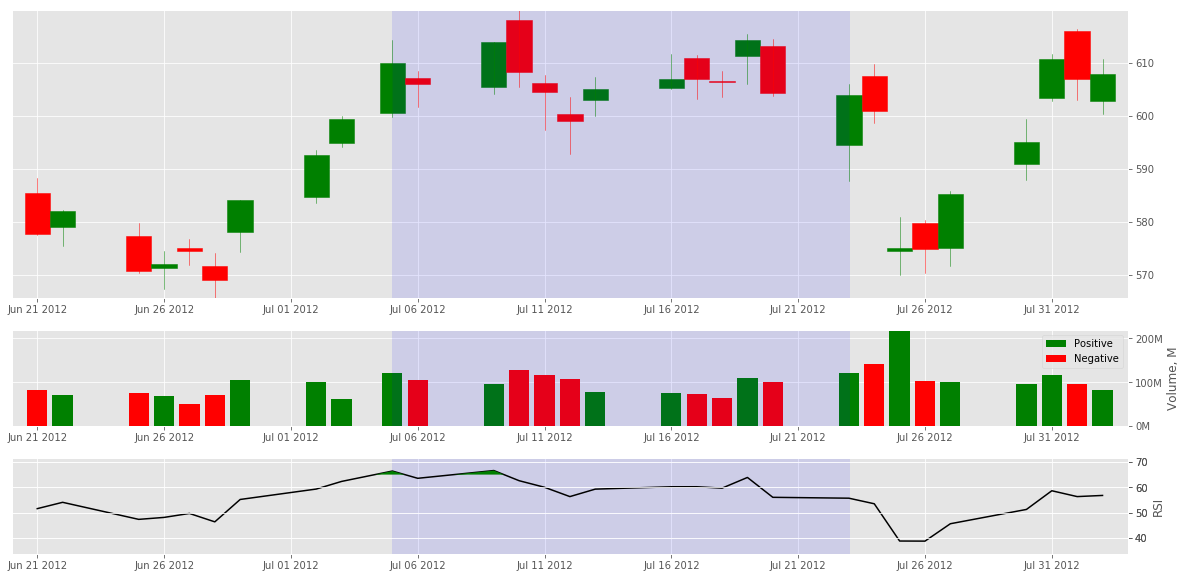

AAPL, Return 4.86%, Entry 630.00, Exit 660.59, Holding period 21 days


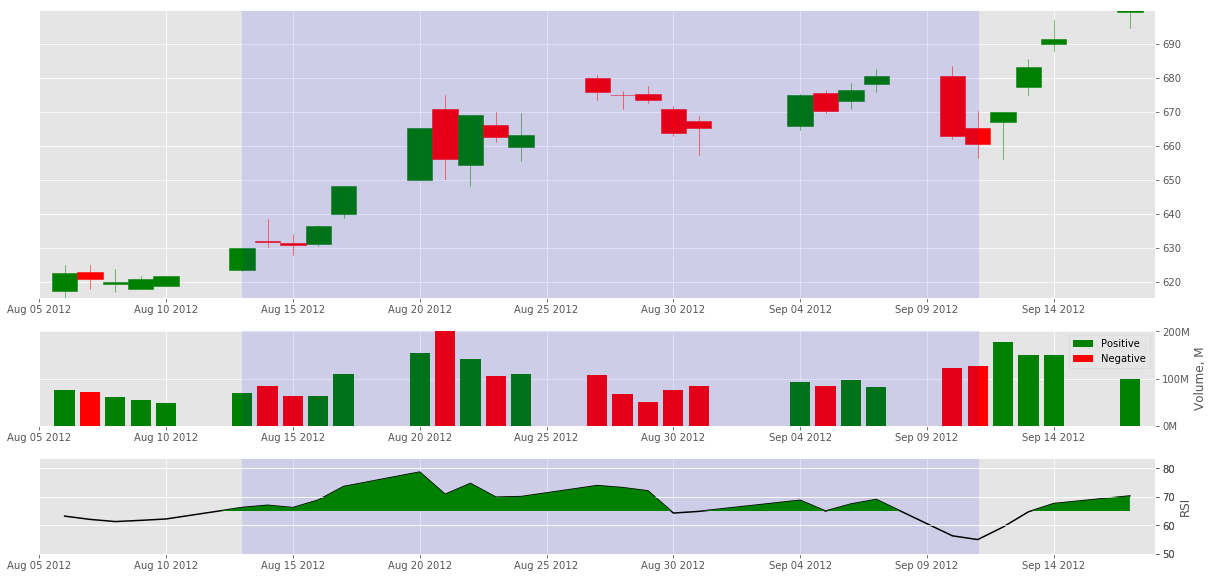

AAPL, Return -3.78%, Entry 691.28, Exit 665.18, Holding period 9 days


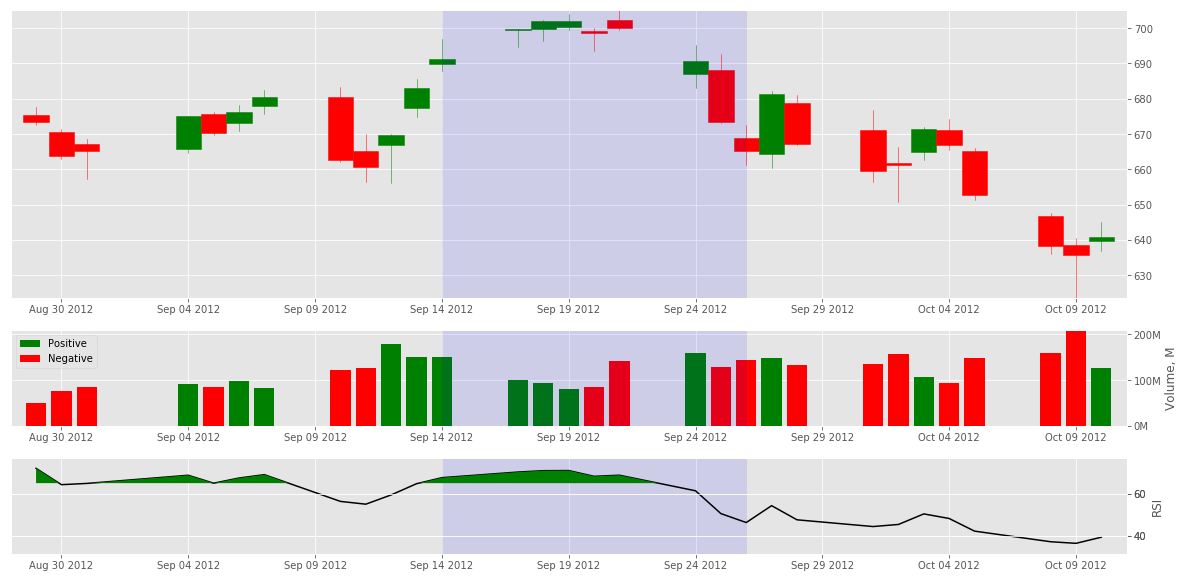

AAPL, Return -6.92%, Entry 460.71, Exit 428.85, Holding period 8 days


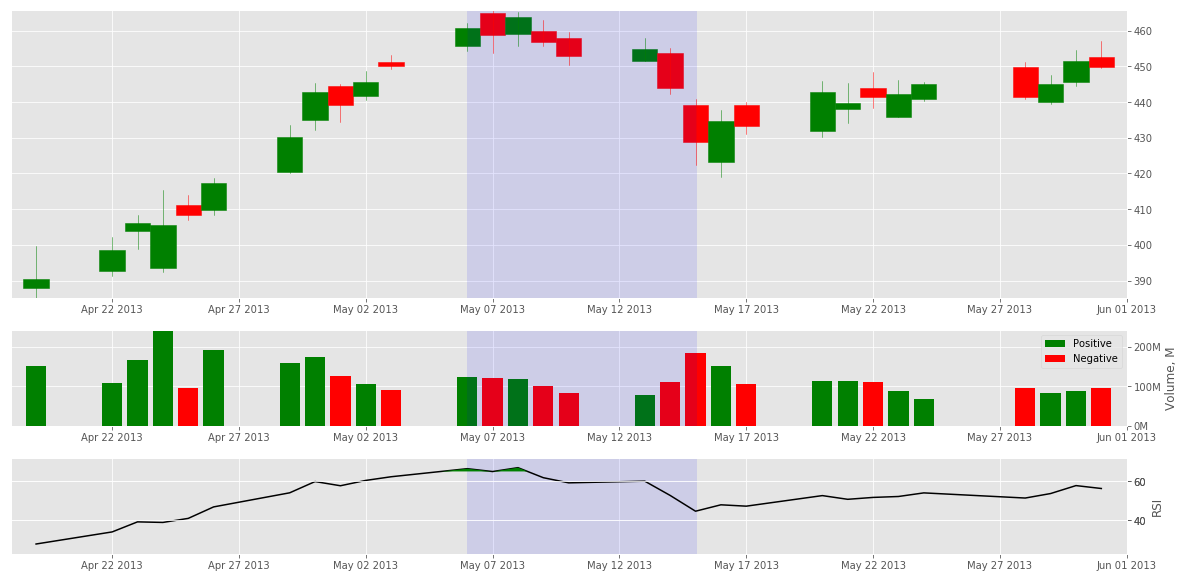

AAPL, Return 3.10%, Entry 453.32, Exit 467.36, Holding period 10 days


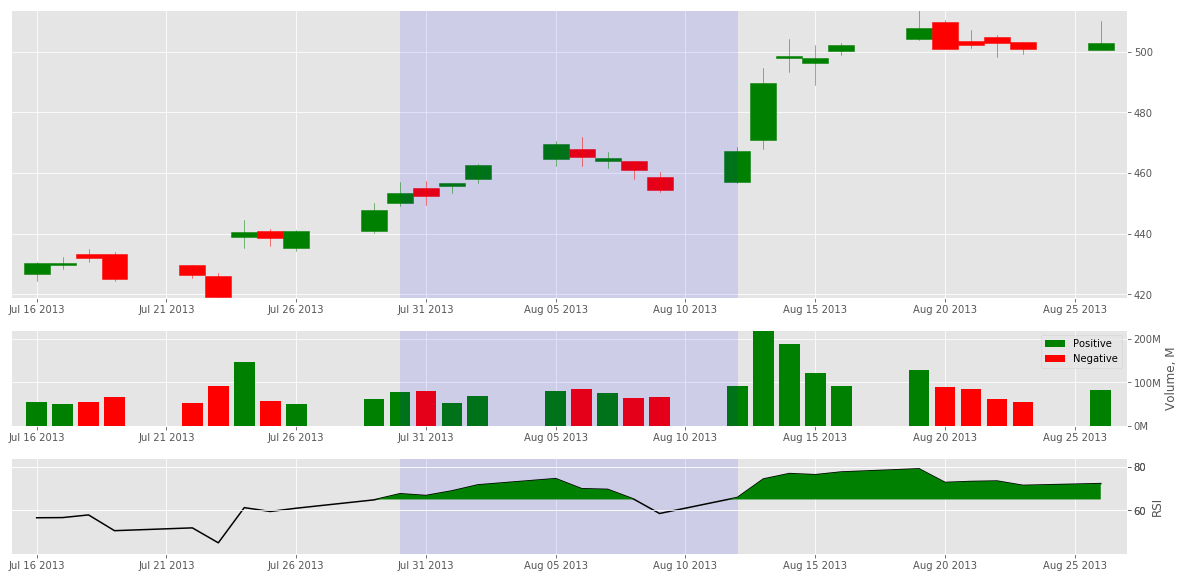

AAPL, Return 0.27%, Entry 489.57, Exit 490.90, Holding period 12 days


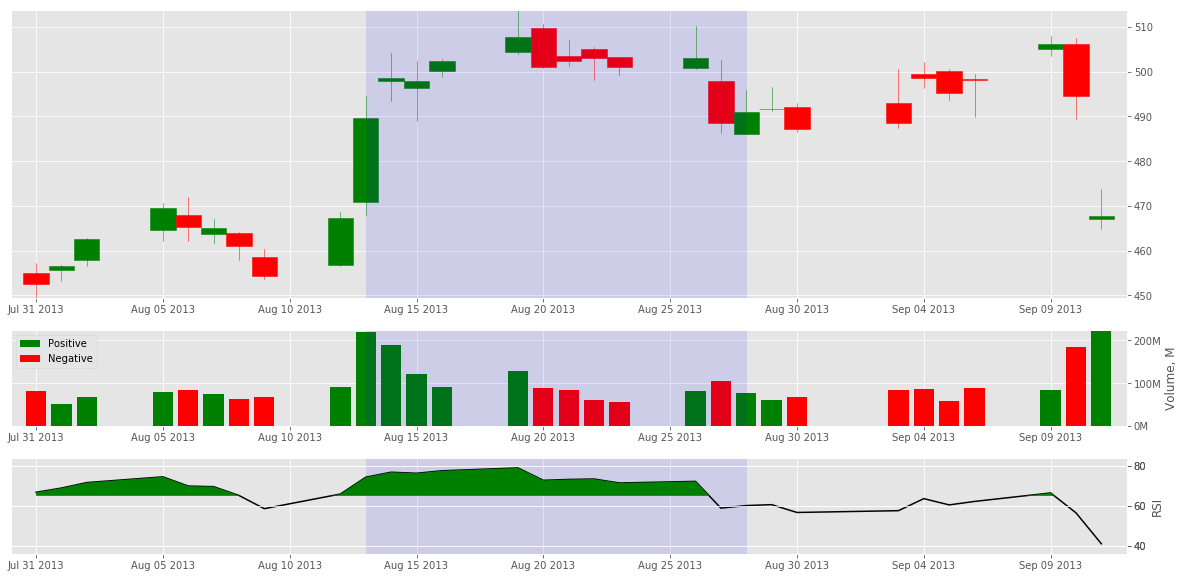

AAPL, Return -7.60%, Entry 506.17, Exit 467.71, Holding period 3 days


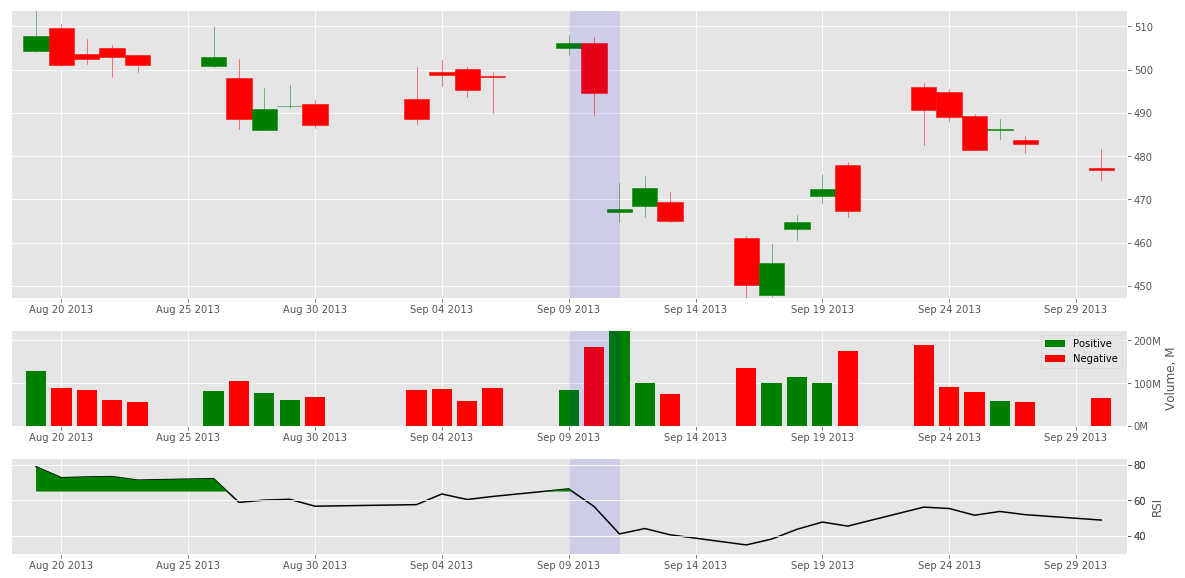

AAPL, Return 0.68%, Entry 521.36, Exit 524.90, Holding period 8 days


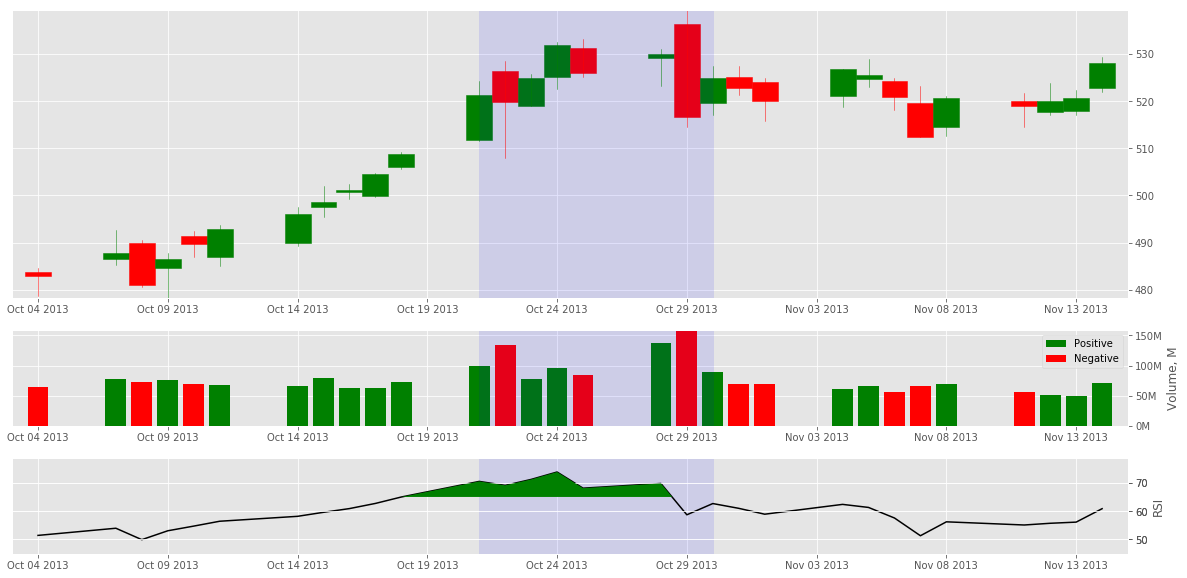

AAPL, Return 1.55%, Entry 545.96, Exit 554.43, Holding period 12 days


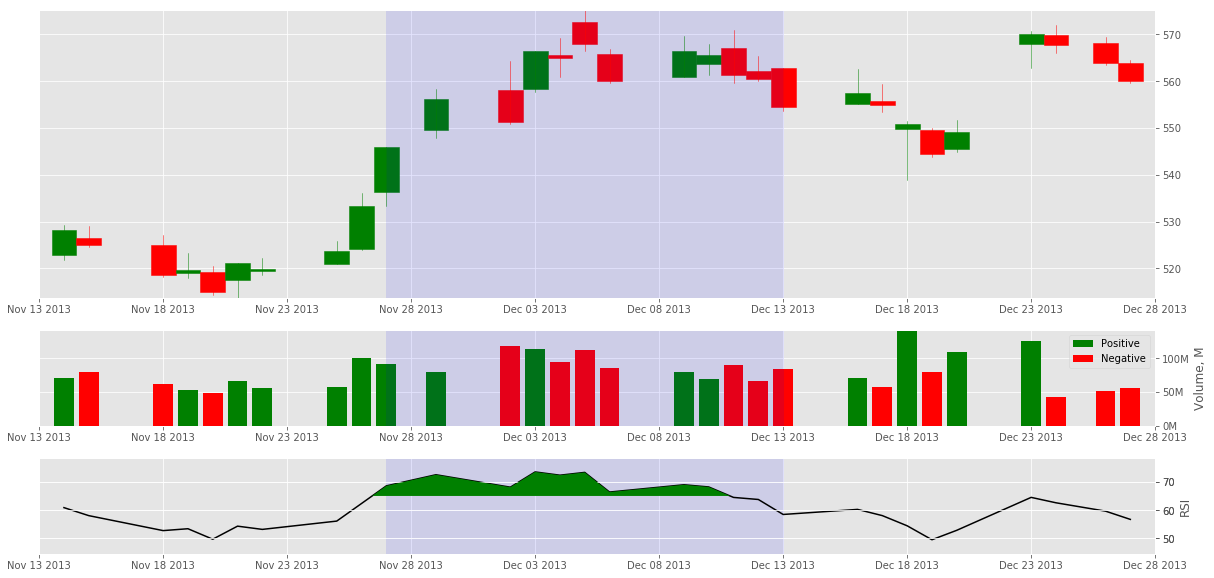

AAPL, Return 4.41%, Entry 567.77, Exit 592.83, Holding period 13 days


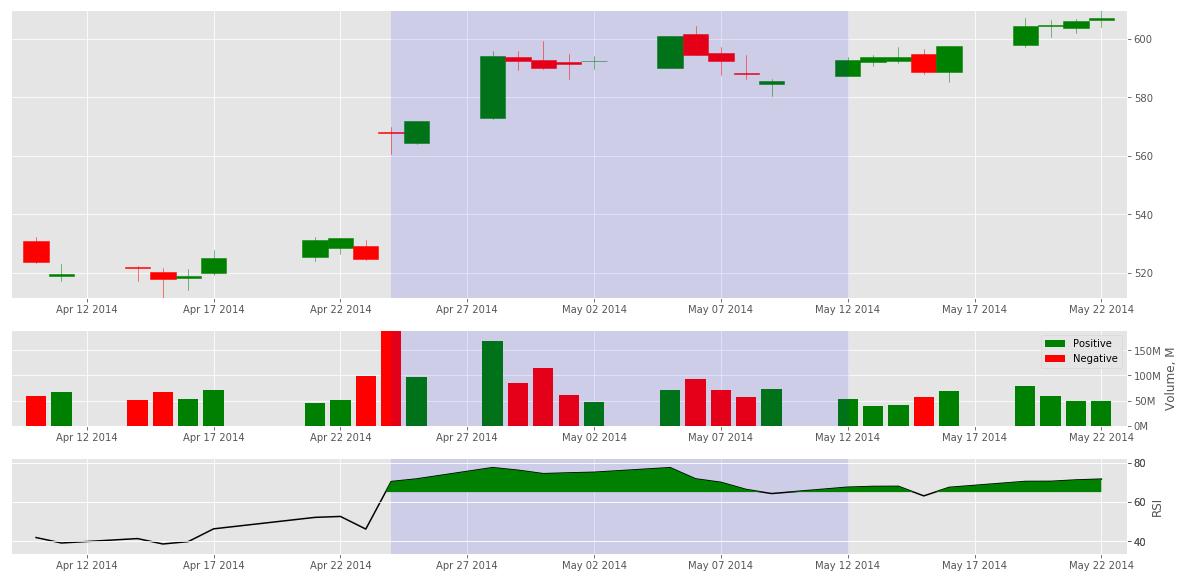

AAPL, Return 0.63%, Entry 593.76, Exit 597.51, Holding period 4 days


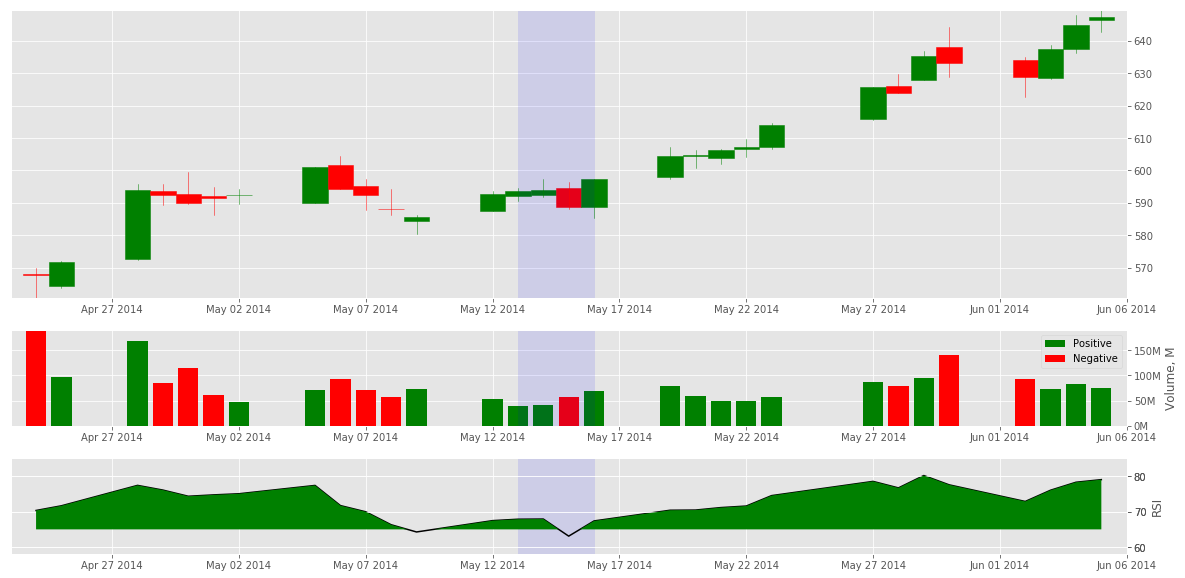

AAPL, Return -84.41%, Entry 604.59, Exit 94.25, Holding period 16 days


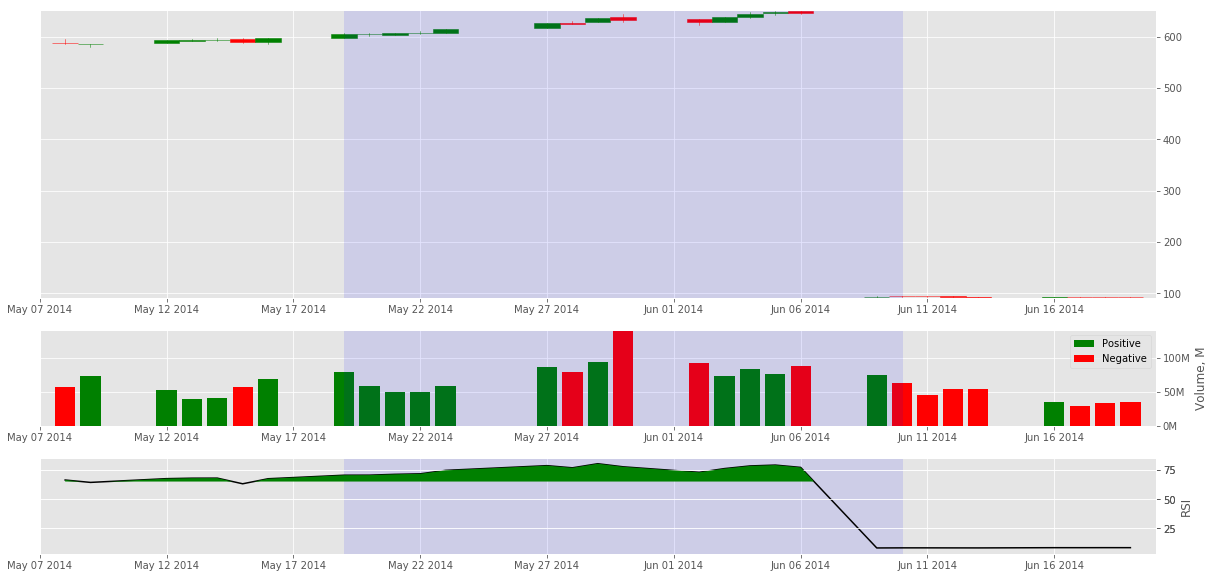

AAPL, Return 7.39%, Entry 106.74, Exit 114.63, Holding period 25 days


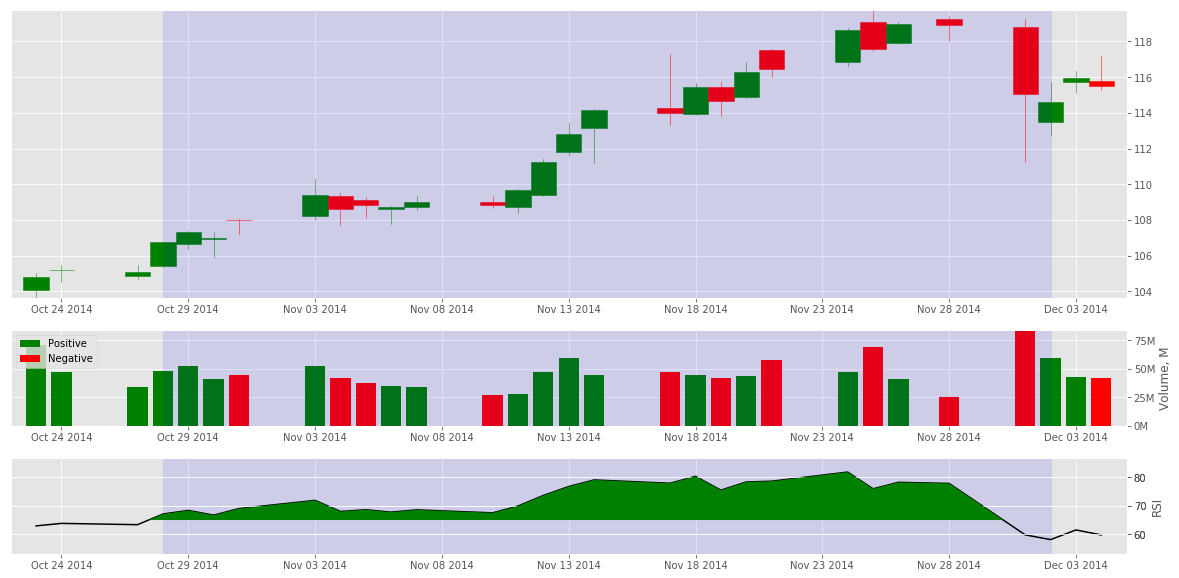

AAPL, Return 5.79%, Entry 122.02, Exit 129.09, Holding period 14 days


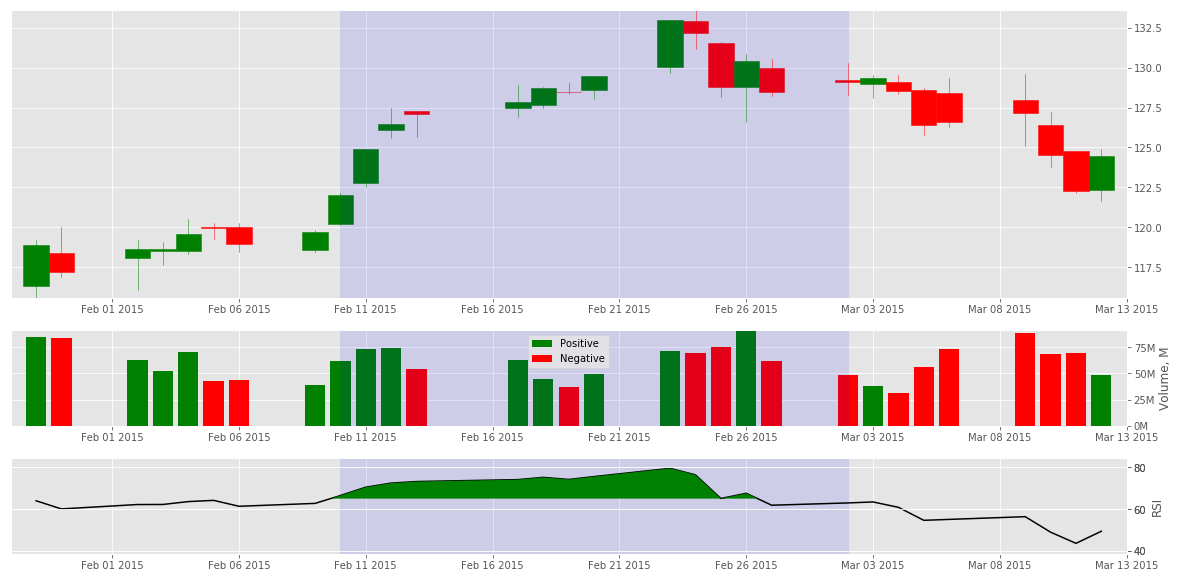

AAPL, Return -2.79%, Entry 132.65, Exit 128.95, Holding period 5 days


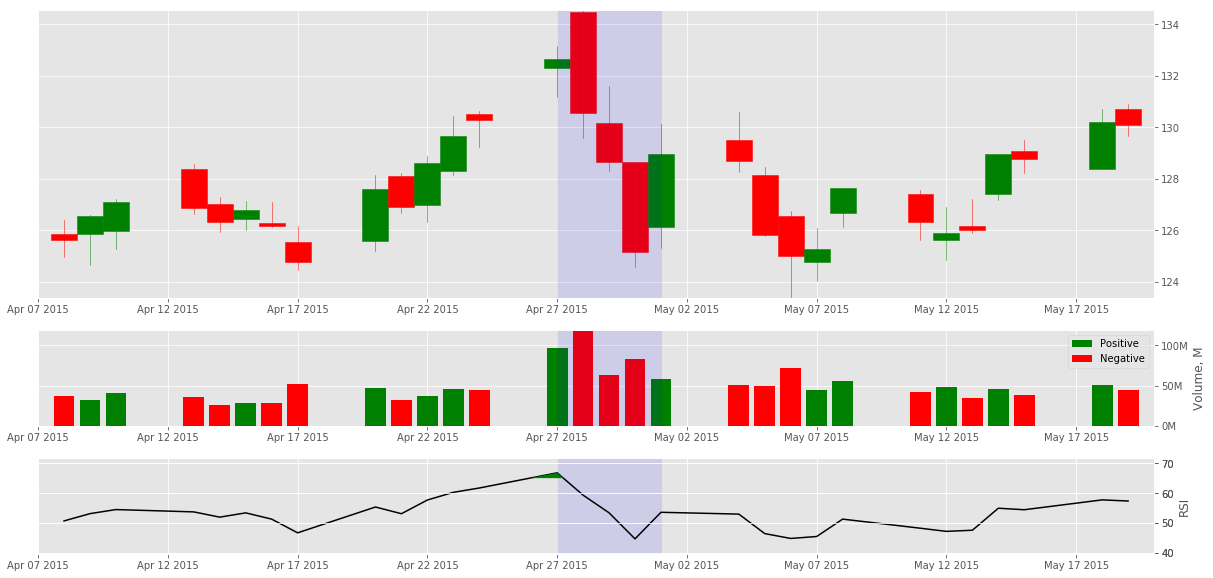

AAPL, Return -2.49%, Entry 119.08, Exit 116.11, Holding period 14 days


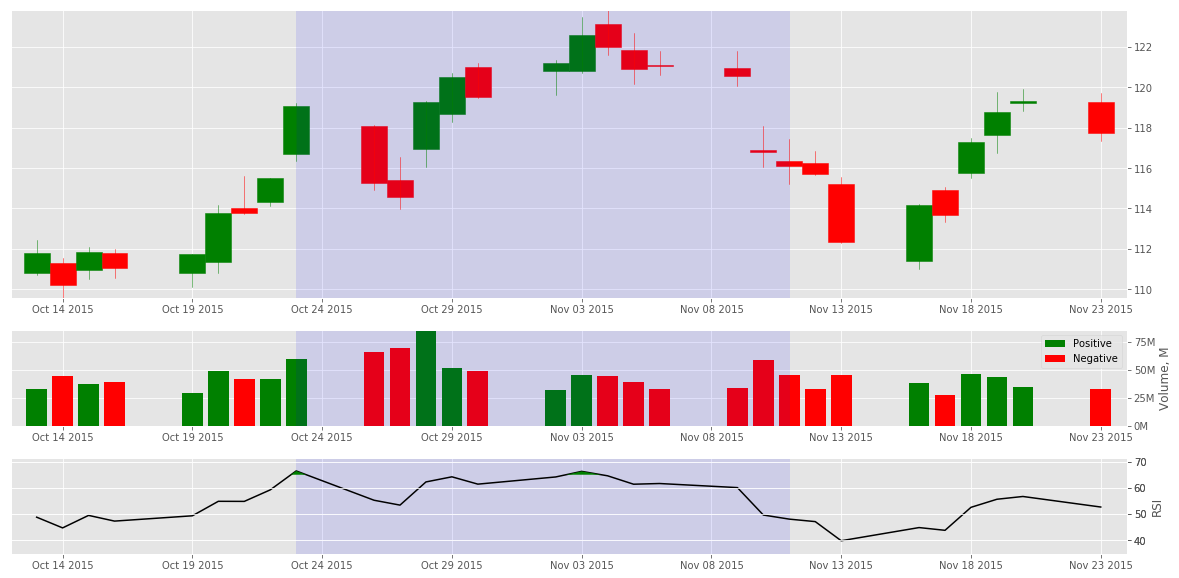

AAPL, Return 4.25%, Entry 104.58, Exit 109.02, Holding period 19 days


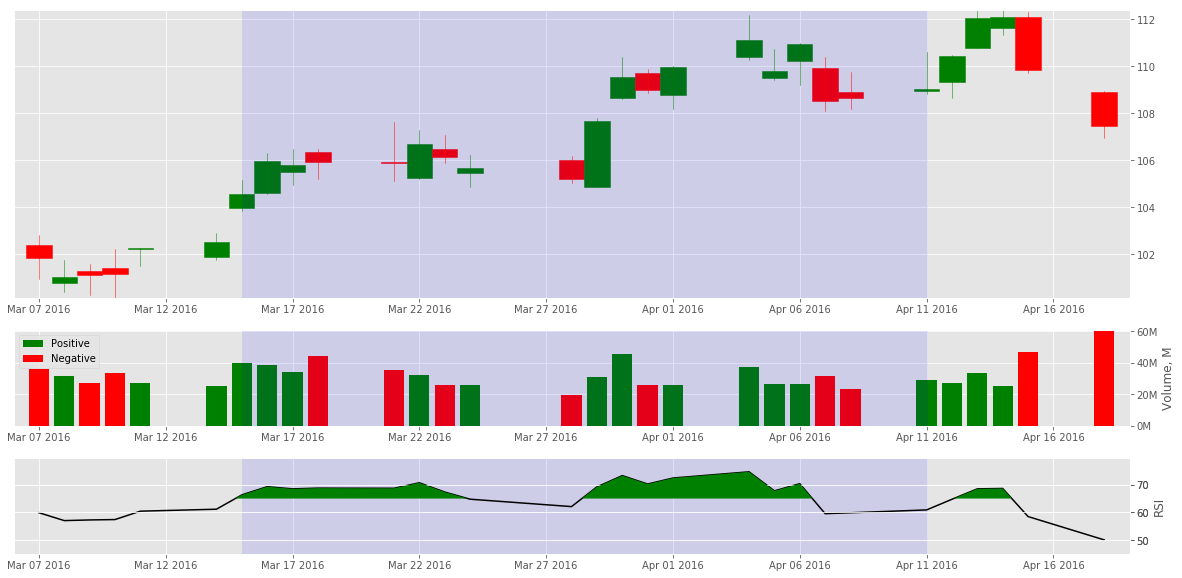

AAPL, Return -4.07%, Entry 112.04, Exit 107.48, Holding period 4 days


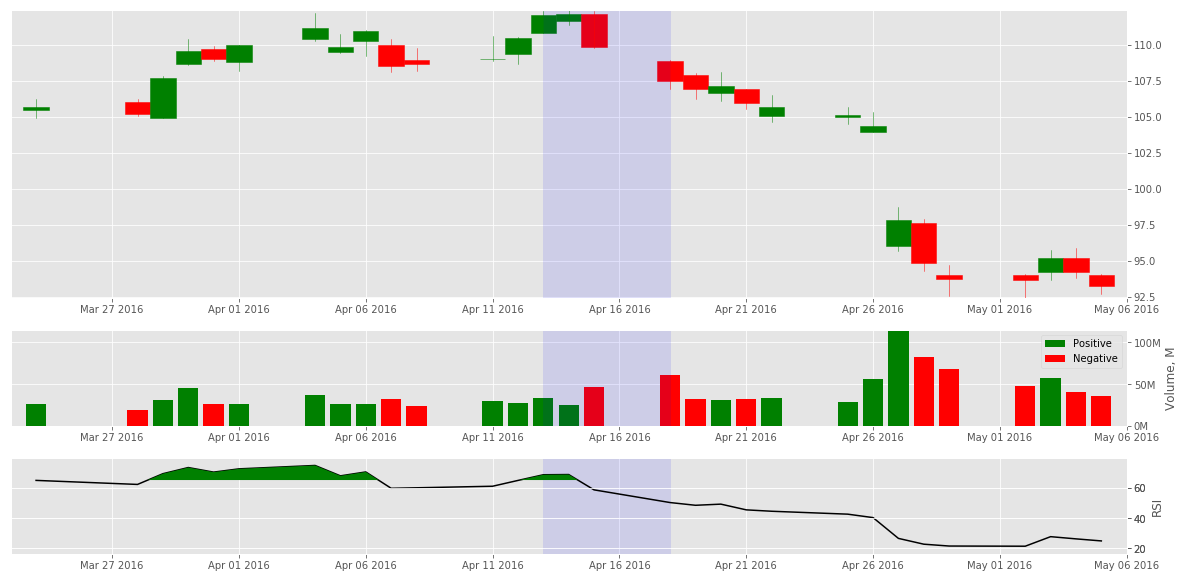

AAPL, Return 4.49%, Entry 102.95, Exit 107.57, Holding period 22 days


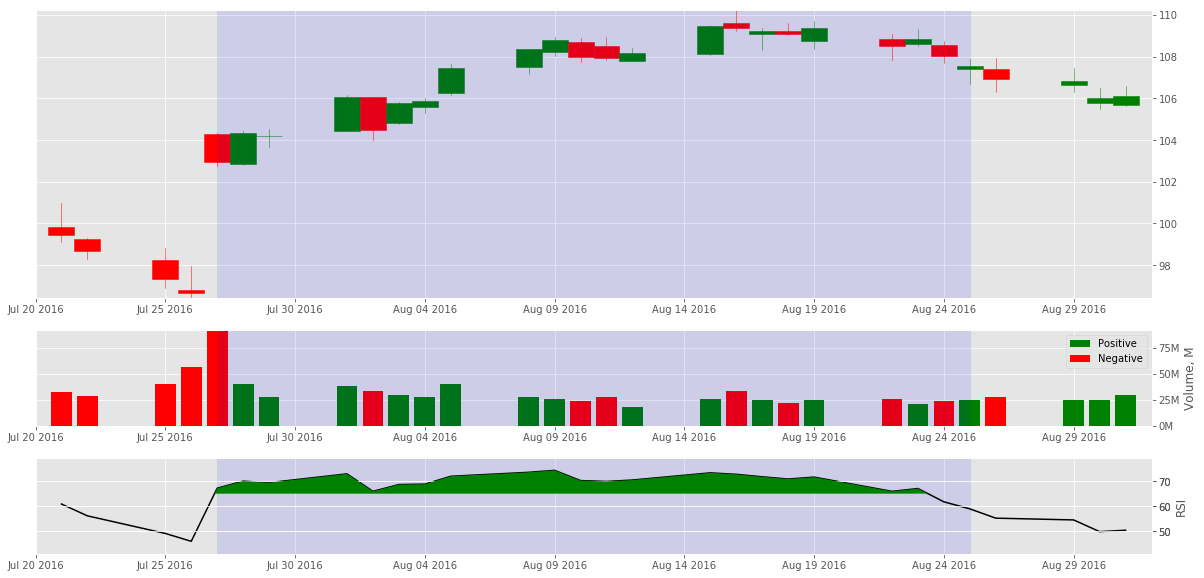

AAPL, Return 1.95%, Entry 111.77, Exit 113.95, Holding period 11 days


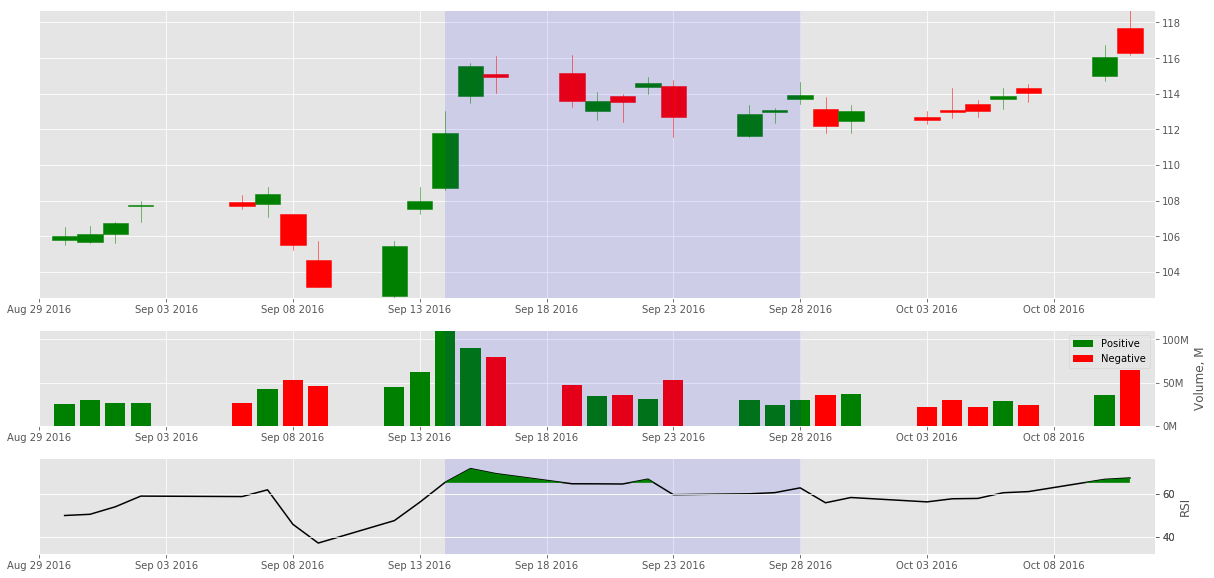

AAPL, Return 1.38%, Entry 116.05, Exit 117.65, Holding period 11 days


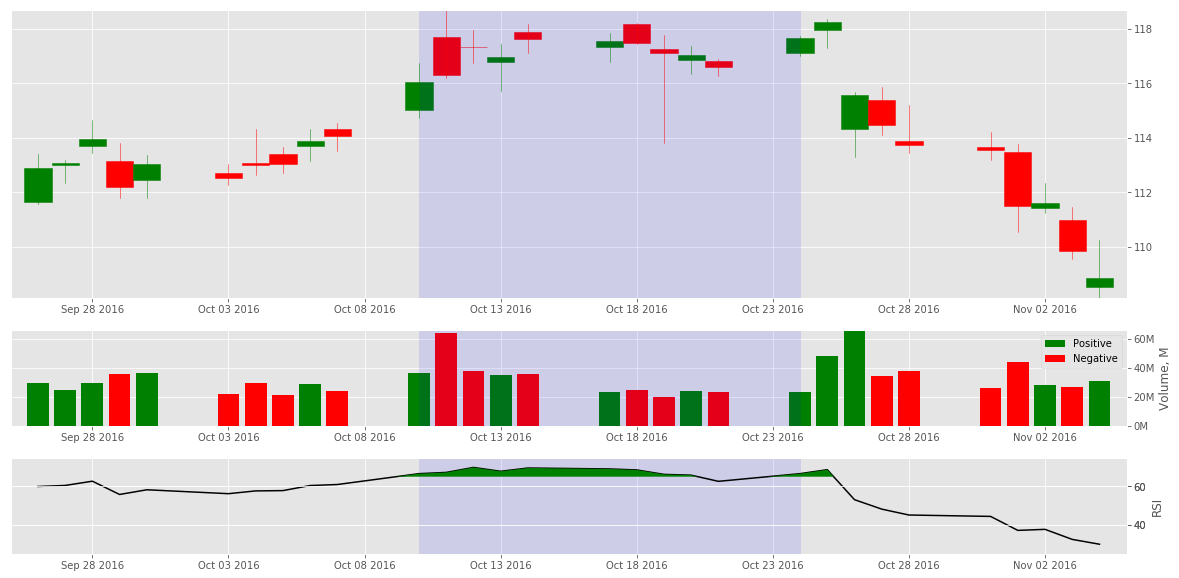

AAPL, Return -3.19%, Entry 118.25, Exit 114.48, Holding period 3 days


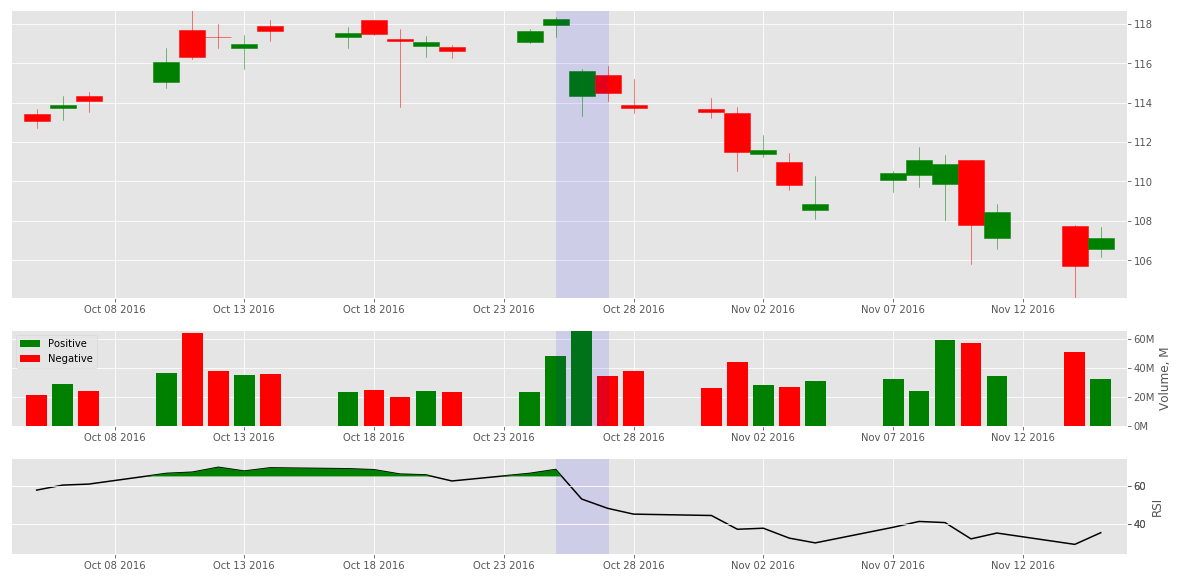

AAPL, Return 0.28%, Entry 115.82, Exit 116.15, Holding period 12 days


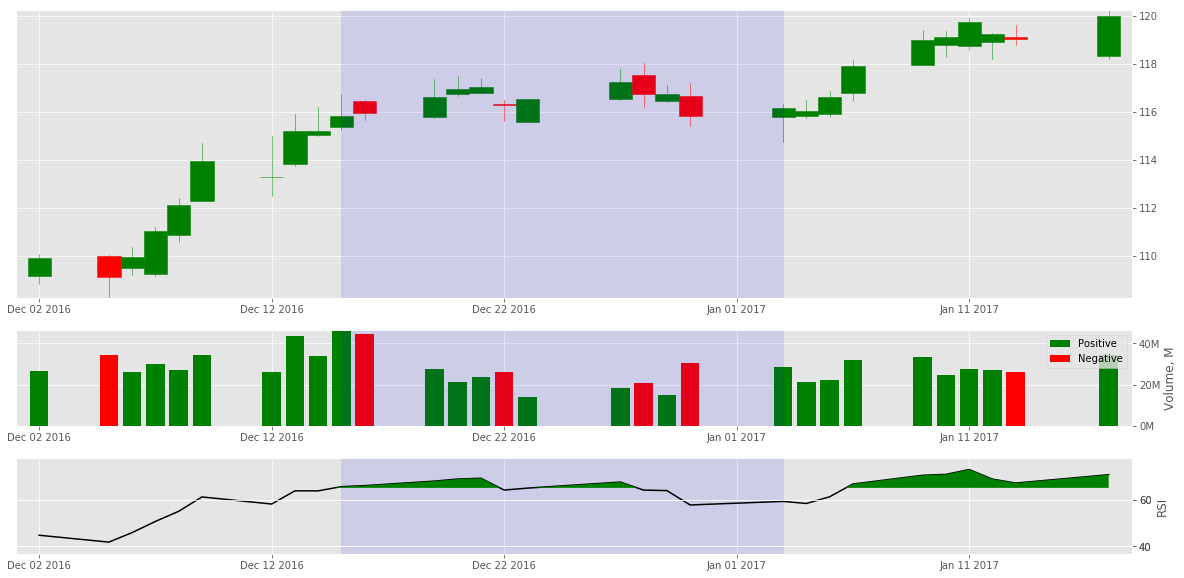

AAPL, Return 20.12%, Entry 117.91, Exit 141.63, Holding period 66 days


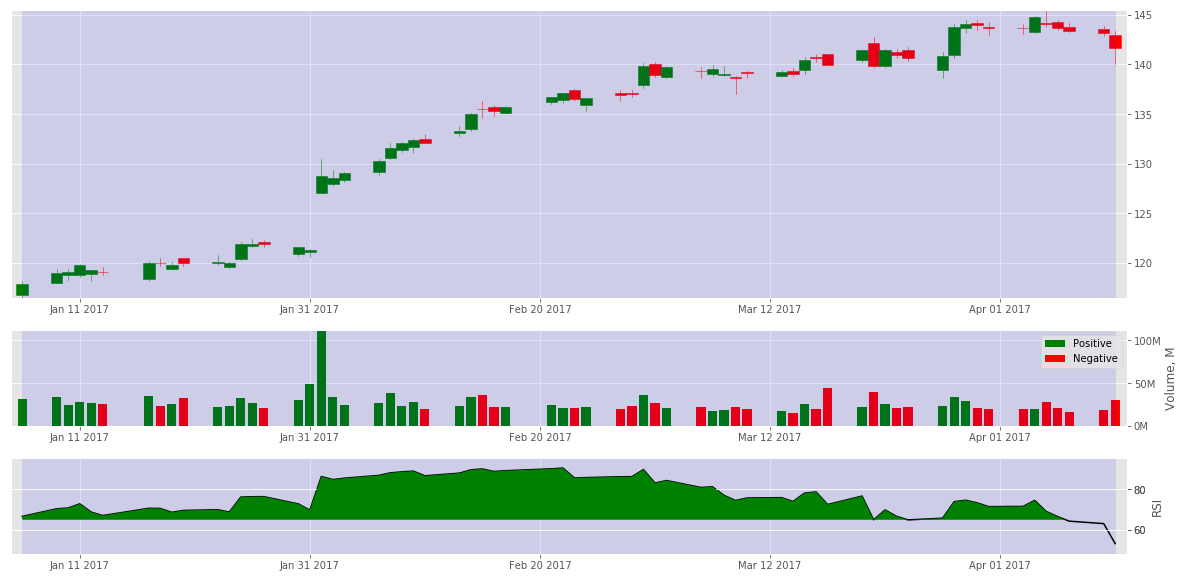

GOOG, Return 21.90%, Entry 610.82, Exit 744.56, Holding period 58 days


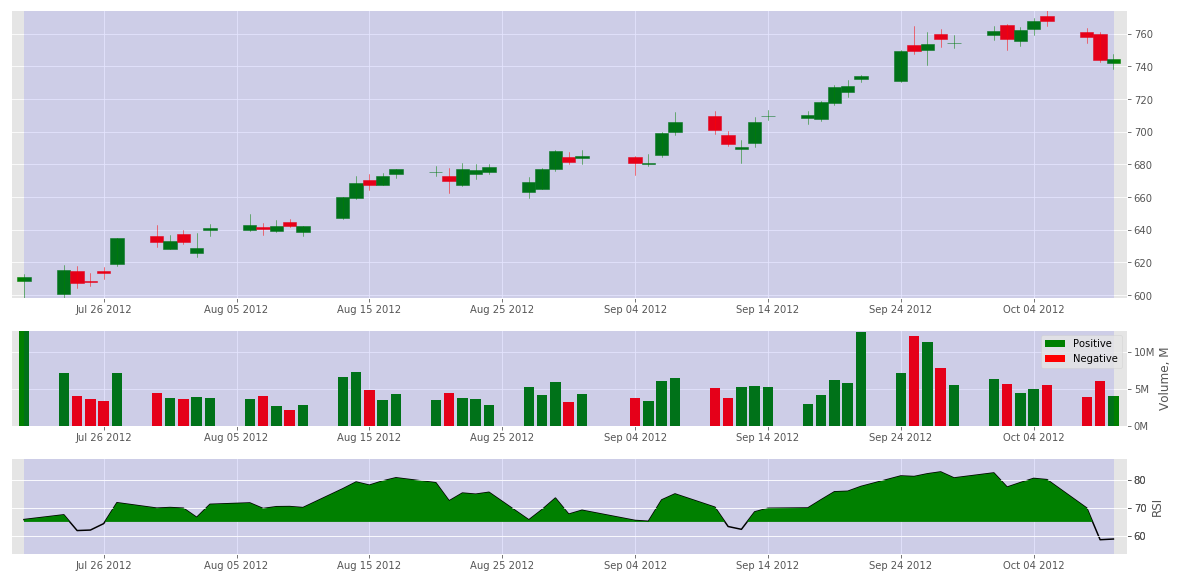

GOOG, Return -2.01%, Entry 720.78, Exit 706.29, Holding period 8 days


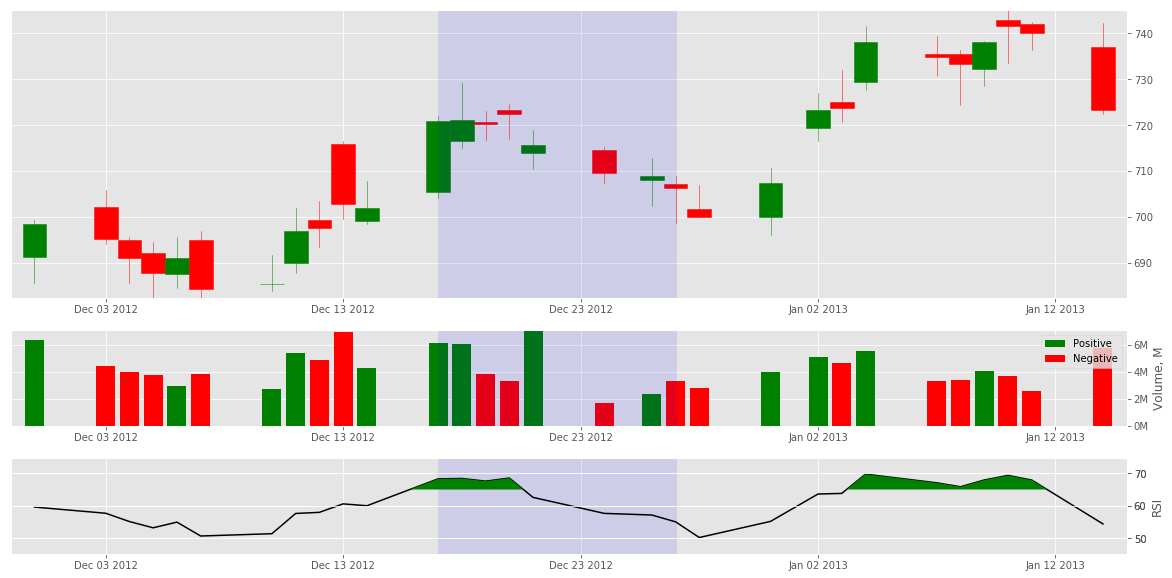

GOOG, Return -1.77%, Entry 737.97, Exit 724.93, Holding period 8 days


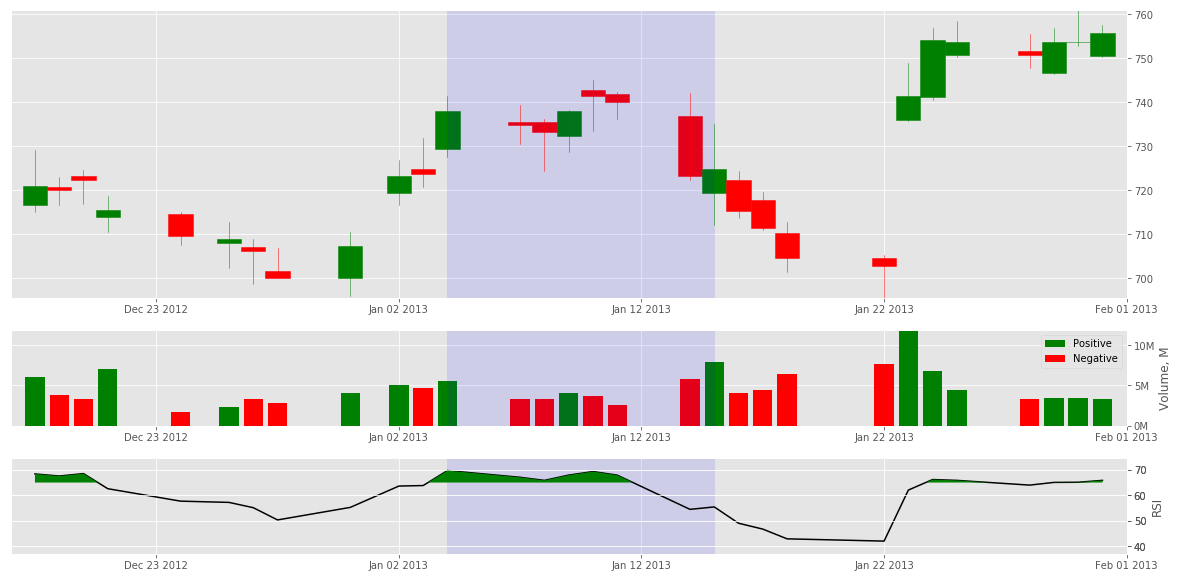

GOOG, Return 6.04%, Entry 754.21, Exit 799.78, Holding period 24 days


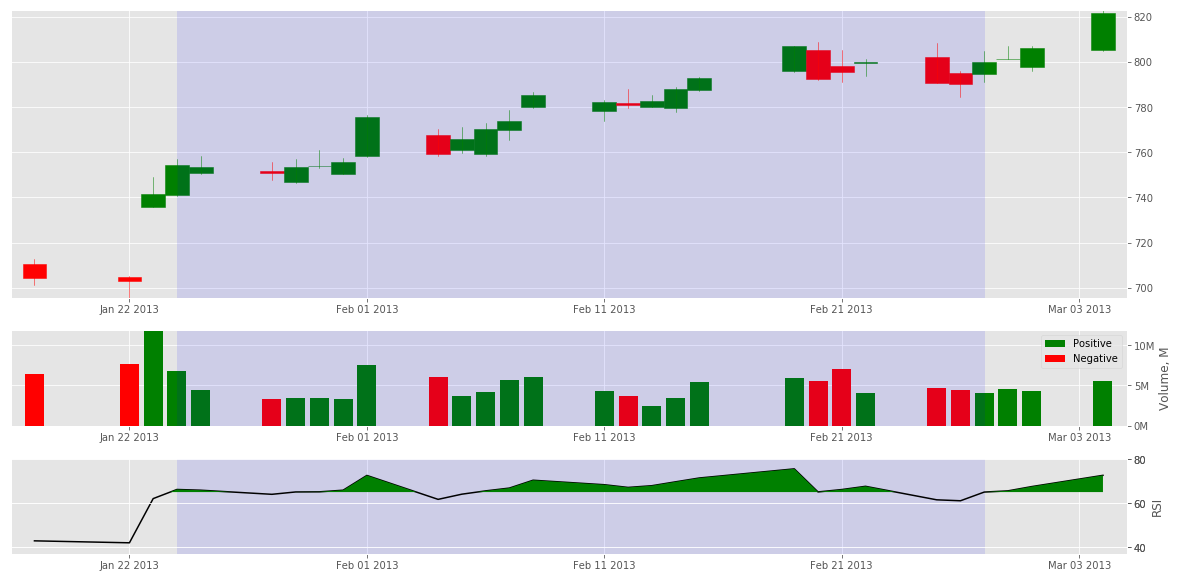

GOOG, Return 1.64%, Entry 801.20, Exit 814.30, Holding period 12 days


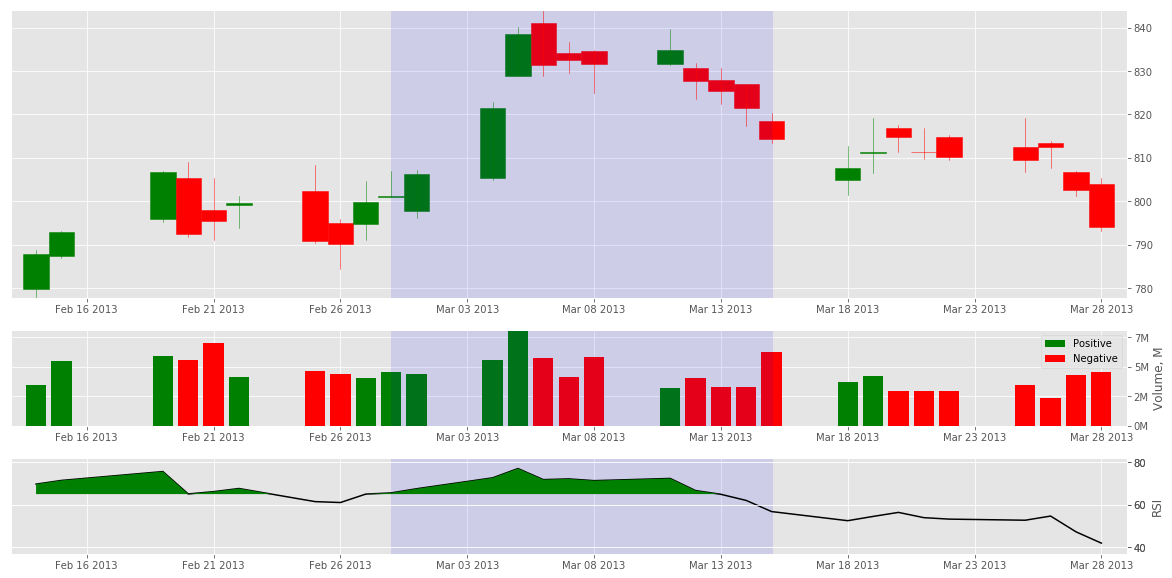

GOOG, Return 4.38%, Entry 845.72, Exit 882.79, Holding period 15 days


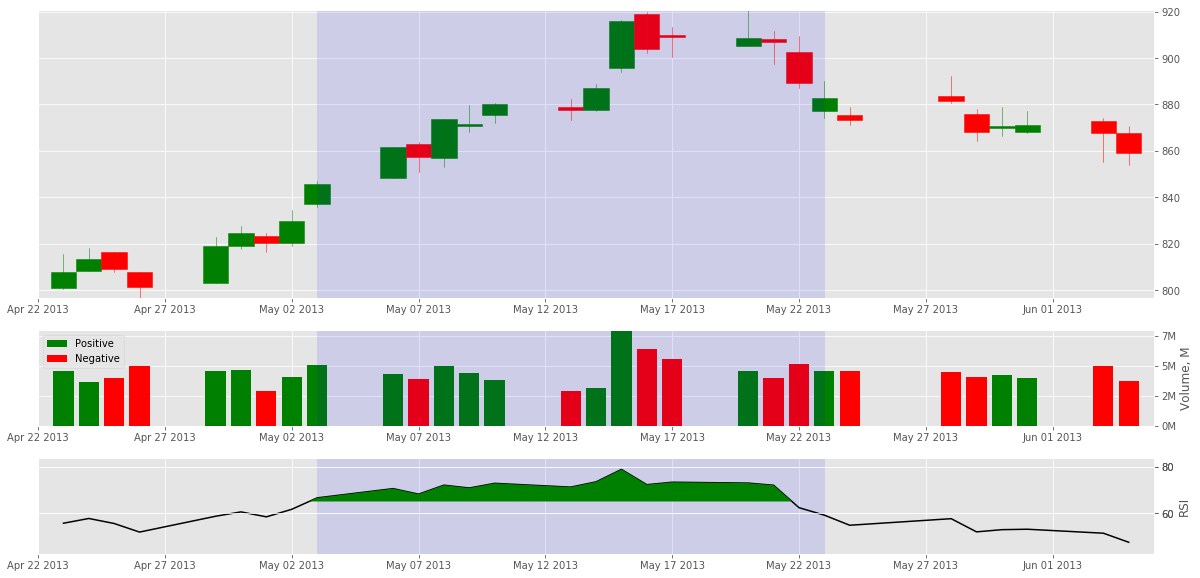

GOOG, Return -1.04%, Entry 920.24, Exit 910.70, Holding period 8 days


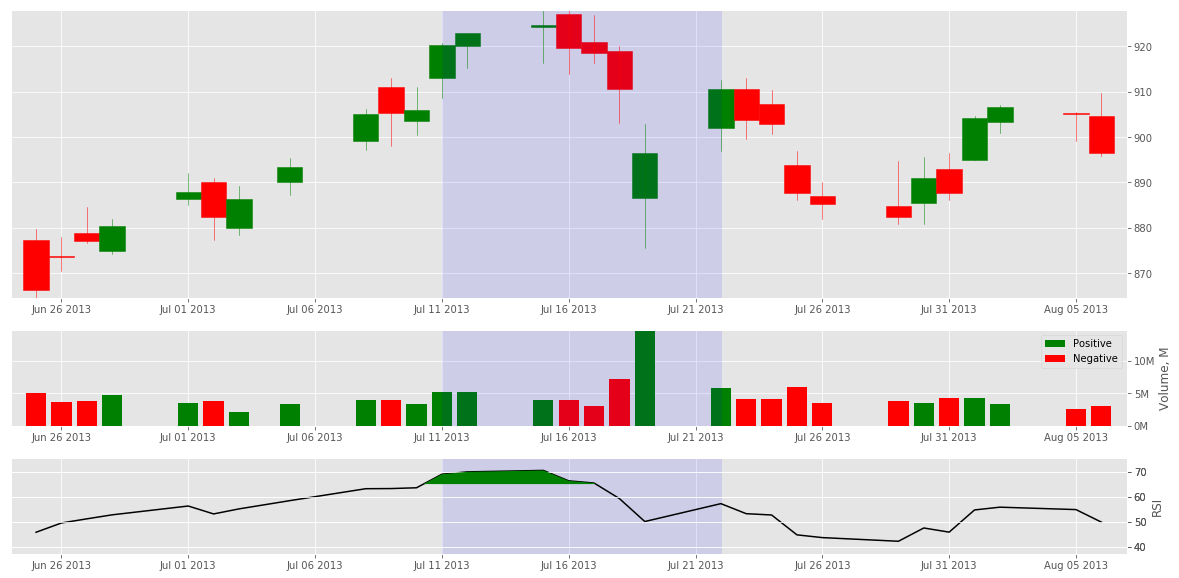

GOOG, Return 0.46%, Entry 1011.41, Exit 1016.03, Holding period 16 days


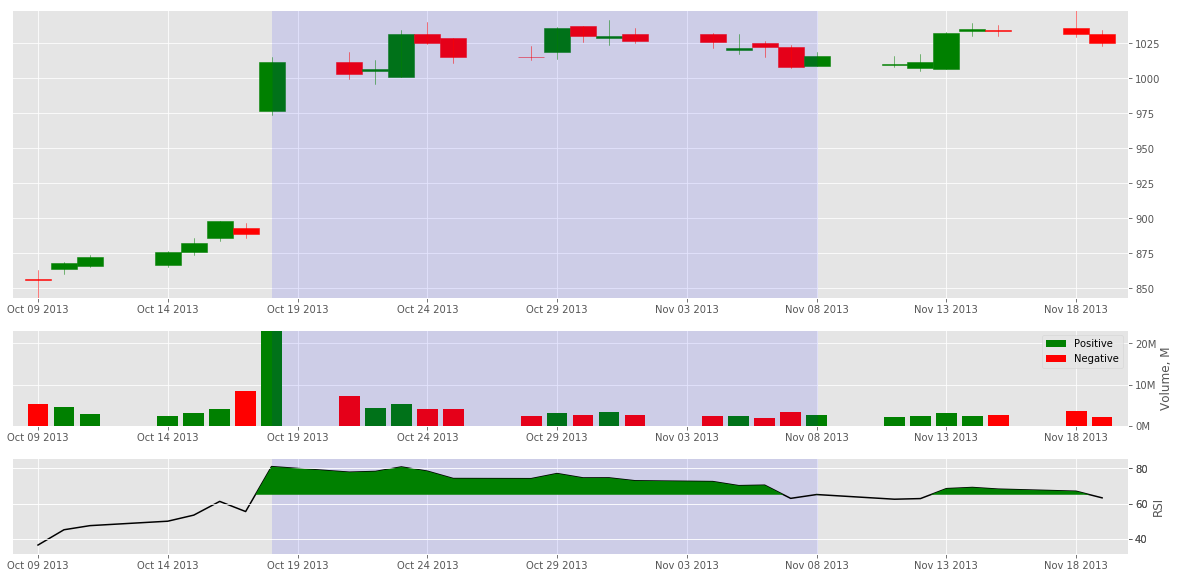

GOOG, Return 0.15%, Entry 1032.47, Exit 1034.07, Holding period 7 days


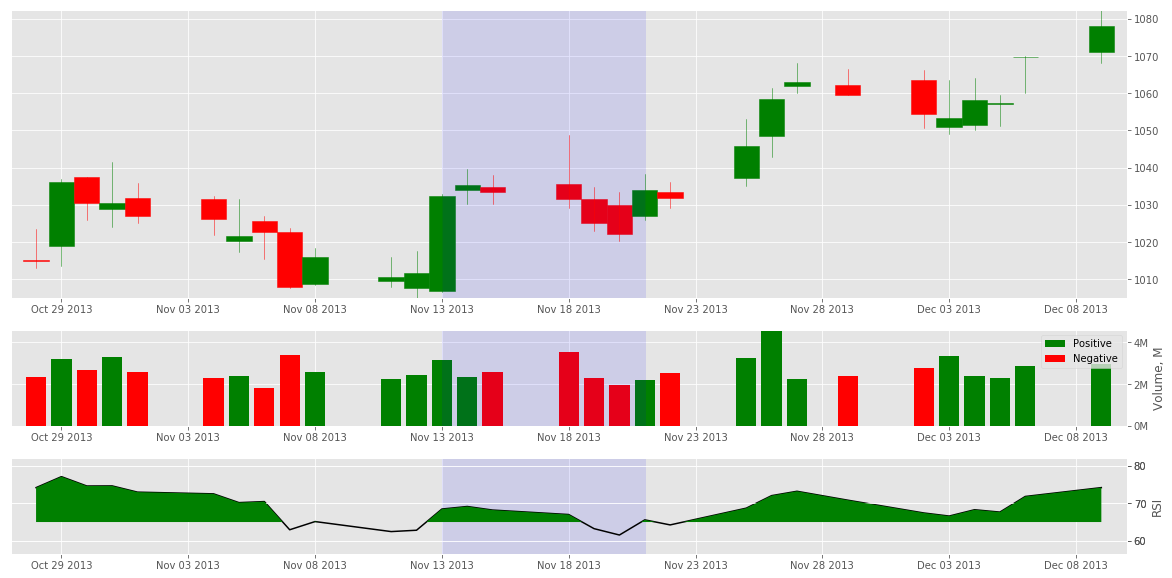

GOOG, Return 2.59%, Entry 1045.93, Exit 1072.98, Holding period 15 days


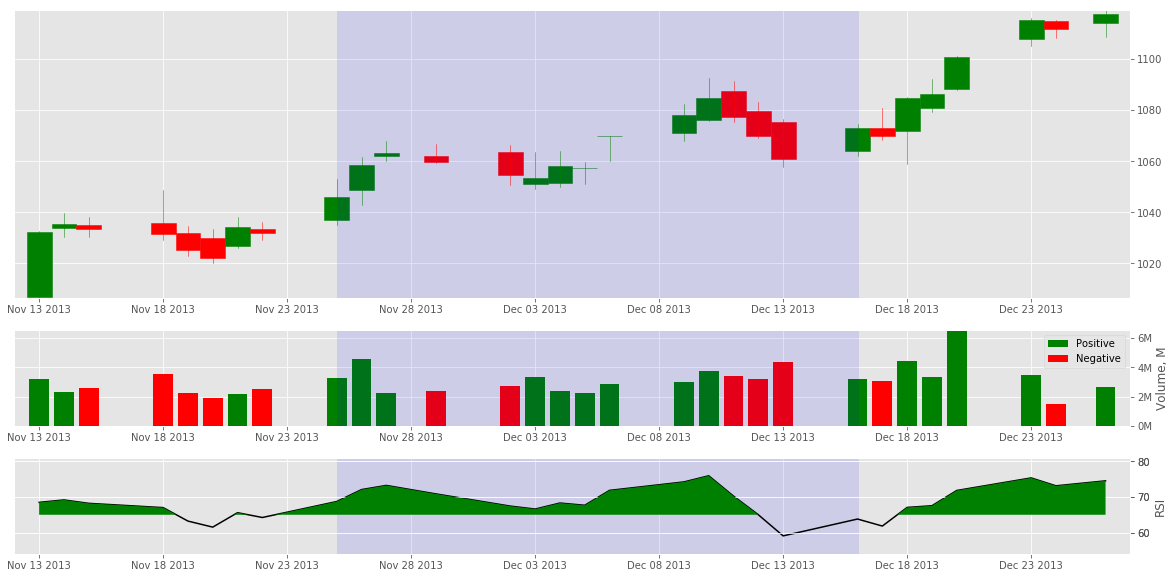

GOOG, Return 3.00%, Entry 1084.75, Exit 1117.32, Holding period 12 days


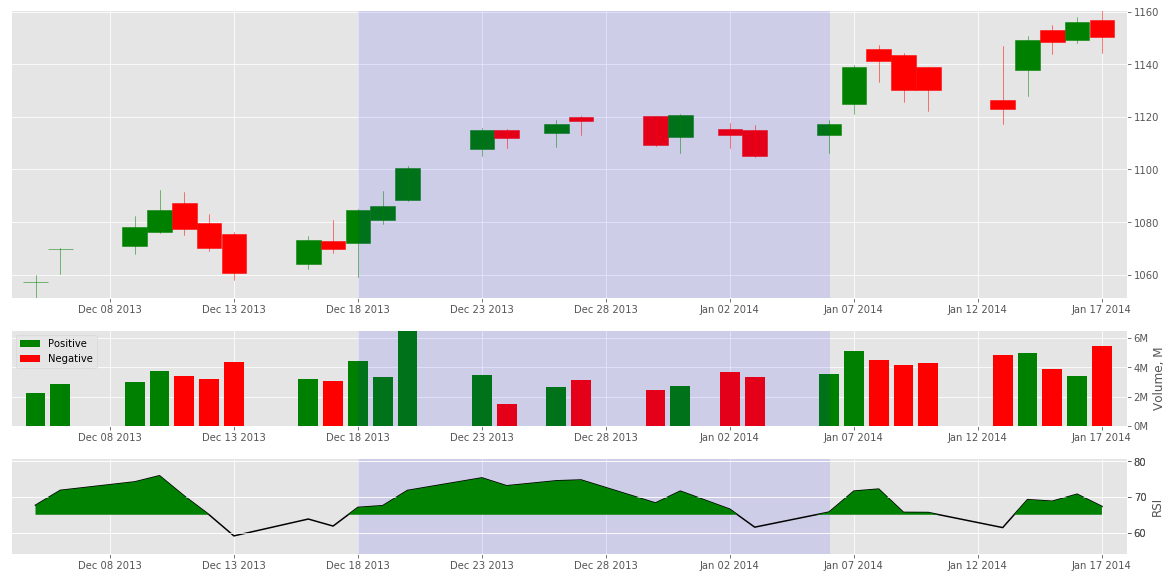

GOOG, Return -3.30%, Entry 1138.86, Exit 1101.23, Holding period 14 days


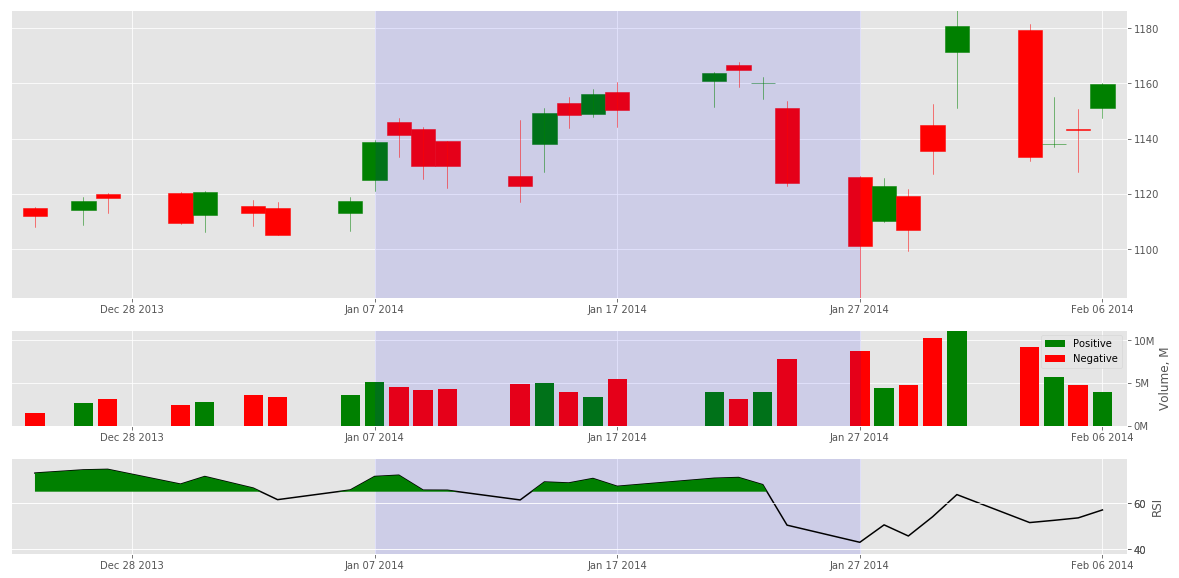

GOOG, Return 0.33%, Entry 1210.88, Exit 1214.91, Holding period 11 days


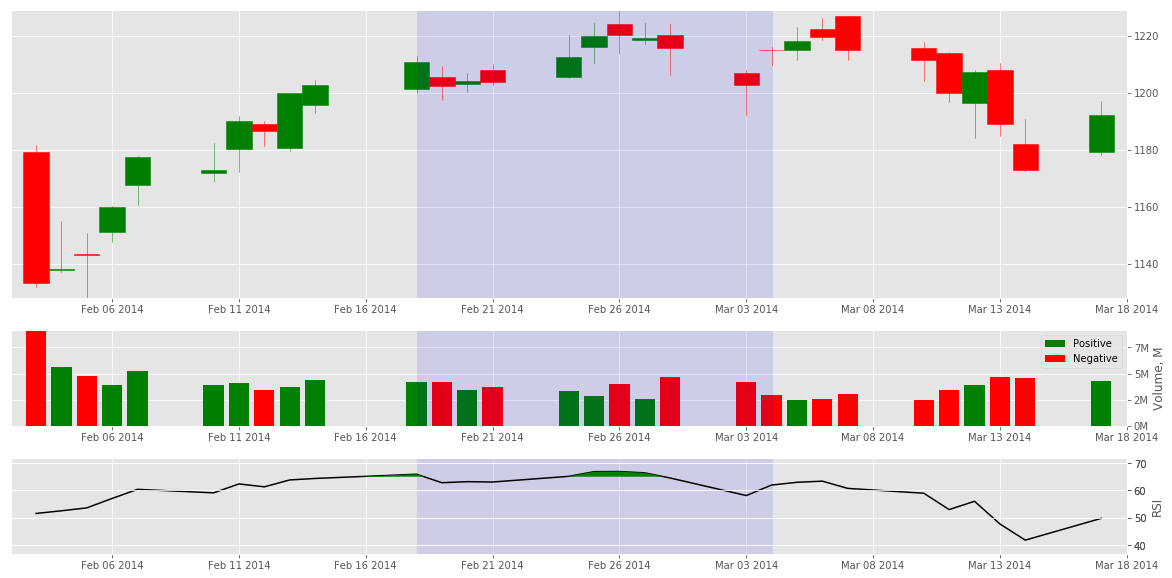

GOOG, Return -1.48%, Entry 584.73, Exit 576.08, Holding period 4 days


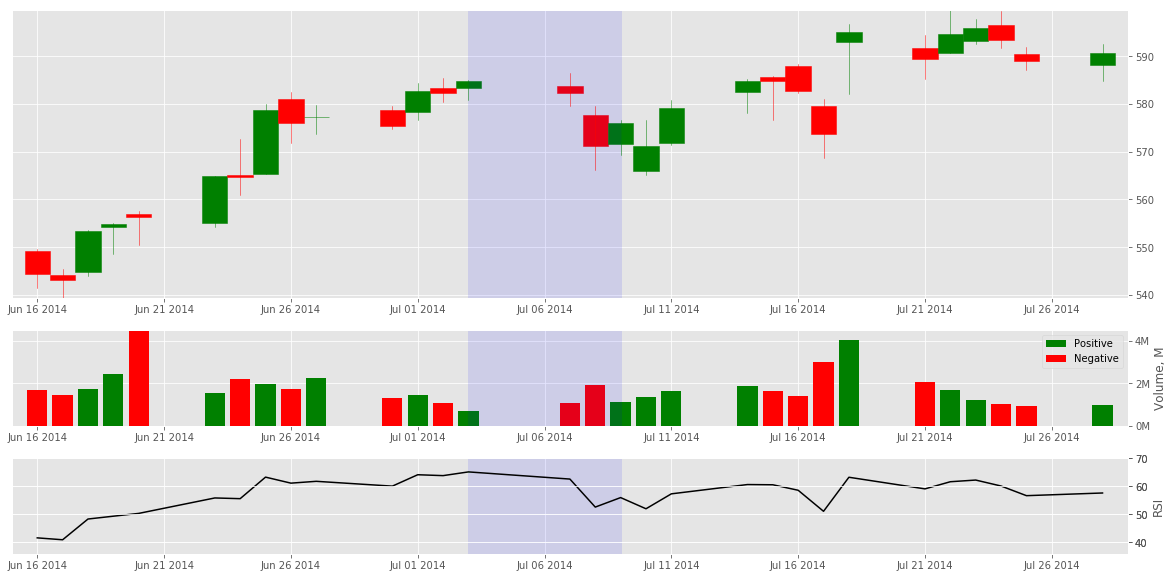

GOOG, Return -5.42%, Entry 539.95, Exit 510.66, Holding period 5 days


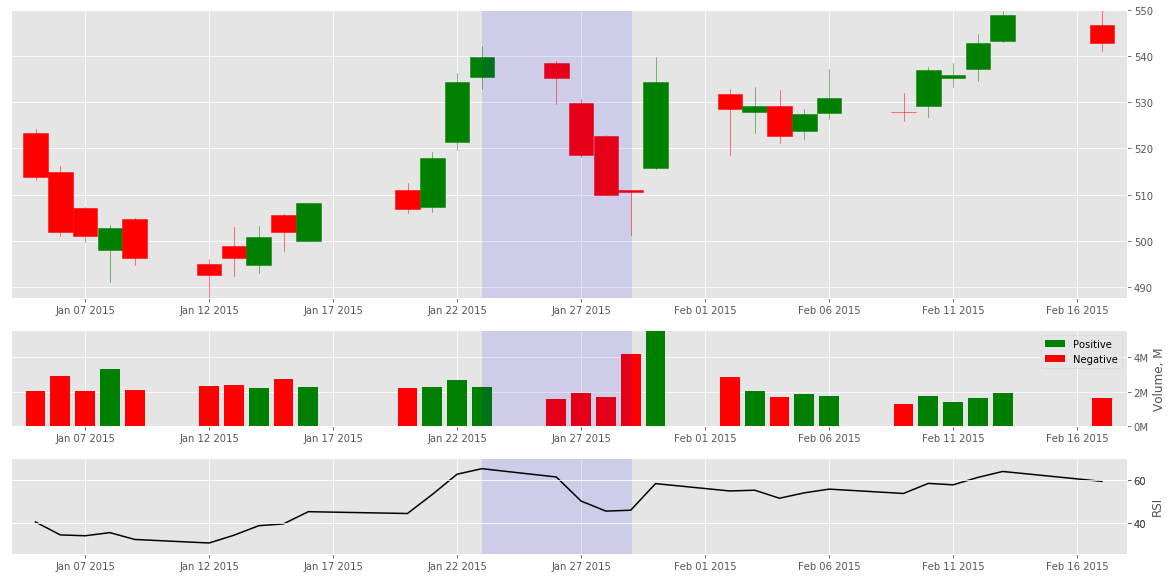

GOOG, Return -3.53%, Entry 571.34, Exit 551.18, Holding period 8 days


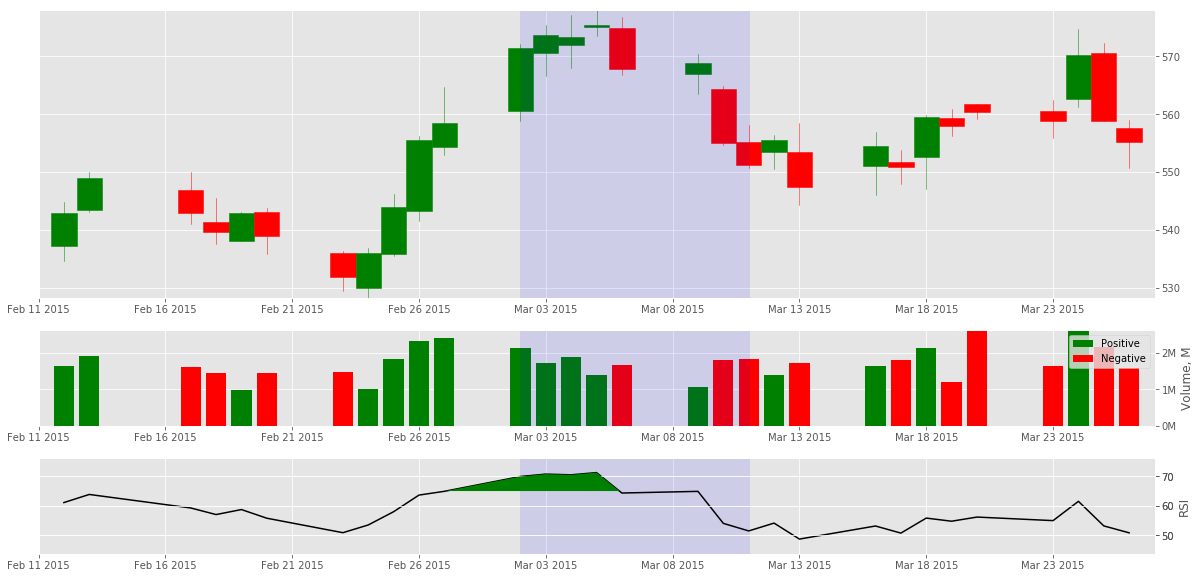

GOOG, Return 12.50%, Entry 561.10, Exit 631.21, Holding period 15 days


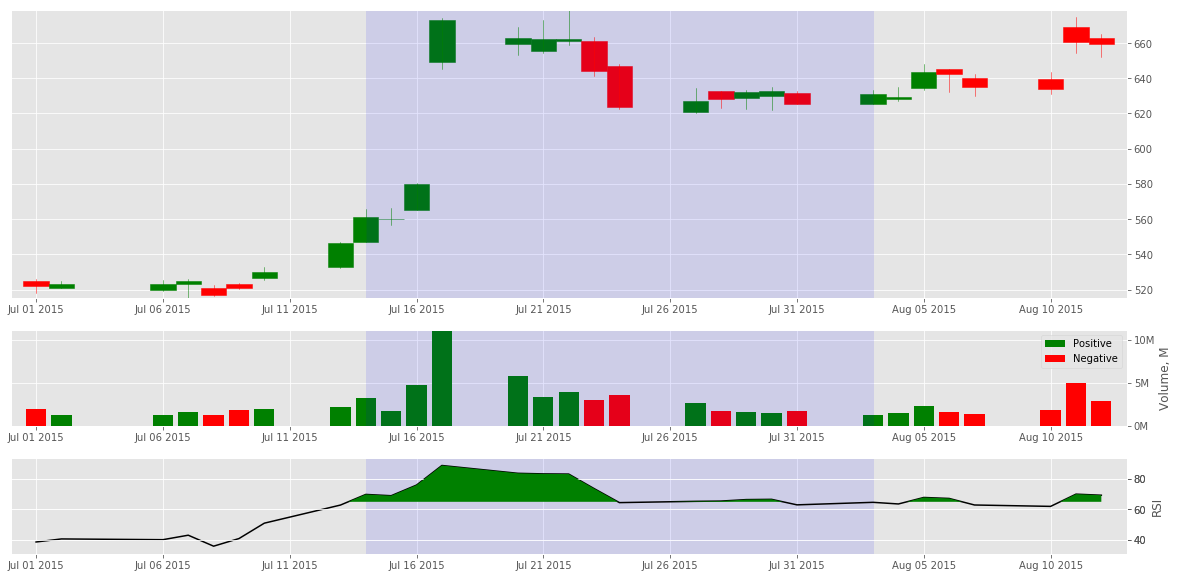

GOOG, Return -4.86%, Entry 643.78, Exit 612.48, Holding period 13 days


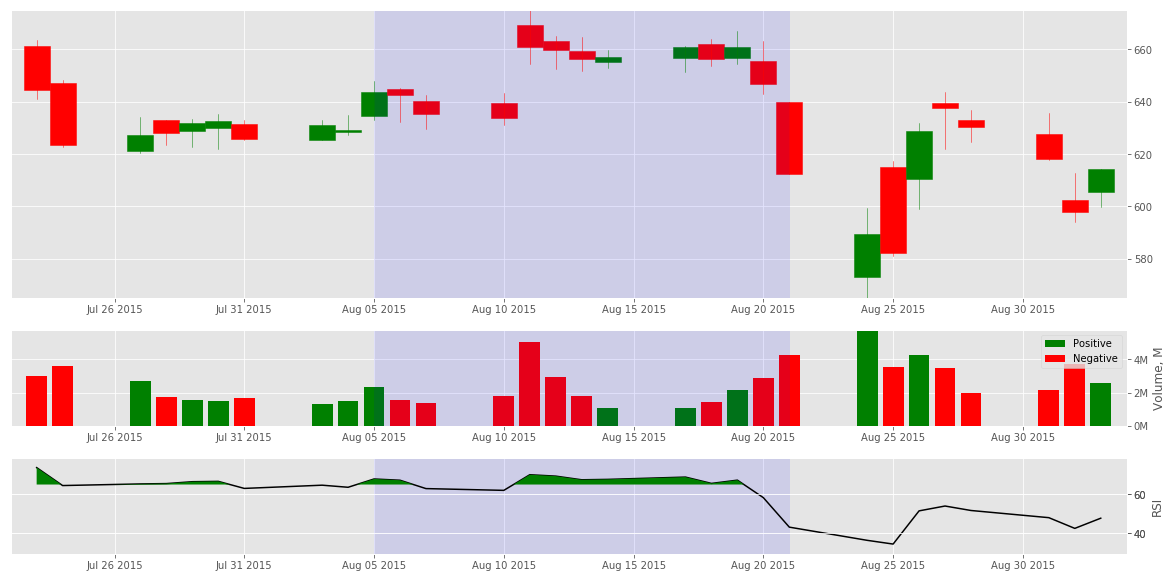

GOOG, Return -2.96%, Entry 662.20, Exit 642.61, Holding period 4 days


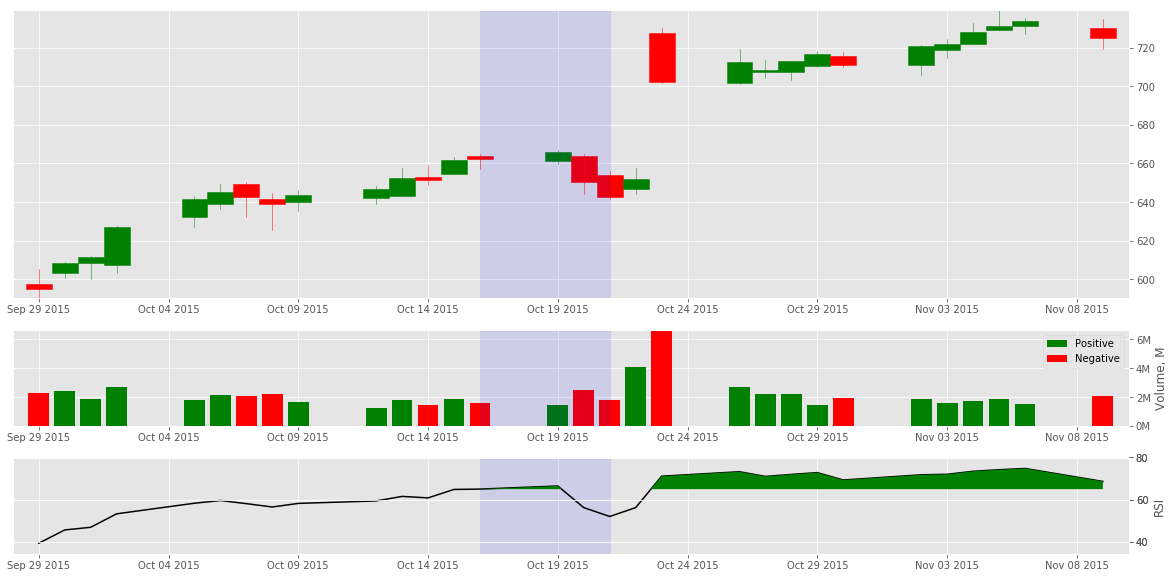

GOOG, Return 3.84%, Entry 702.00, Exit 728.96, Holding period 17 days


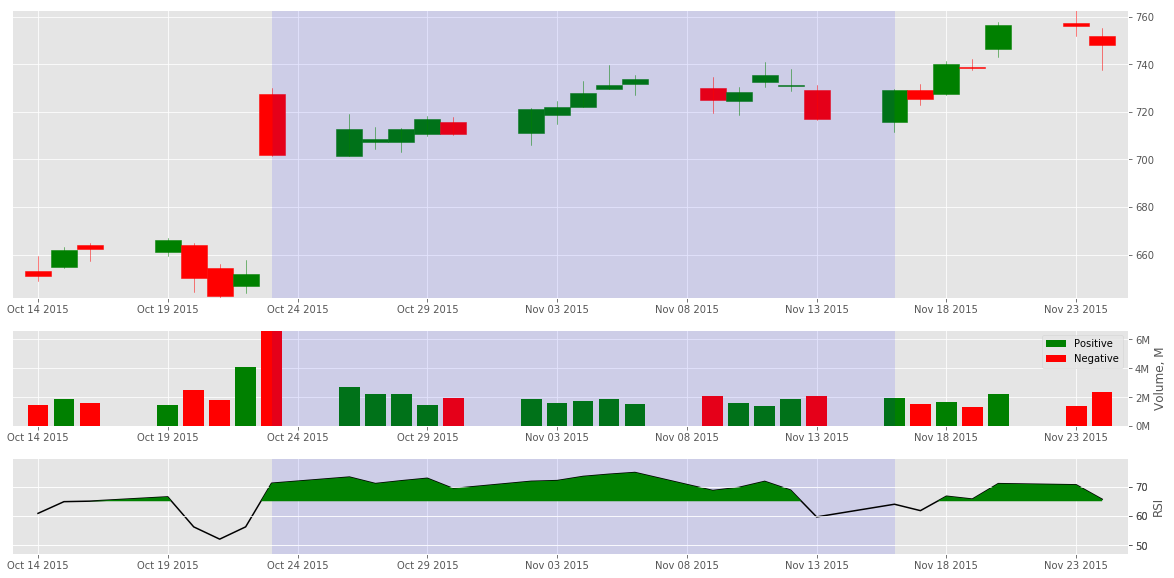

GOOG, Return 1.28%, Entry 740.00, Exit 749.46, Holding period 16 days


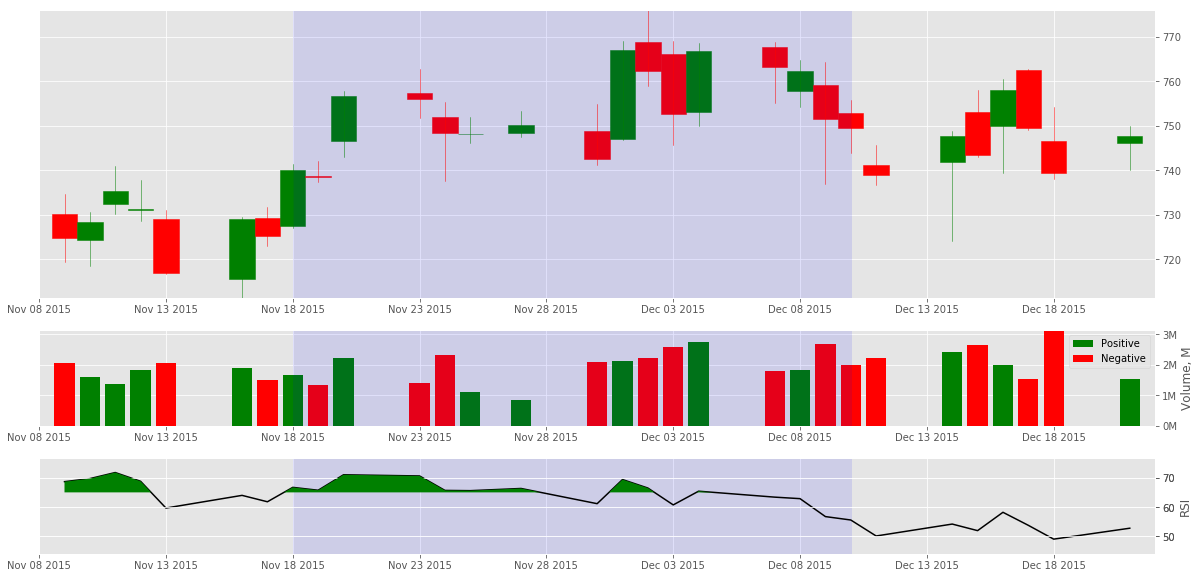

GOOG, Return -0.64%, Entry 750.53, Exit 745.69, Holding period 6 days


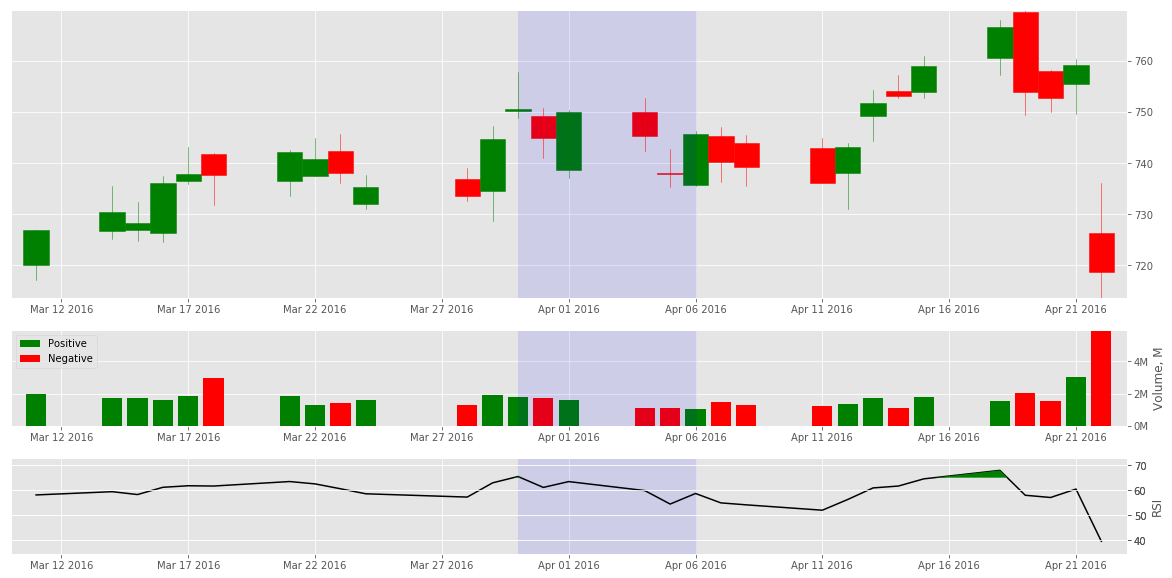

GOOG, Return -5.67%, Entry 766.61, Exit 723.15, Holding period 6 days


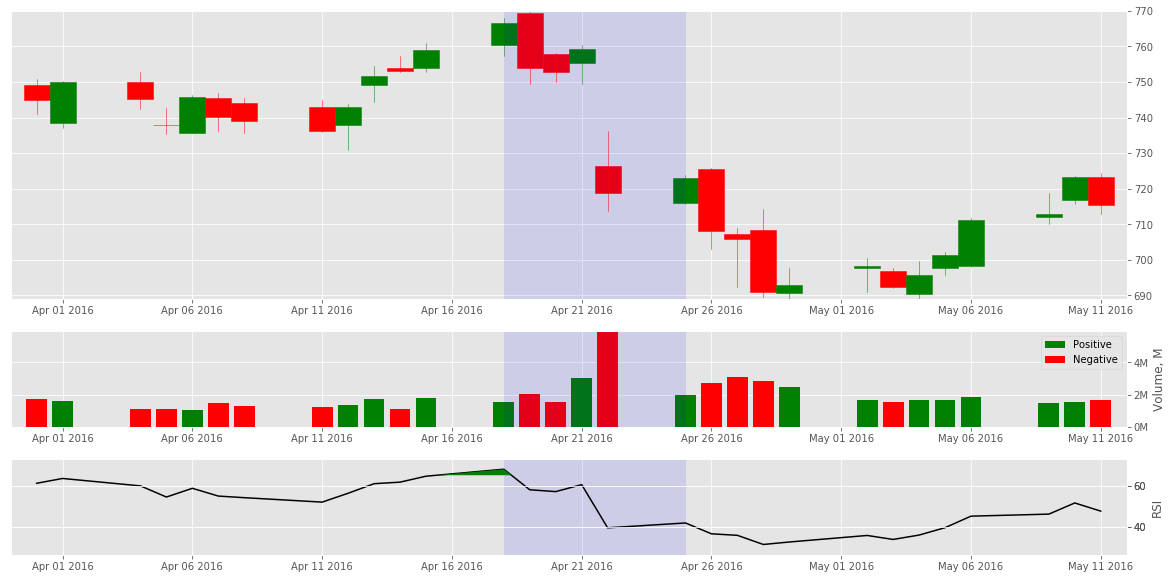

GOOG, Return 4.78%, Entry 736.96, Exit 772.15, Holding period 25 days


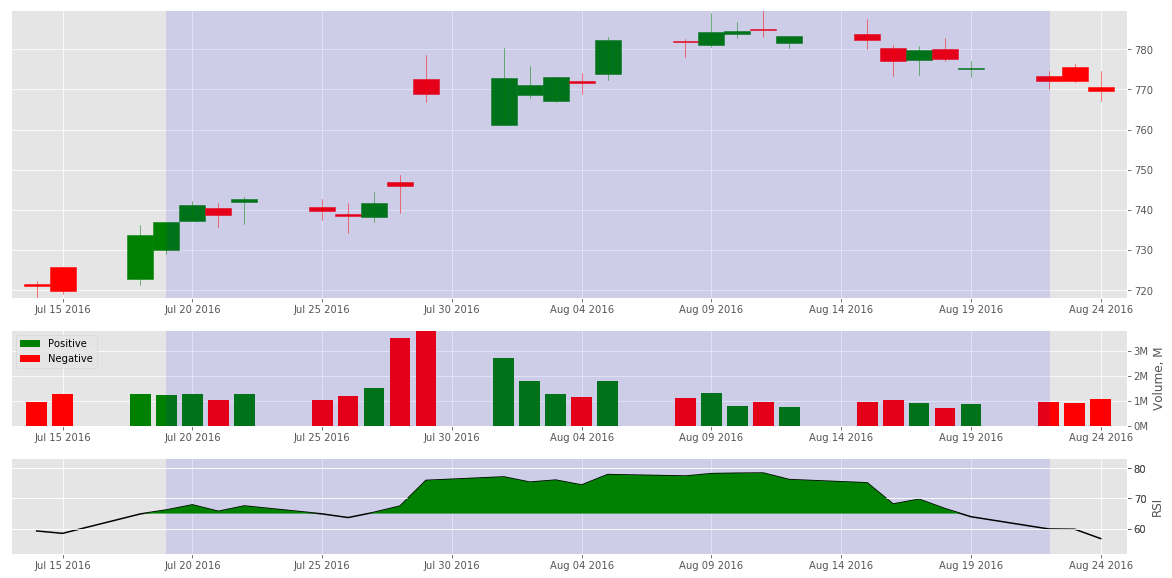

GOOG, Return -1.42%, Entry 780.08, Exit 769.02, Holding period 5 days


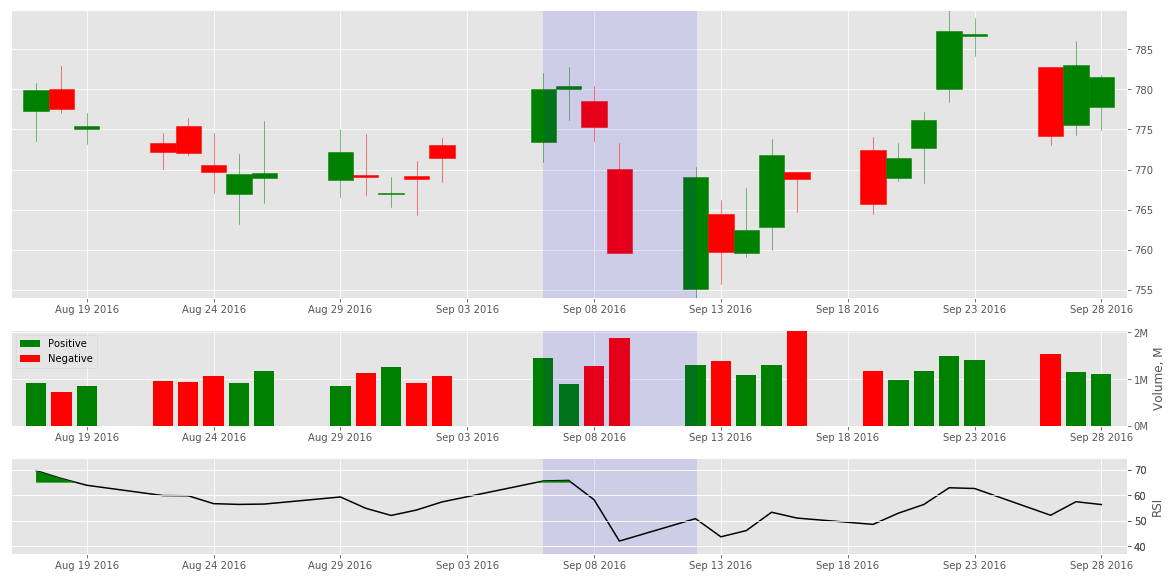

GOOG, Return -2.12%, Entry 801.50, Exit 784.54, Holding period 9 days


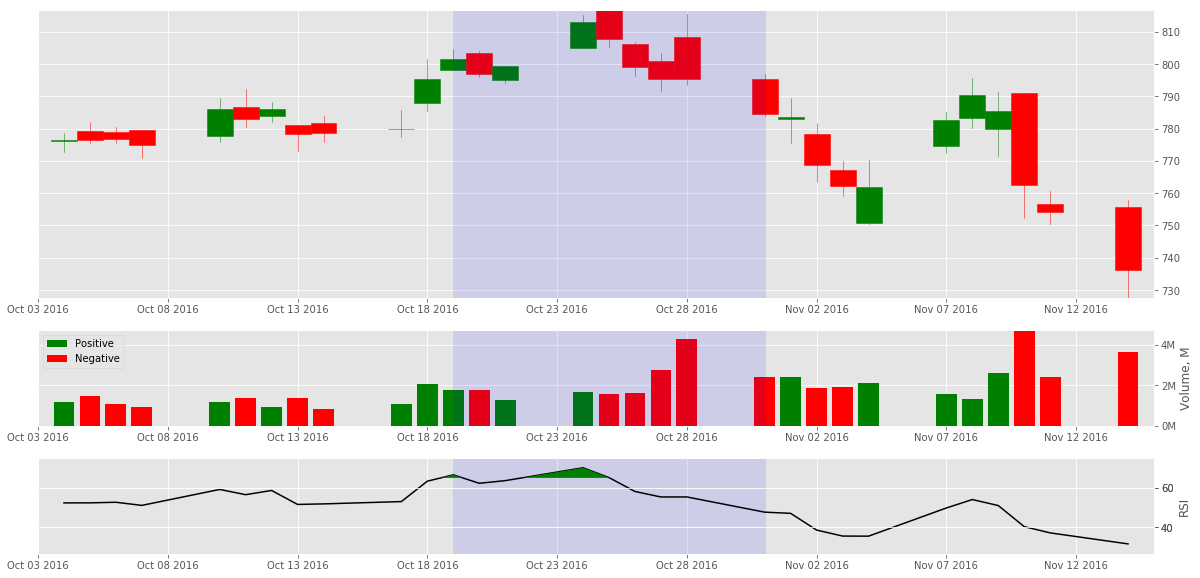

GOOG, Return -2.75%, Entry 819.31, Exit 796.79, Holding period 7 days


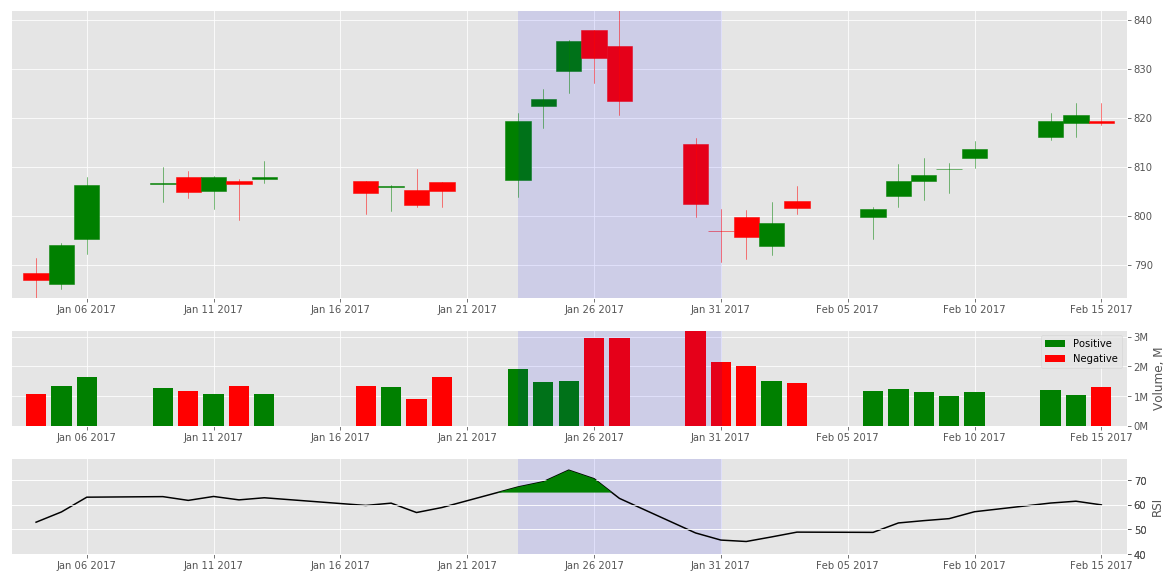

GOOG, Return 0.87%, Entry 828.07, Exit 835.24, Holding period 8 days


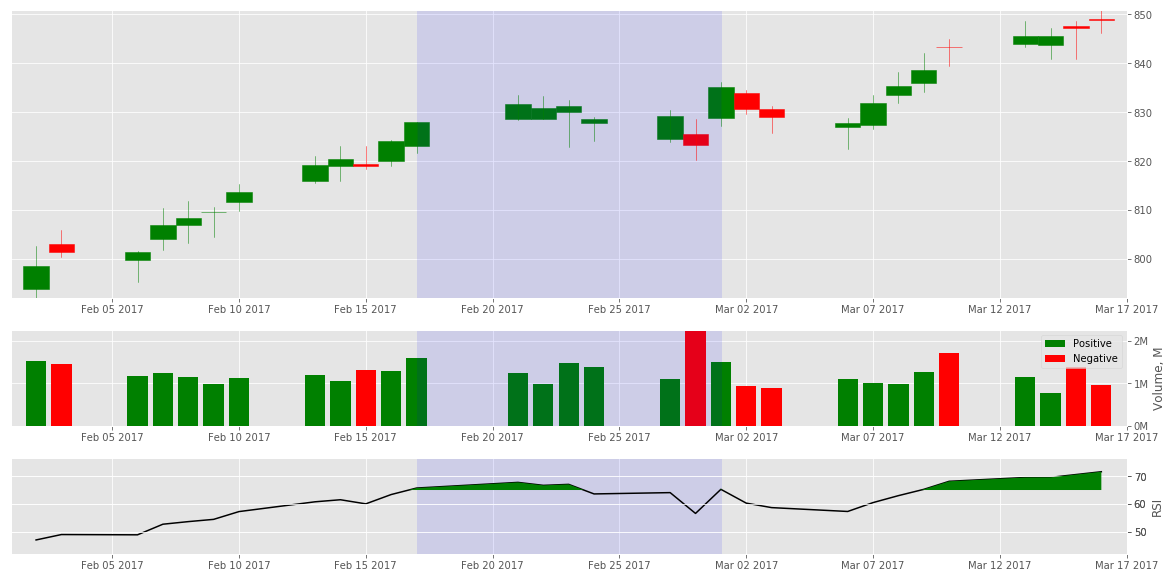

GOOG, Return -1.08%, Entry 838.68, Exit 829.59, Holding period 10 days


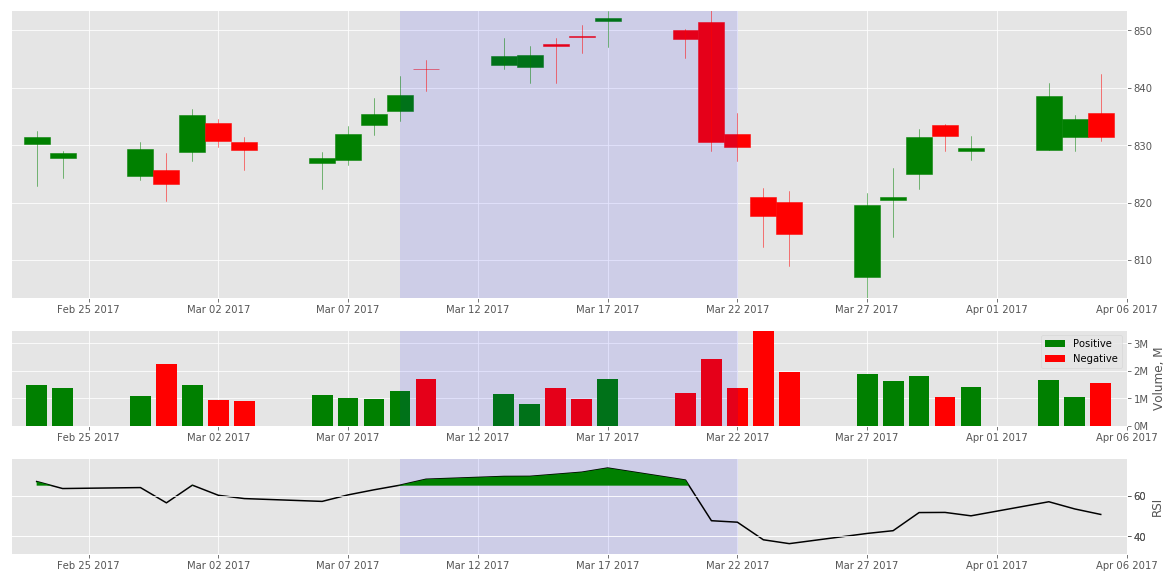

AMD, Return 2.78%, Entry 2.52, Exit 2.59, Holding period 4 days


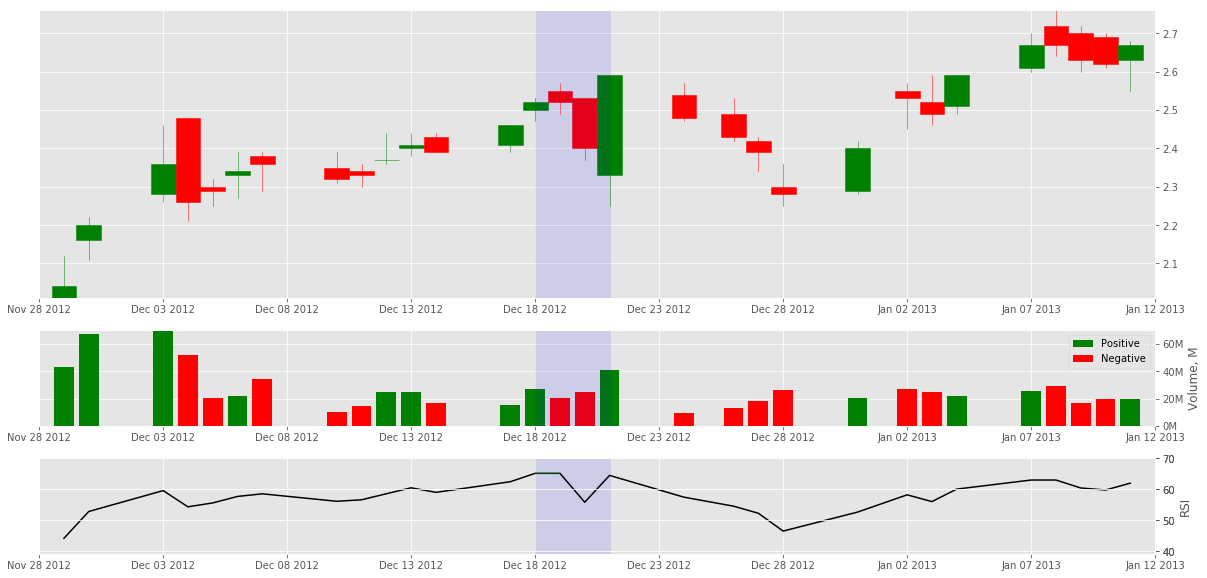

AMD, Return 44.33%, Entry 2.82, Exit 4.07, Holding period 14 days


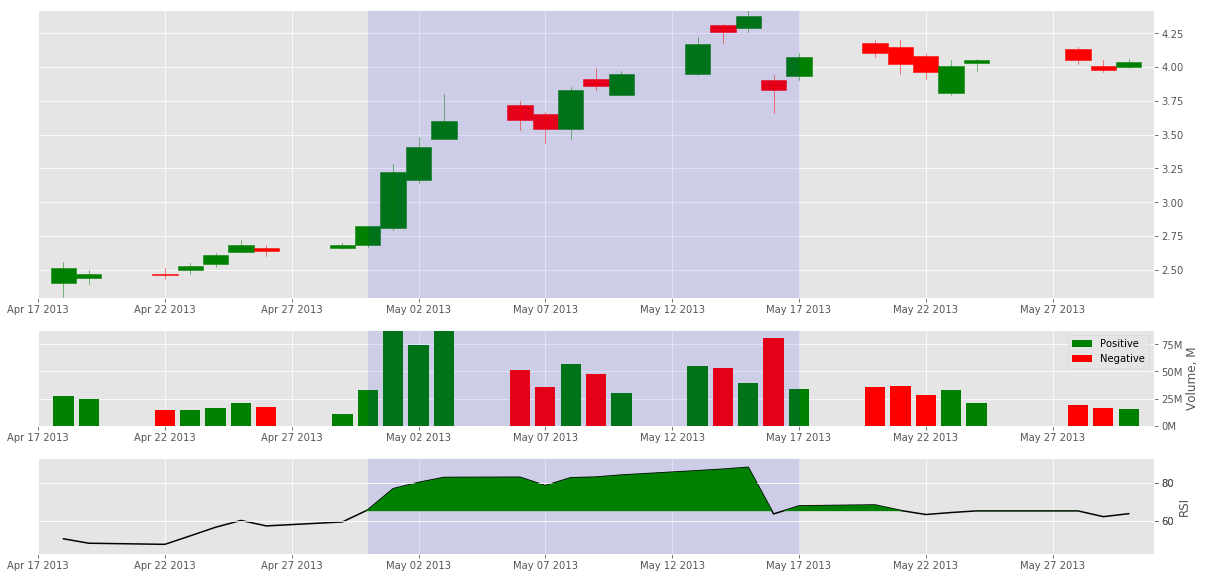

AMD, Return -2.20%, Entry 4.10, Exit 4.01, Holding period 4 days


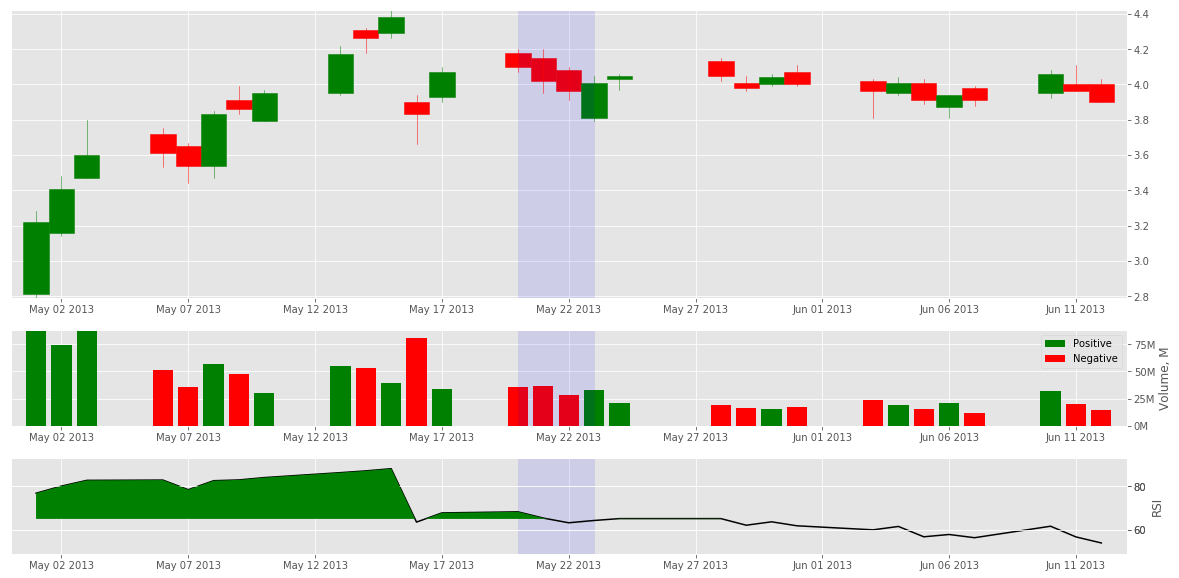

AMD, Return -12.36%, Entry 4.45, Exit 3.90, Holding period 8 days


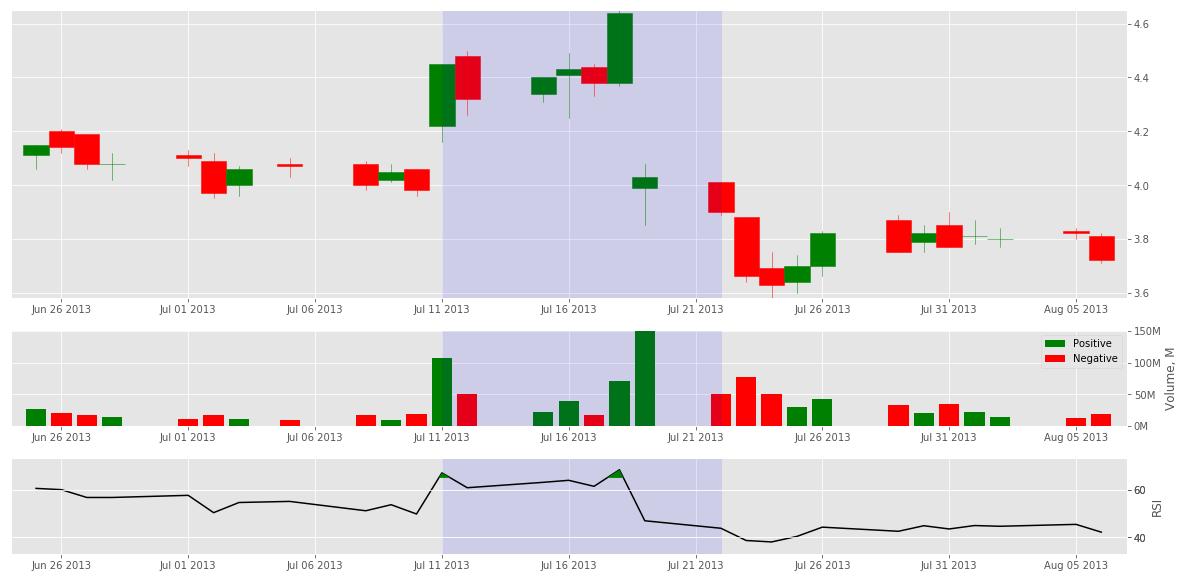

AMD, Return 9.74%, Entry 3.80, Exit 4.17, Holding period 17 days


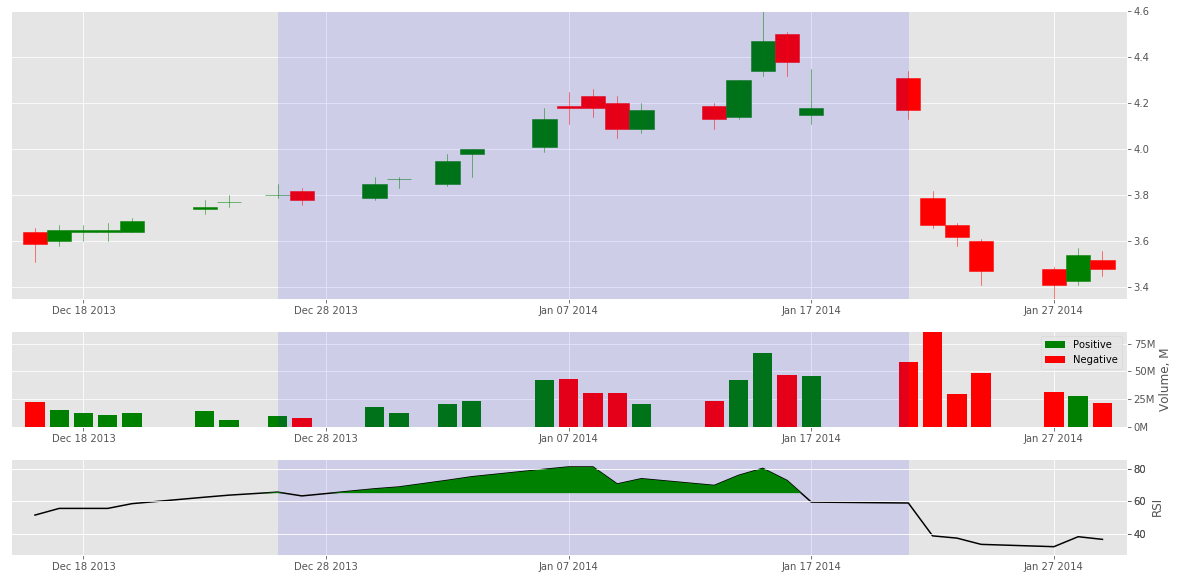

AMD, Return -1.52%, Entry 3.95, Exit 3.89, Holding period 8 days


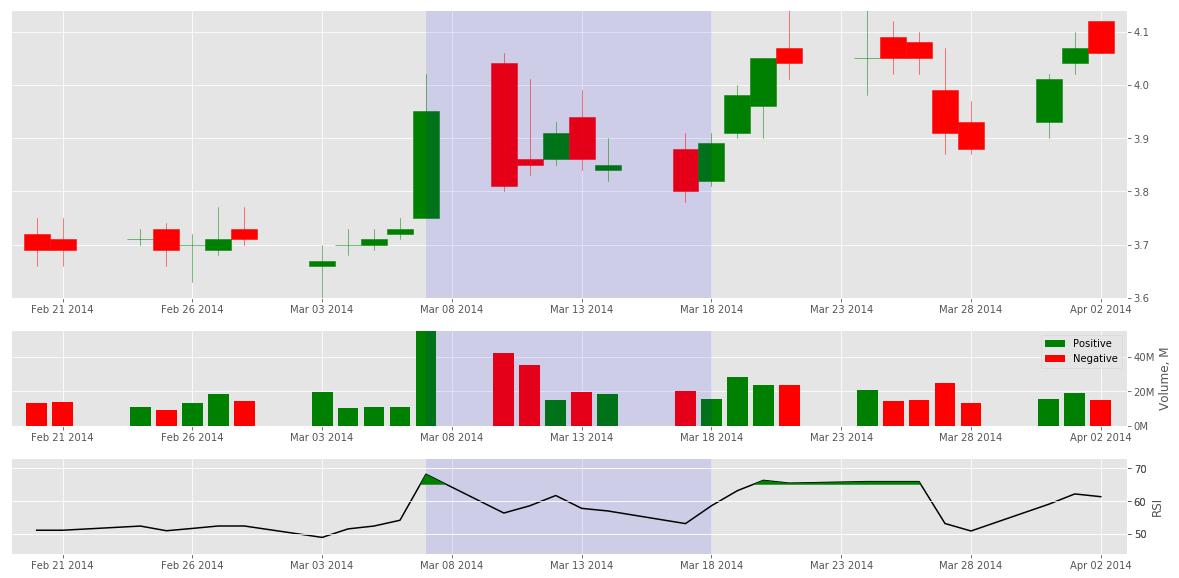

AMD, Return -4.20%, Entry 4.05, Exit 3.88, Holding period 7 days


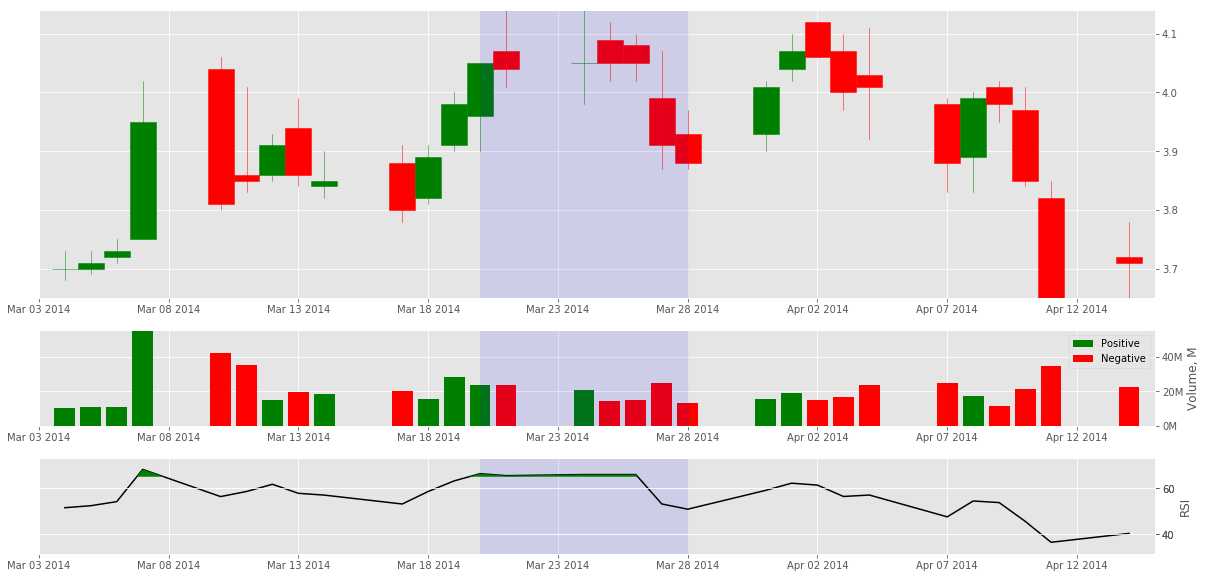

AMD, Return -7.91%, Entry 4.30, Exit 3.96, Holding period 5 days


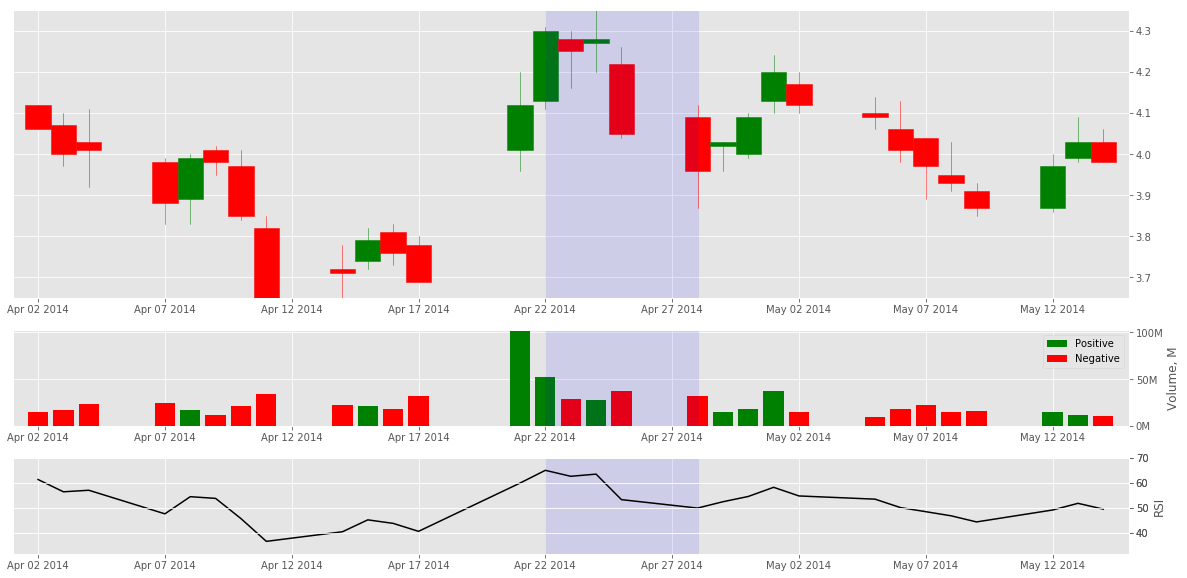

AMD, Return -6.53%, Entry 4.29, Exit 4.01, Holding period 9 days


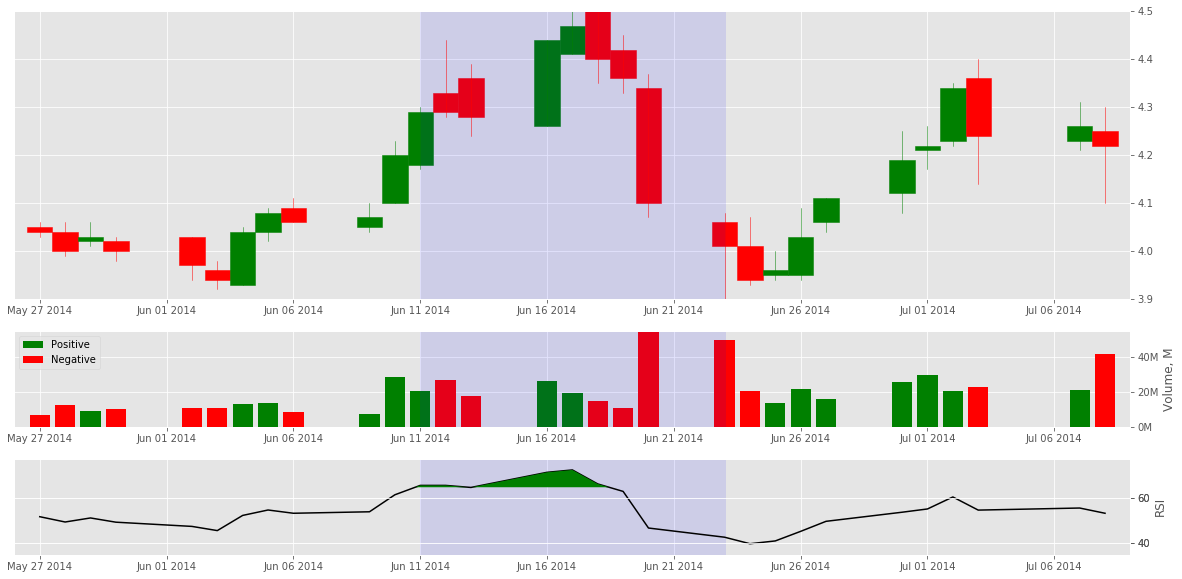

AMD, Return -18.53%, Entry 4.64, Exit 3.78, Holding period 6 days


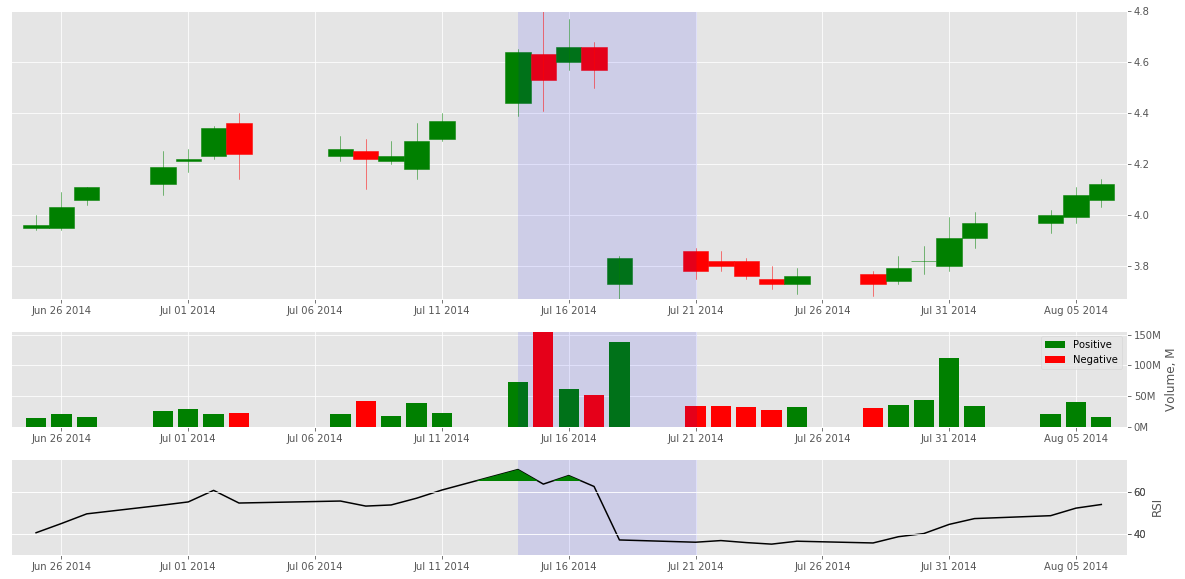

AMD, Return -8.16%, Entry 3.31, Exit 3.04, Holding period 3 days


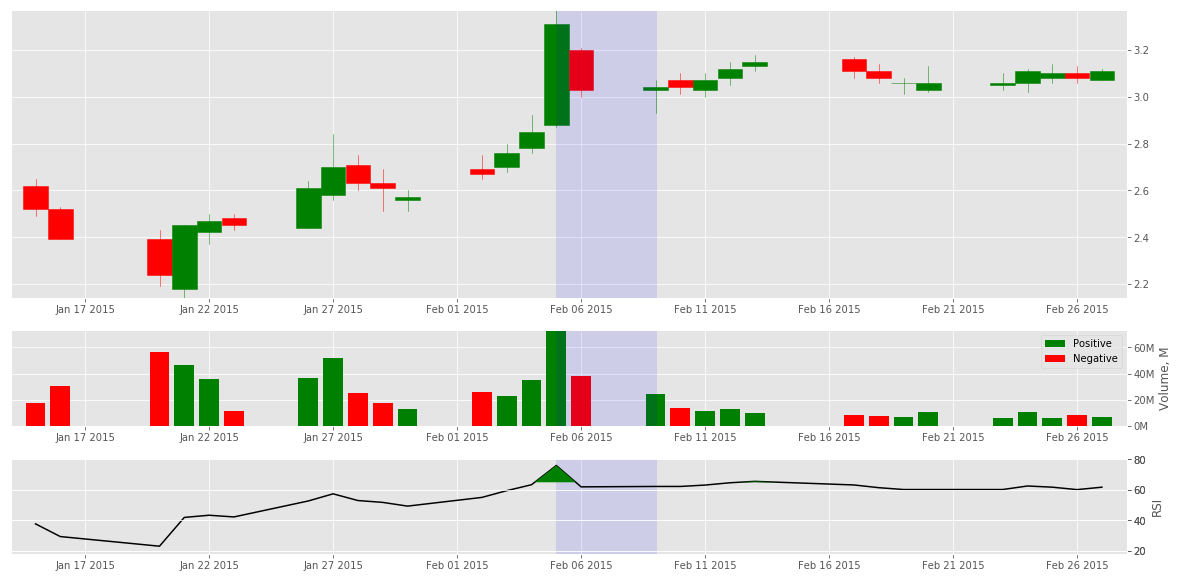

AMD, Return -2.86%, Entry 3.15, Exit 3.06, Holding period 5 days


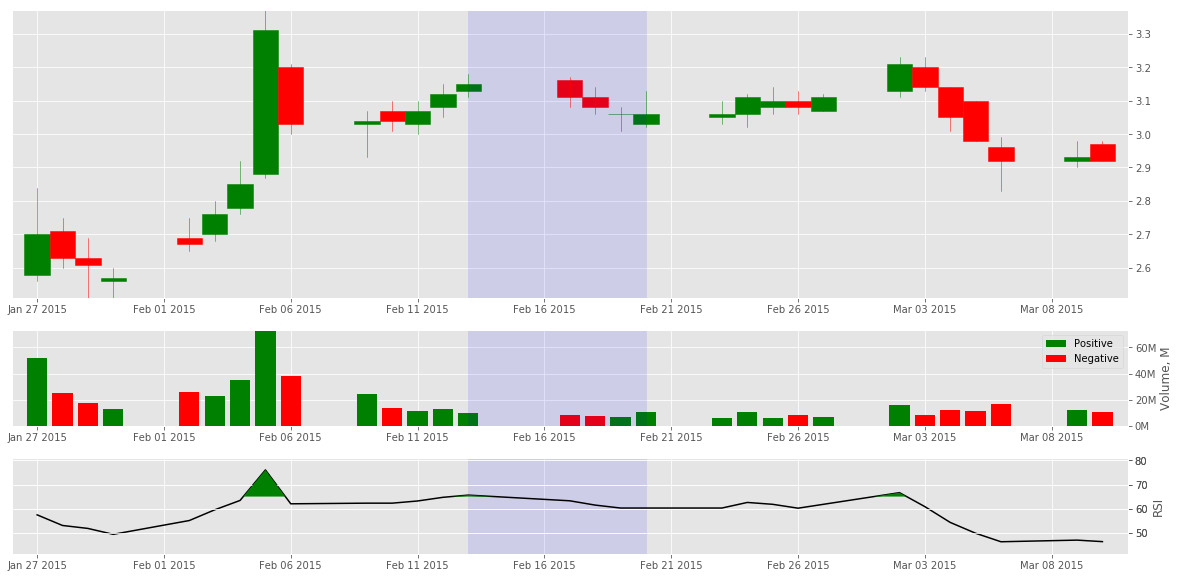

AMD, Return -7.17%, Entry 3.21, Exit 2.98, Holding period 4 days


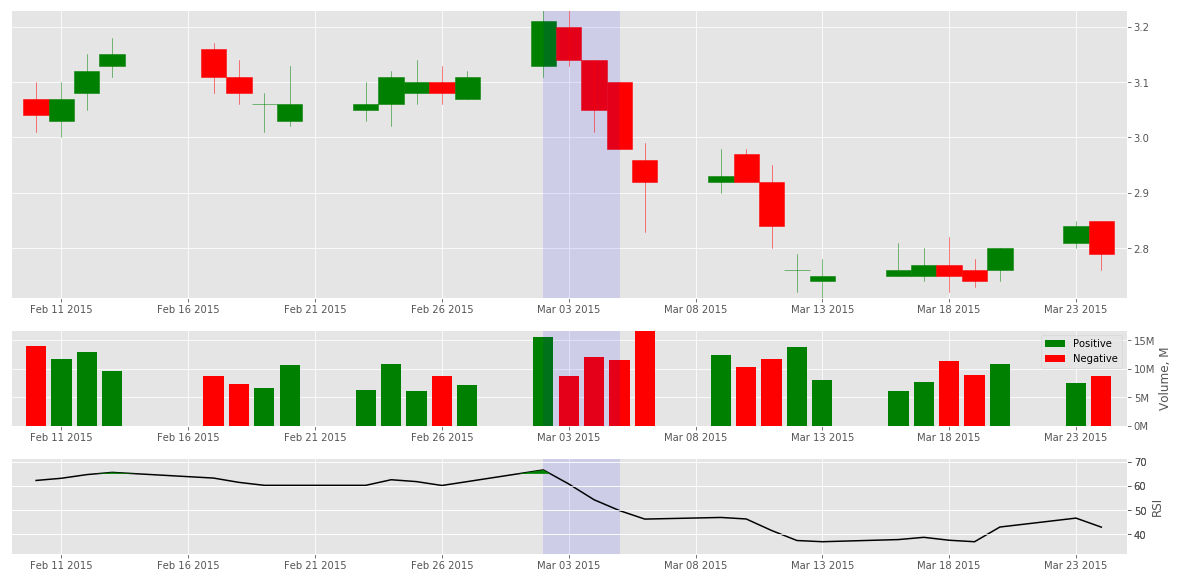

AMD, Return -7.14%, Entry 2.52, Exit 2.34, Holding period 8 days


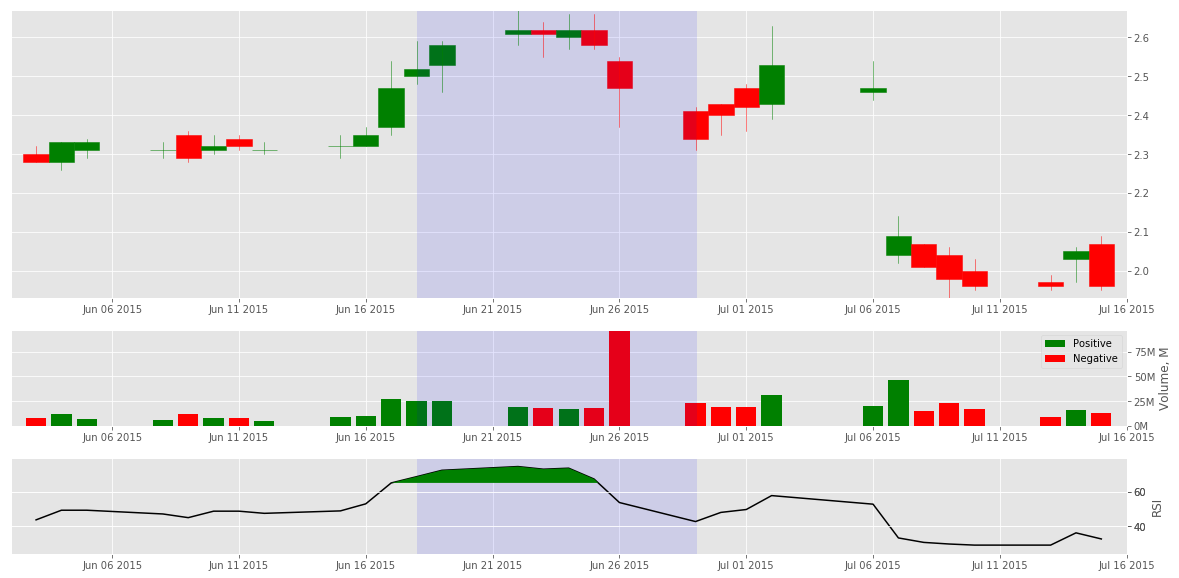

AMD, Return 0.48%, Entry 2.10, Exit 2.11, Holding period 14 days


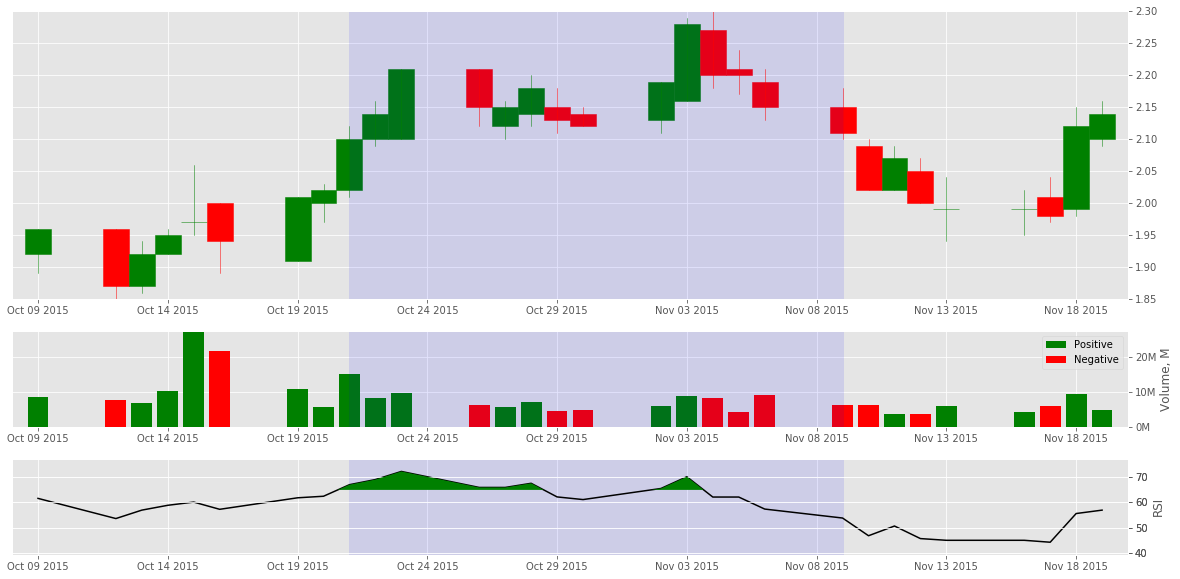

AMD, Return -2.56%, Entry 2.34, Exit 2.28, Holding period 8 days


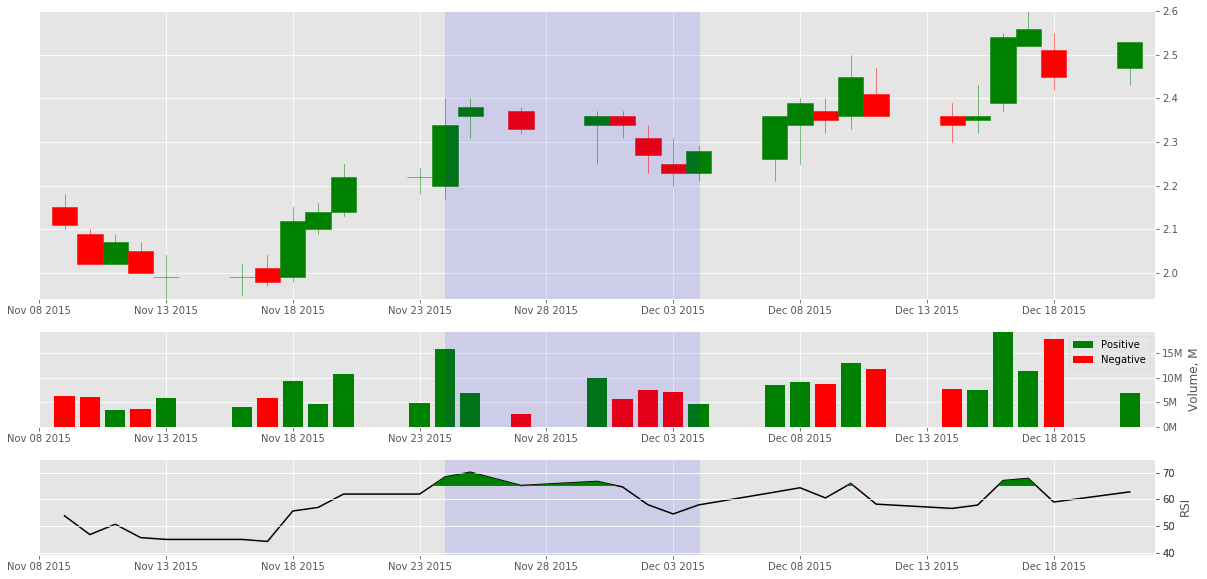

AMD, Return 12.24%, Entry 2.45, Exit 2.75, Holding period 17 days


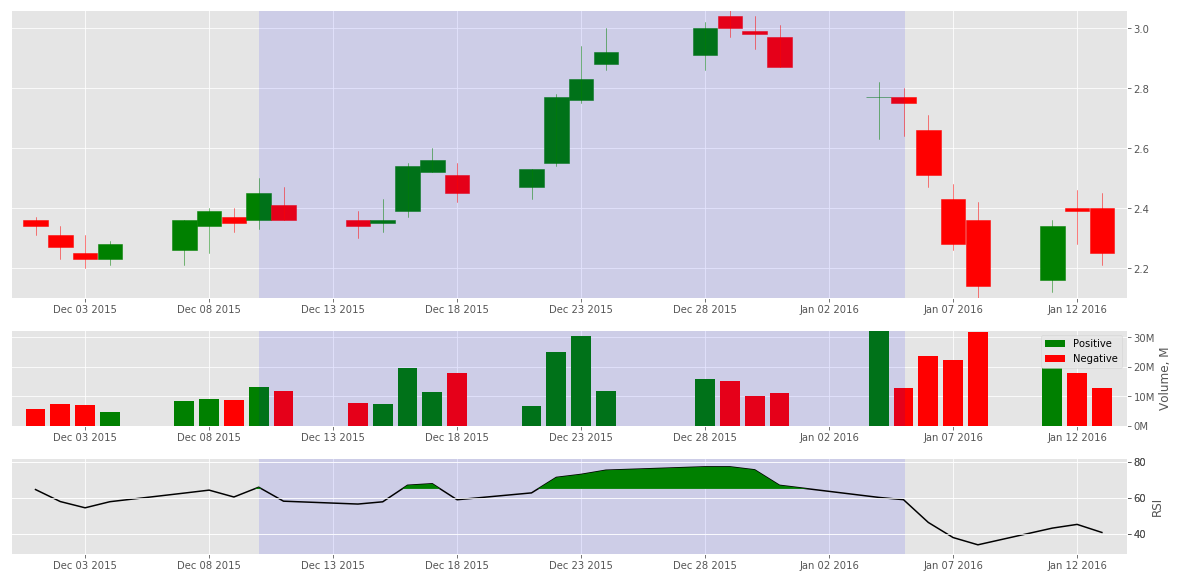

AMD, Return 20.69%, Entry 2.32, Exit 2.80, Holding period 25 days


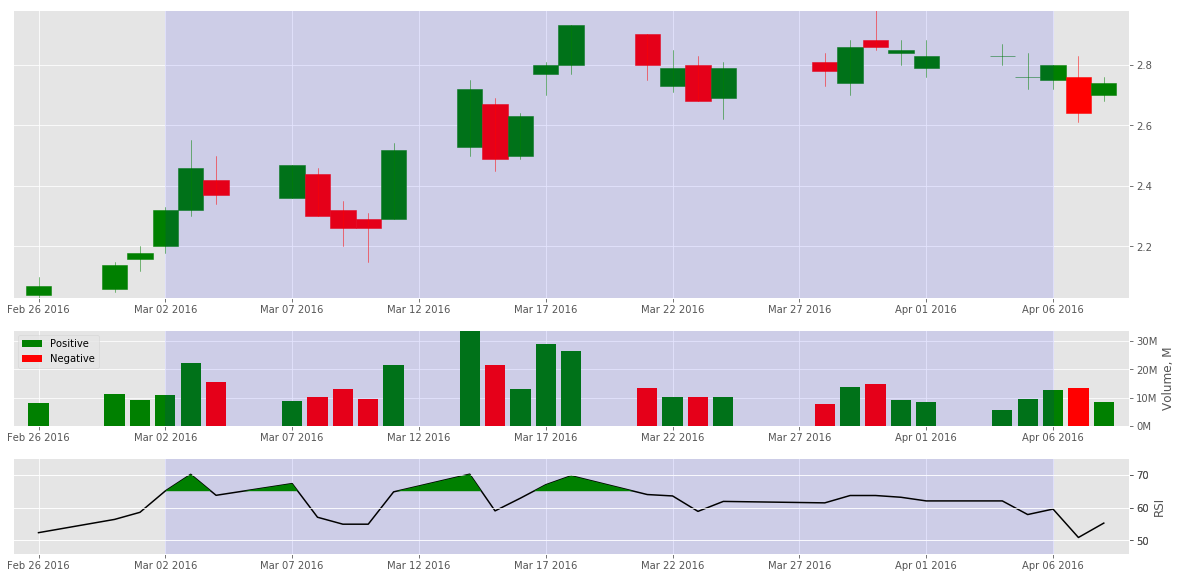

AMD, Return -8.27%, Entry 3.99, Exit 3.66, Holding period 3 days


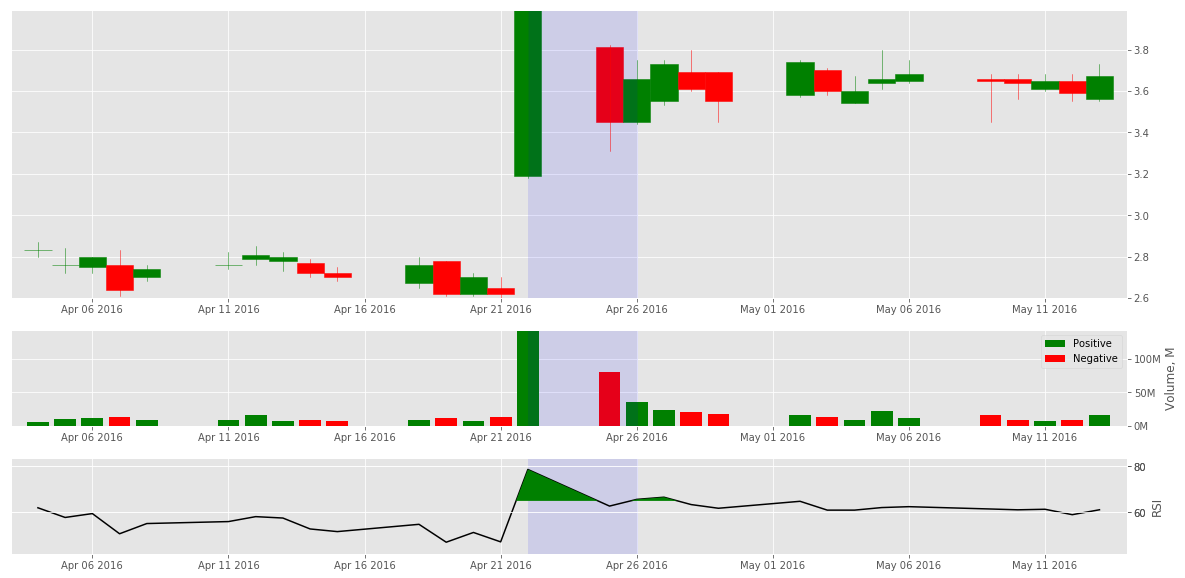

AMD, Return -2.14%, Entry 3.73, Exit 3.65, Holding period 11 days


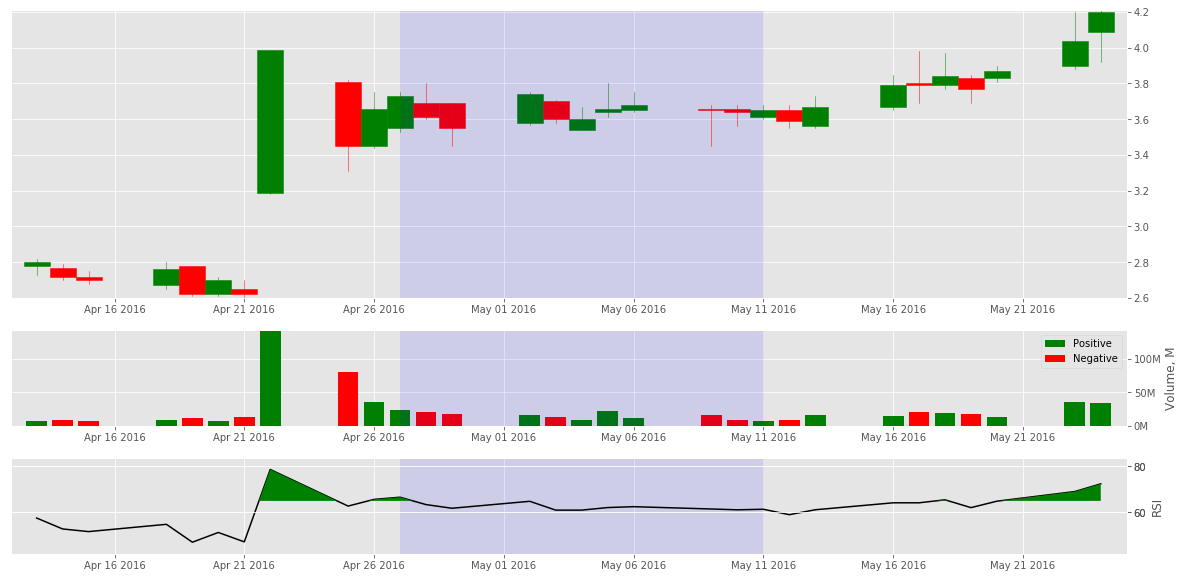

AMD, Return 16.41%, Entry 3.84, Exit 4.47, Holding period 13 days


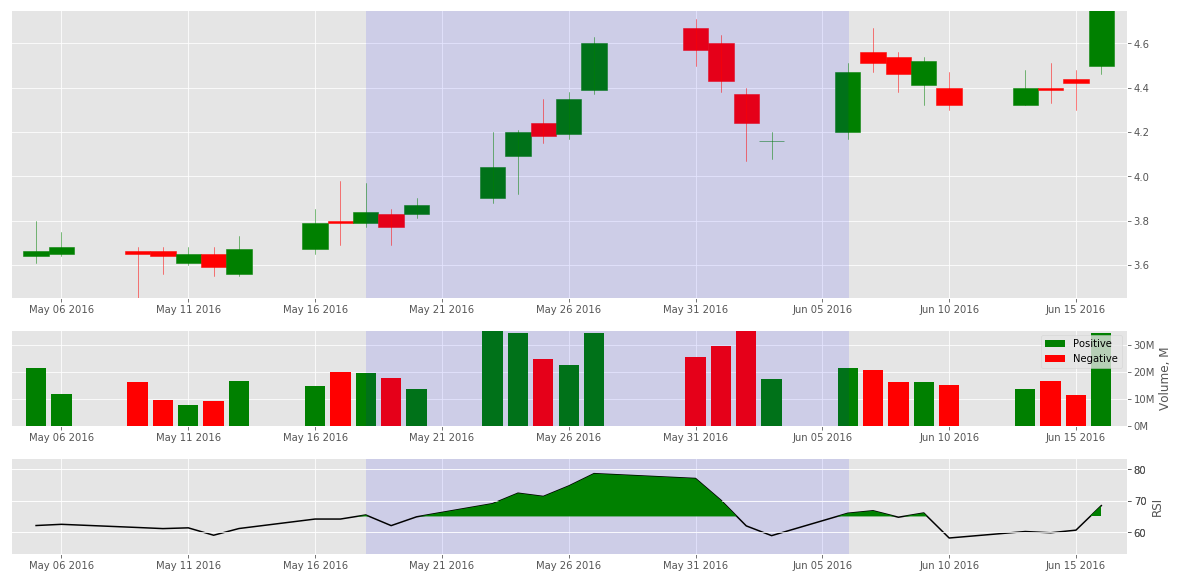

AMD, Return -2.44%, Entry 4.51, Exit 4.40, Holding period 5 days


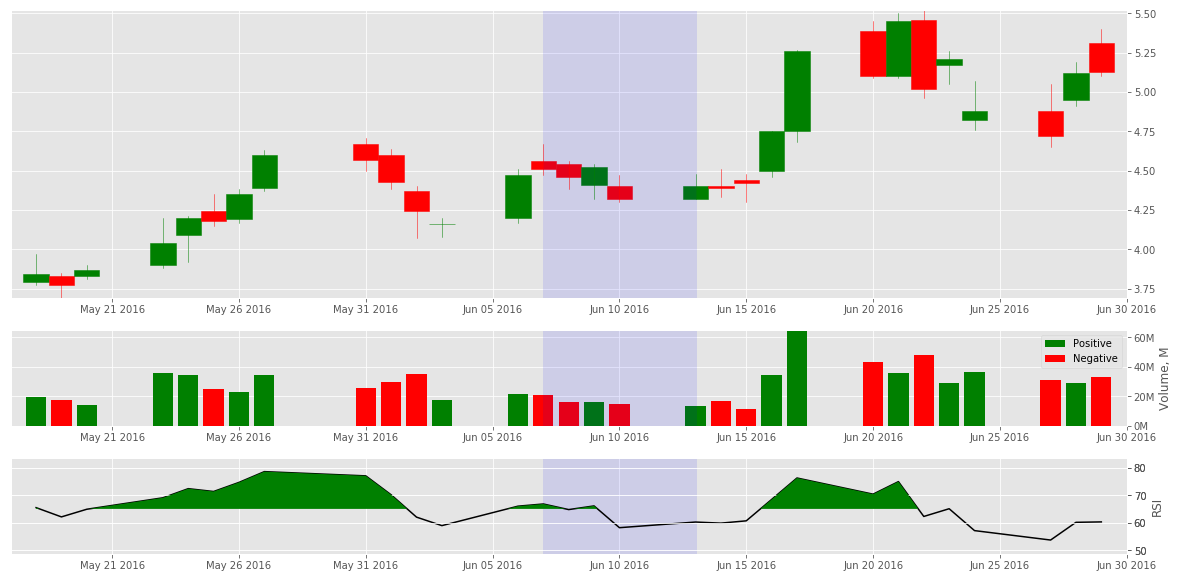

AMD, Return 7.79%, Entry 4.75, Exit 5.12, Holding period 9 days


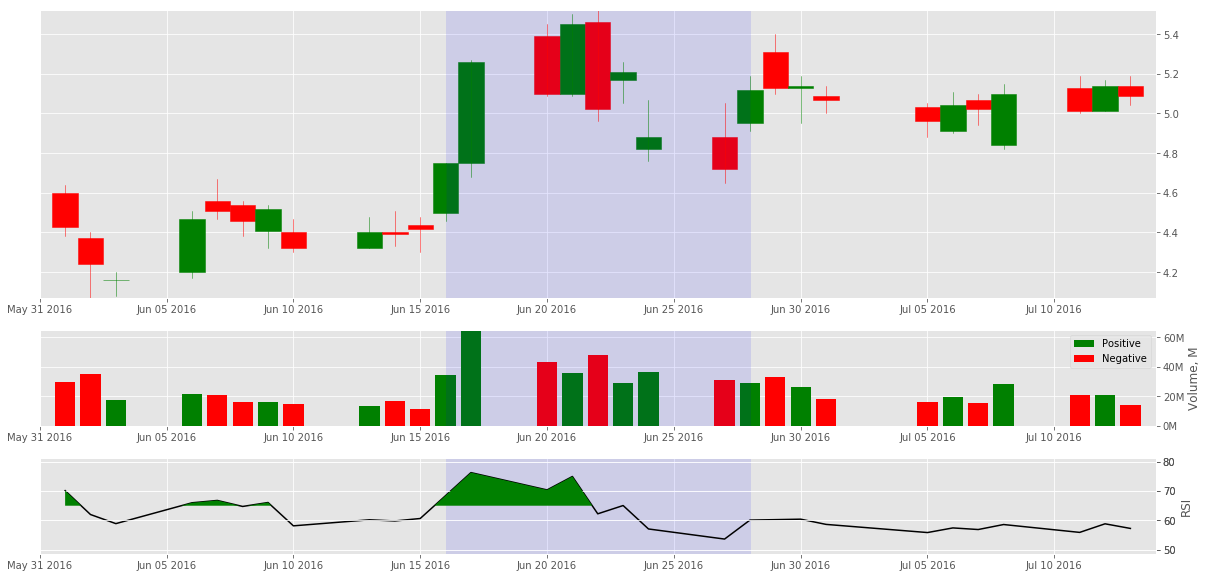

AMD, Return 5.99%, Entry 5.51, Exit 5.84, Holding period 5 days


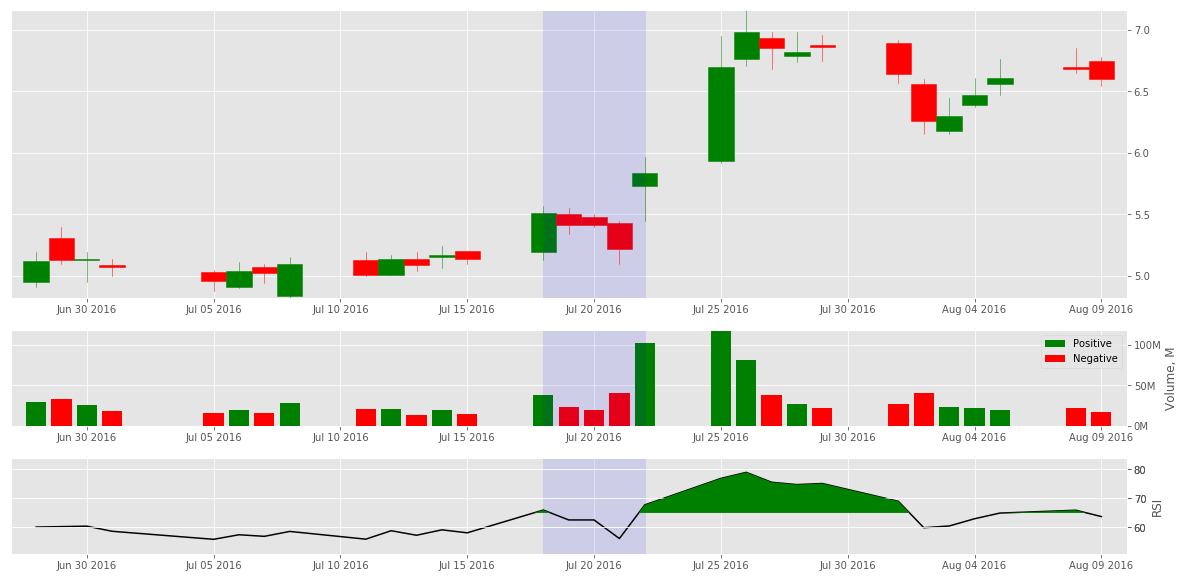

AMD, Return -5.97%, Entry 6.70, Exit 6.30, Holding period 8 days


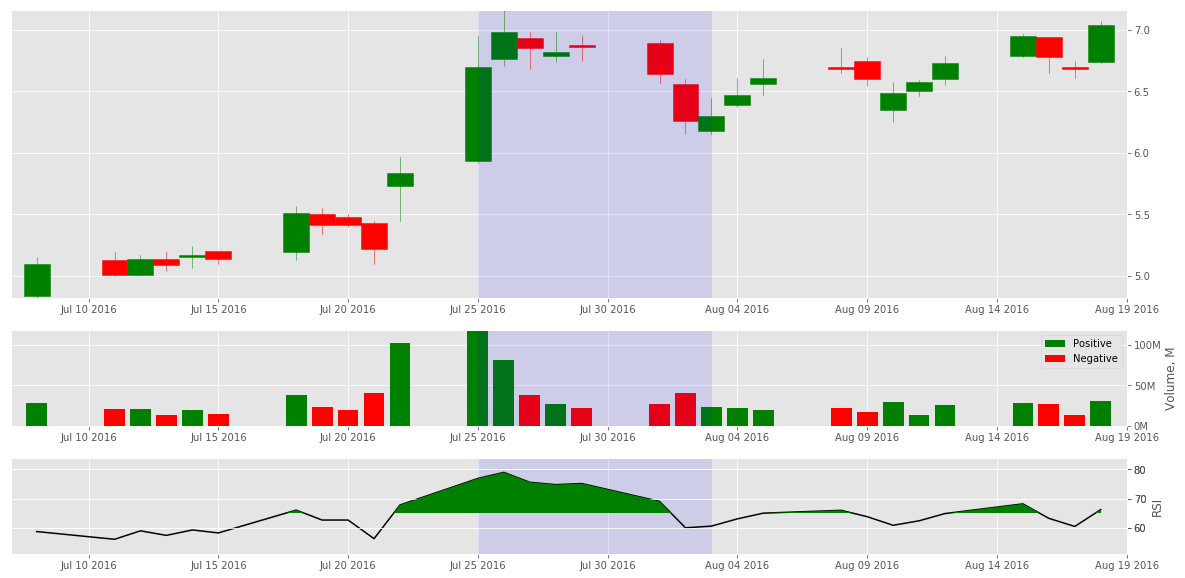

AMD, Return -2.84%, Entry 6.68, Exit 6.49, Holding period 3 days


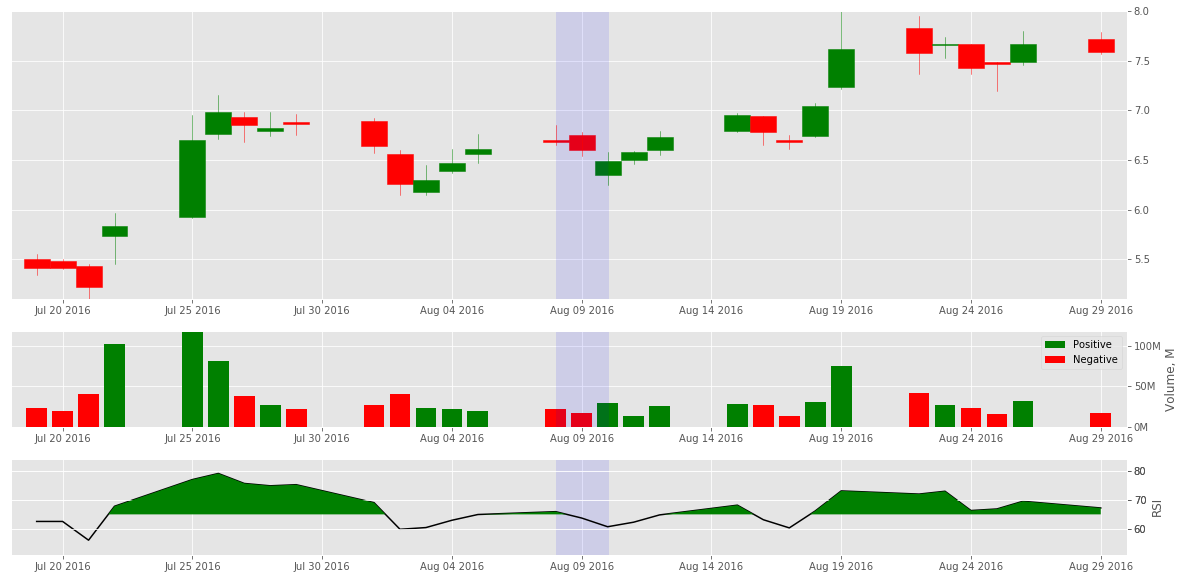

AMD, Return 5.76%, Entry 6.95, Exit 7.35, Holding period 14 days


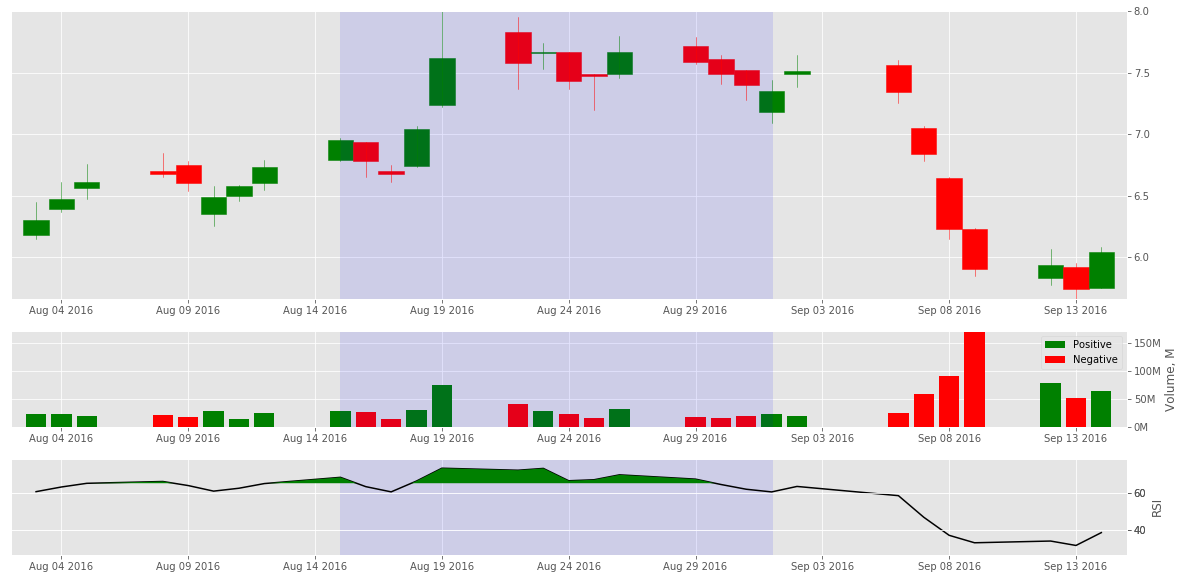

AMD, Return 0.83%, Entry 8.46, Exit 8.53, Holding period 11 days


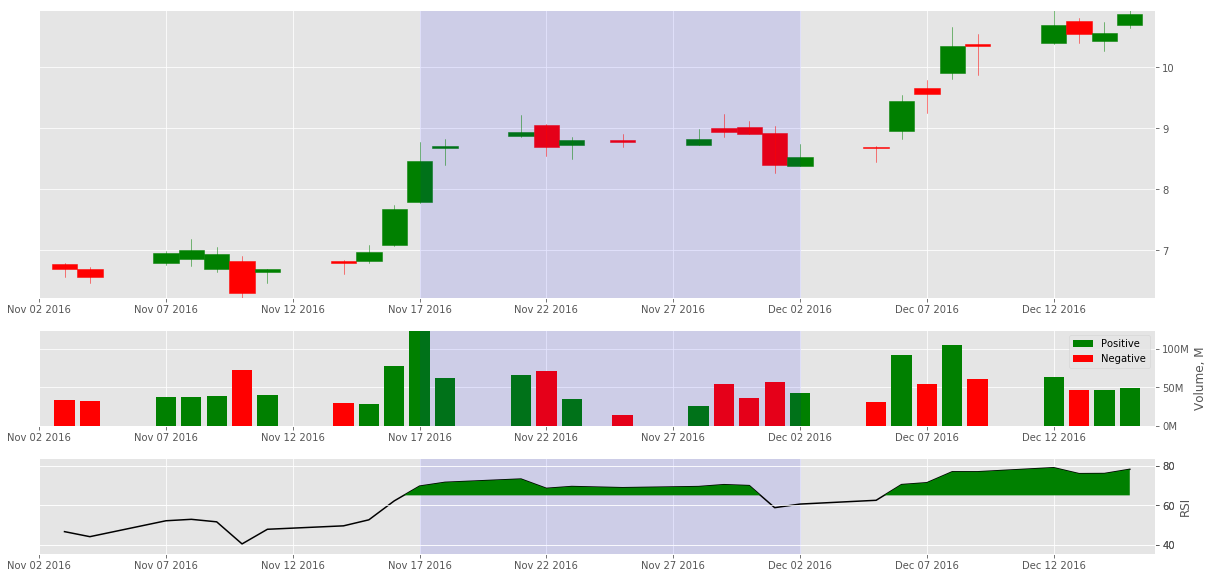

AMD, Return 19.79%, Entry 9.45, Exit 11.32, Holding period 22 days


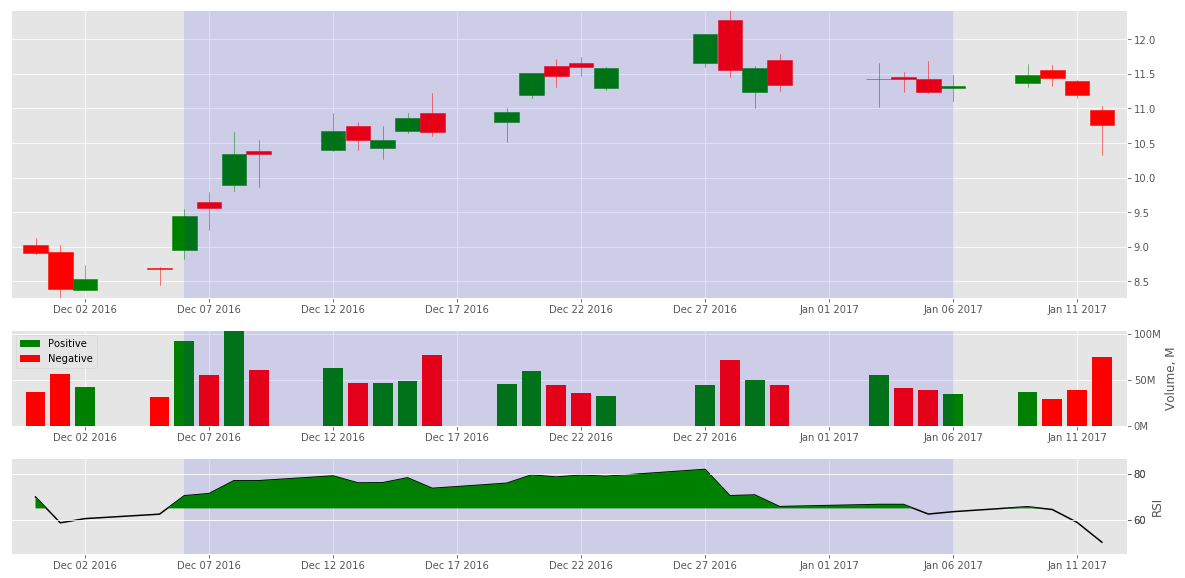

AMD, Return 8.87%, Entry 12.06, Exit 13.13, Holding period 13 days


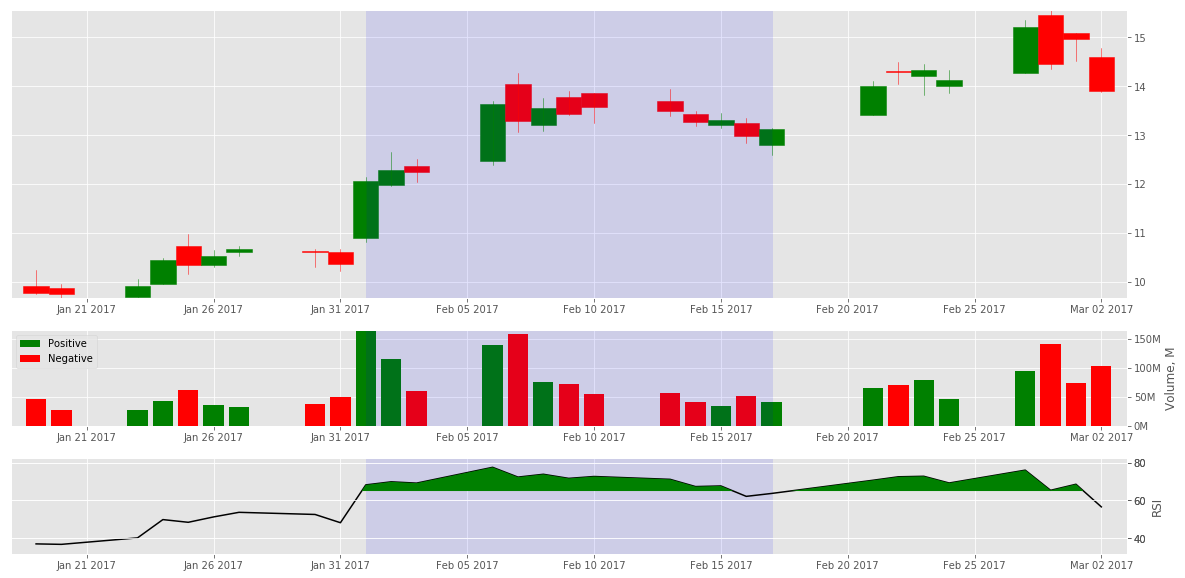

AMD, Return -6.93%, Entry 14.00, Exit 13.03, Holding period 9 days


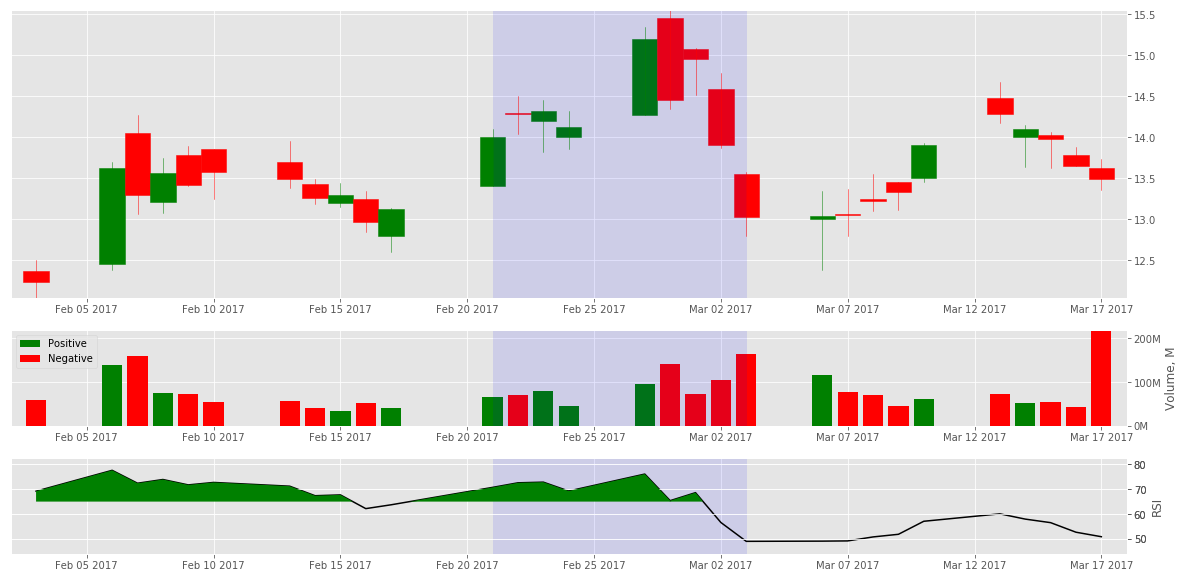

In [7]:
def plot_trade(df, trade):
    fig = plt.figure(figsize=(20, 10)) 
    gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1]) 
    x_min, x_max = date2num(df.Date.min() - timedelta(days=1)), date2num(df.Date.max() + timedelta(days=1))
    weekFormatter = DateFormatter('%b %d %Y')

    # Plot the candlestick    
    ax1 = plt.subplot(gs[0])
    candlestick_ochl(
        ax1, 
        ((date2num(r.Date), r.Open, r.Close, r.High, r.Low) for r in df.itertuples()), 
        width=1,  
        colorup='g',  
        colordown='r',
    )
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(df.Low.min(), df.High.max())
    ax1.xaxis.set_major_formatter(weekFormatter)
    ax1.yaxis.set_label_position("right")
    ax1.yaxis.tick_right()
    
    # Volume
    ax2 = plt.subplot(gs[1])    
    
    pos_volumes = df[df.Close >= df.Open]
    neg_volumes = df[df.Close < df.Open]
    pos_dates = [date2num(date) for date in pos_volumes.Date]
    neg_dates = [date2num(date) for date in neg_volumes.Date]
    ax2.bar(pos_dates, pos_volumes['Volume'].tolist(), color='green', align='center', label="Positive")
    ax2.bar(neg_dates, neg_volumes['Volume'].tolist(), color='red', align='center', label="Negative")
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(0, df.Volume.max())
    ax2.legend(fancybox=True, loc='best')
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dM" % (x / 1000000)))
    ax2.set_ylabel('Volume, M')
    ax2.xaxis.set_major_formatter(weekFormatter)

    # RSI
    rsi_df = df[df.RSI.notnull()]
    rsi_values = rsi_df['RSI'].values
    rsi_indexes = [date2num(date) for date in rsi_df.Date]
    ax3 = plt.subplot(gs[2])
    ax3.plot(rsi_indexes, rsi_values, 'k')    

    ax4 = ax3.twinx()
    over_65_line = np.array([65] * len(rsi_values))
    ax4.fill_between(rsi_indexes, 65, rsi_values, where=rsi_values >= over_65_line, 
                     facecolor='green', interpolate=True)    
    ax3.set_xlim(x_min, x_max)
    rsi_df = df[df.RSI.notnull()]
    y_min, y_max = rsi_df.RSI.min() - 5, rsi_df.RSI.max() + 5
    ax3.set_ylim(y_min, y_max)
    ax4.set_ylim(y_min, y_max) 
    ax3.set_ylabel('RSI')
    ax3.yaxis.set_label_position("right")
    ax3.yaxis.tick_right()
    ax3.xaxis.set_major_formatter(weekFormatter)
    
    # highlight trade
    start, end = date2num(trade.Date.min()), date2num(trade.Date.max())
    for ax in (ax1, ax2, ax3):
        ax.axvspan(start, end, color='blue', alpha=0.1) 
            
    plt.show()
    
iterator = iterate_trades(data)
for n, (trade, chart_data) in enumerate(iterator):
    print(title_info(trade))
    plot_trade(chart_data, trade)

In [8]:
def run_optimiztion(in_df):
    moving_average_options = (10 + d * s for s in (1, -1) for d in range(1, 6))
    rsi_options = (65 + d * s for s in (1, -1) for d in range(1, 11))
    results = []
    for mva_days in moving_average_options:
        for rsi_lvl in rsi_options:    
            op_data = define_trades(in_df, mva_days, rsi_lvl)
            report = get_summary_report(op_data)
            report[' Optimization parameters'] = "moving average- {}days; RSI- {}".format(mva_days, rsi_lvl)
            results.append(report)
    return results
            
reports = run_optimiztion(initial_data)
win_rate_result = sorted(reports, key=lambda i: i['4. Win rate'])[-1]
print_summary_report(win_rate_result)

 Optimization parameters: moving average- 11days; RSI- 67
1. Number of trades: 63
2. Number of winners: 34
3. Number of losers: 29
4. Win rate: 53.96825396825397
5. Average return of the strategy: -0.3931048557251822
6. Average holding period: 835
7. Average winning return: 5.721508835233894
8. Average loosing return: -7.561962286504788


In [9]:
return_result = sorted(reports, key=lambda i: i['5. Average return of the strategy'])[-1]
print_summary_report(return_result)

 Optimization parameters: moving average- 11days; RSI- 59
1. Number of trades: 114
2. Number of winners: 45
3. Number of losers: 68
4. Win rate: 39.473684210526315
5. Average return of the strategy: 0.1850726151041194
6. Average holding period: 1560
7. Average winning return: 8.151277780131577
8. Average loosing return: -5.083959146824286
